Plots included if you want to directly include the same very plots: 

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("dark")
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv


### Reading data from the CSV file

In [2]:
#Data from https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

Either Download and uplaod the data or use Kaggle API with opendatasets

In [3]:
emission_table = pd.read_csv("/kaggle/input/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv")

In [4]:
emission_table.head()

country_or_area  year          value  \
0       Australia  2014  393126.946994   
1       Australia  2013  396913.936530   
2       Australia  2012  406462.847704   
3       Australia  2011  403705.528314   
4       Australia  2010  406200.993184   

                                            category  
0  carbon_dioxide_co2_emissions_without_land_use_...  
1  carbon_dioxide_co2_emissions_without_land_use_...  
2  carbon_dioxide_co2_emissions_without_land_use_...  
3  carbon_dioxide_co2_emissions_without_land_use_...  
4  carbon_dioxide_co2_emissions_without_land_use_...

As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [5]:
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
by_category  = emission_table.groupby(['category'])

In [7]:
category_count = by_category.count()

In [8]:
category_count

country_or_area  \
category                                                                                                                          
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074              
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949               
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074              
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975               
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074              
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248               
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074              
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                     831               
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                  1032              
unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent      75                

                                                                                                                year  \
category                                                                                                               
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074   
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949    
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074   
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975    
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074   
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248    
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074   
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                     831    
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                  1032   
unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent      75     

                                                                                                                value  
category                                                                                                               
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074   
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949    
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074   
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975    
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074   
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248    
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074   
perfluorocarbons_p

As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [9]:
strp = category_count.index

In [10]:
io = strp[0]
io[108]

't'

In [11]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [12]:
hdd = len(io)
hdd

109

In [13]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [14]:

io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [15]:

new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [16]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [17]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [18]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [19]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [20]:
category_count["Shorted_category"] = short_category

In [21]:
category_count

country_or_area  \
category                                                                                                                          
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074              
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949               
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074              
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975               
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074              
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248               
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074              
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                     831               
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                  1032              
unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent      75                

                                                                                                                year  \
category                                                                                                               
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074   
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949    
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074   
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975    
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074   
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248    
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074   
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                     831    
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                  1032   
unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent      75     

                                                                                                                value  \
category                                                                                                                
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent   1074    
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                 949     
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  1074    
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                   975     
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent          1074    
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent                                                  248     
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074    
perfluoro

### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [22]:
trying_emission = emission_table

In [23]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [24]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [25]:
l.count()
'''Counting the no. of Gases'''

'Counting the no. of Gases'

### Exploratory Data Analysis

In [26]:
table = pd.pivot_table(emission_table, values='value', index=['country_or_area', 'year'], columns=['category'])
table.head()

category              carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area year                                                                                                                  
Australia       1990  278265.898941                                                                                                   
                1991  279741.639012                                                                                                   
                1992  284766.092718                                                                                                   
                1993  289142.267681                                                                                                   
                1994  293830.709141                                                                                                   

category              greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent  \
country_or_area year                                                                                                    
Australia       1990  418623.049563                                                                                     
                1991  418674.057494                                                                                     
                1992  423080.108191                                                                                     
                1993  423764.932564                                                                                     
                1994  424092.959373                                                                                     

category              greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area year                                                                                                                   
Australia       1990  418623.049563                                                                                                    
                1991  418674.057494                                                                                                    
                1992  423080.108191                                                                                                    
                1993  423764.932564                                                                                                    
                1994  424092.959373                                                                                                    

category              hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent  \
country_or_area year                                                                  
Australia       1990  1424.683520                                                     
                1991  1424.683520                                                     
                1992  1333.184000                                                     
                1993  1829.872000                                                     
                1994  1027.343549                                                     

category              methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area year                                                                                                           
Australia       1990  118768.837813                                                                                            
                1991  117744.641814                                                                                            
                1992  116837.506726                                                                                            
   

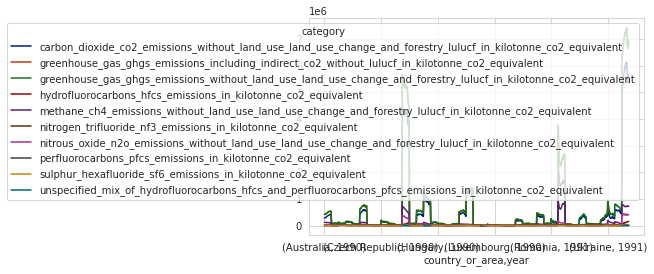

In [27]:
def tableplot():
    '''Plots the contents of the table of data created in our Prepatory steps'''
    fig=table.plot()
    return fig
tableplot()


In [28]:
gasnames = table.columns.values
def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
    plt.plot(data)
    plt.legend(gasnames,title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(nameOfCountry)

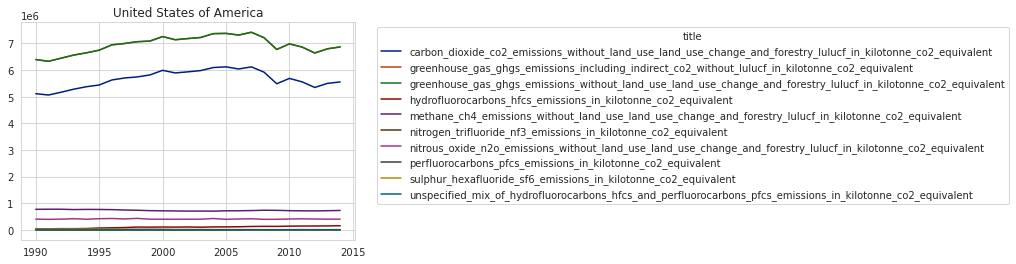

In [29]:
country_plot('United States of America')

In [30]:
gasnames = table.columns.values
def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
#     plt.plot(data)
#     plt.legend(gasnames)
#     plt.title(nameOfCountry)
    
    # I need something like the code below
    fig, ax = plt.subplots(1,1)
    
    ax.plot(data) # no need to plot anything, except for when you're analyzing the data
    ax.legend(gasnames)
    ax.title(nameOfCountry)
    
    return fig

In [31]:
def gascount():
    plt.figure(figsize=(15,7))
    ax = sns.countplot(replaced_emission["category"])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
    plt.tight_layout()
    plt.xlabel("Gas category",fontsize=16)
    plt.ylabel("Count",fontsize=16)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.show()
    return gascount

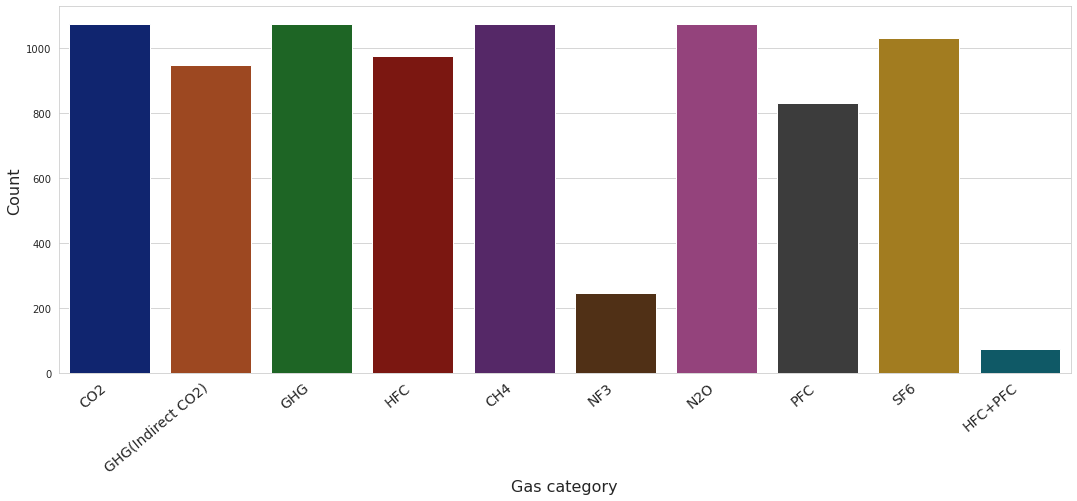

<function __main__.gascount()>

In [32]:
gascount()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [33]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [34]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [35]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [36]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [37]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [38]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [39]:
new_dataframe_emission

category  Total Amount Emitted(In Kilotones)
2  GHG                5.851885e+08                      
3  GHG(Indirect CO2)  5.574527e+08                      
1  CO2                4.640204e+08                      
0  CH4                7.872711e+07                      
6  N2O                3.213675e+07                      
4  HFC                7.272892e+06                      
8  PFC                1.515173e+06                      
9  SF6                1.243163e+06                      
5  HFC+PFC            2.448399e+05                      
7  NF3                2.813987e+04

**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

In [40]:
replaced_emission.head()

country_or_area  year          value category  Total Emitted Gas
0  Australia       2014  393126.946994  CO2      4.640204e+08     
1  Australia       2013  396913.936530  CO2      4.640204e+08     
2  Australia       2012  406462.847704  CO2      4.640204e+08     
3  Australia       2011  403705.528314  CO2      4.640204e+08     
4  Australia       2010  406200.993184  CO2      4.640204e+08

In [41]:
Finland_data = replaced_emission[replaced_emission["country_or_area"]=="Finland"].groupby(["category","year"],as_index = False)

In [42]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [43]:
data_div.head(10)

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   
                1995  109900.735111  305162.543549  433478.650826   
                1996  109185.337720  311914.819824  439803.962228   
                1997  111898.854749  320439.116819  451721.717815   
                1998  111427.929806  334328.142647  466382.112472   
                1999  107889.224971  343713.906948  472245.990778   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   
                1995  433478.650826      1004.032111 NaN       15578.196408   
                1996  439803.962228      414.170638  NaN       16609.586778   
                1997  451721.717815      705.228318  NaN       17201.890783   
                1998  466382.112472      998.289580  NaN       17743.913106   
                1999  472245.990778      1374.293110 NaN       17933.439790   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896  
                1995 NaN   1530.835665  302.307983  
                1996 NaN   1410.395058  269.652210  
                1997 NaN   1228.150898  248.476248  
                1998 NaN   1660.518820  223.318513  
                1999 NaN   1139.058757  196.067201

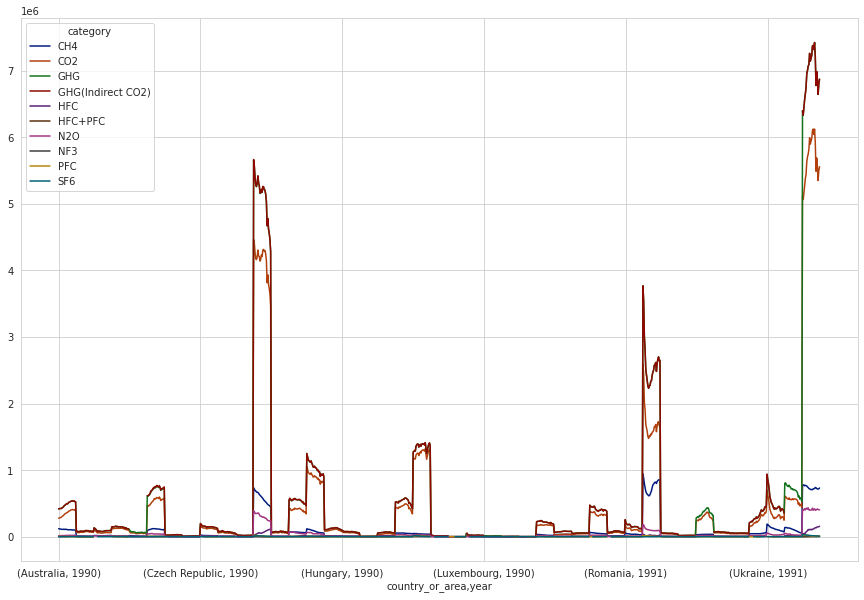

In [44]:
data_div.plot()

This doesn't depict the correct info and looks like a mess

### Plotting Country Wise

Total no. of Unique Countries

In [45]:
replaced_emission["country_or_area"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [46]:
gases = data_div.columns.values

In [47]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [48]:
# lets define a function that can plot the country data 
def plot_the_country(name):
    find = data_div.loc[name]
    plt.plot(find)
    plt.title(name)
    plt.legend(gases)
    plt.tick_params(labelsize=12)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.xlim(2000,2014)

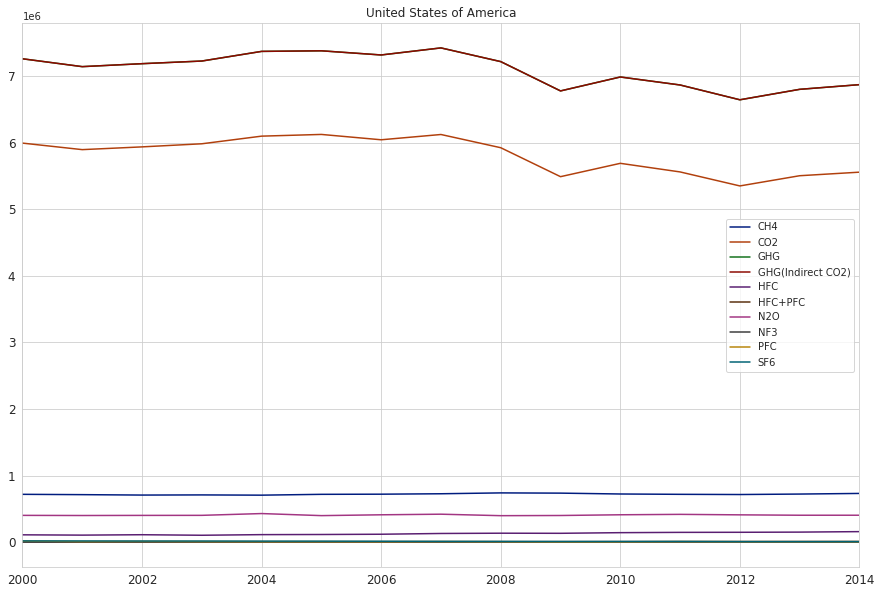

In [49]:
plot_the_country("United States of America")

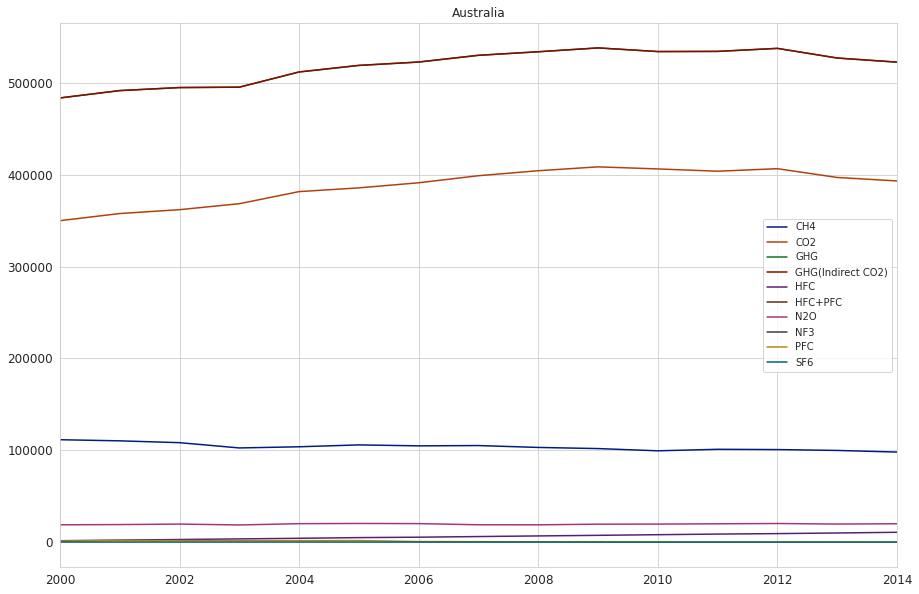

In [50]:
plot_the_country("Australia")

During Recession from Dec,2007-June,2009, United States Of America had a deep decline in emission of CO2. There may be many reasons, one being the decrease in purchasing power of automobile in USA or fall in Industrial development and production.

The UC-Irvine study, an economic analysis of U.S. energy use and emissions between 1997 and 2013, found that U.S. carbon dioxide emissions fell 10 percent between 2007 and 2009, a drop that was concurrent with a major fall in the consumption of goods and services because of the recession. That falloff was responsible for about 75 percent of the decline in U.S. carbon dioxide emissions, according to the study.

Utilities’ switching from coal to natural gas was responsible for only 18 percent of the emissions decline, suggesting that using more natural gas to generate power may have only a small climate benefit, the study says.

Part of the reason is that natural gas doesn’t just substitute for coal, the study says. It also slows the expansion of solar, wind and other renewable power sources when natural gas prices are low.

“Moreover, CO2 emissions are not the only consideration; a growing number of studies show that increased

May be United States of America has changed it's way of business and industrial laws after the Recession in 2009, that's why the emission value of CO2(direct and indirect) has increased till 2010.

On the other hand, Australia had no such effects.It had almost uniform increase in the amount of CO2 emission during recession.

The COVID pandemic also caused the emissions to drop also the internationally falling crude oil prices further reduced the emission rate.

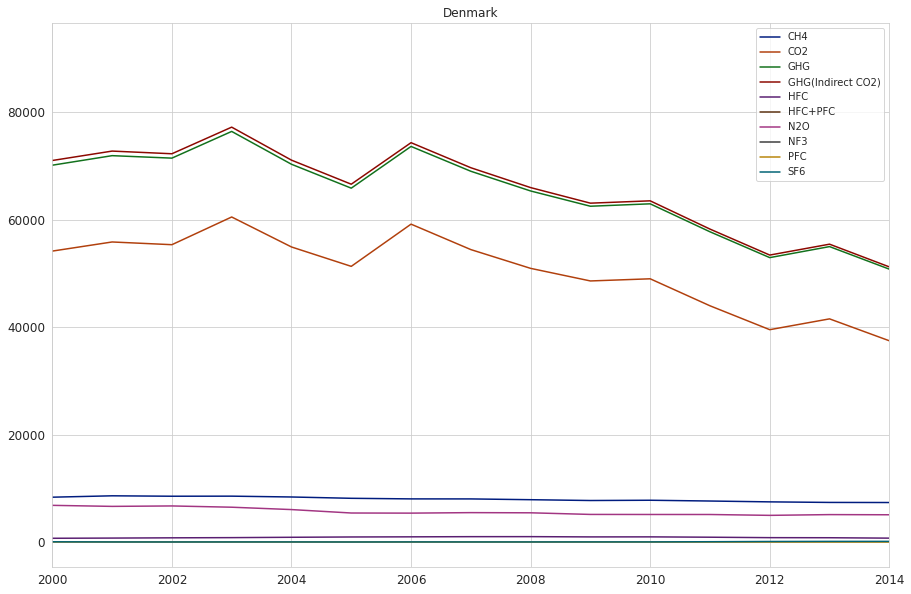

In [51]:
plot_the_country("Denmark")

May be after recession, **Denmark** had new laws on pollution control. There is a strong negative inclination.

Denmark is more strict in it's environmental laws than the US or China

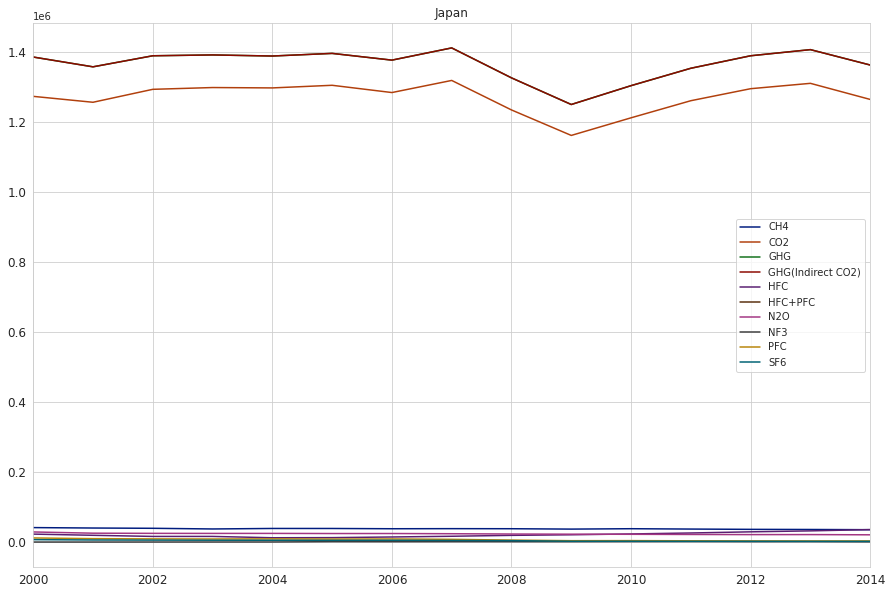

In [52]:
plot_the_country("Japan")

**Japan** had a decrease in CO2 emission during recession, may be they were affected the most or any new law arrived which reduced the purchasing power of their countymen. It requires more research.

**Conclusion-3** - We need to compare the emission data country wise instead of gas types,that can give us a better research output.

### Comparing Emission Data Country Wise

In [53]:
area_div = pd.pivot_table(replaced_emission, values='value', index=['category', 'year'], columns=['country_or_area'])
area_div.head(20)

country_or_area      Australia       Austria       Belarus       Belgium  \
category year                                                              
CH4      1990    118768.837813  10598.566361  17944.369142  12040.181048   
         1991    117744.641814  10462.096189  17258.134452  11999.377566   
         1992    116837.506726  10164.748677  16295.436192  11886.349715   
         1993    113837.511923  10073.833199  15583.113398  11838.303374   
         1994    110997.410185  9775.857792   14331.807083  11867.016600   
         1995    109900.735111  9674.049590   13611.075970  11947.638179   
         1996    109185.337720  9382.925634   13672.822022  11802.081834   
         1997    111898.854749  9011.517063   13578.265278  11689.898943   
         1998    111427.929806  8831.331453   13540.244709  11524.999684   
         1999    107889.224971  8645.176255   13212.462486  11265.277850   
         2000    111520.309552  8466.366071   12922.696280  10827.004563   
         2001    110301.733954  8284.300539   12799.025856  10386.252961   
         2002    108309.143528  8134.080336   12705.355450  9956.500859    
         2003    102574.207810  8061.205812   13734.631920  9372.468380    
         2004    103839.210857  8048.712308   14331.370196  9318.580720    
         2005    105887.562989  7809.615176   14727.060054  9074.769078    
         2006    104842.389866  7667.628872   15450.078576  8982.981926    
         2007    105174.667802  7543.052546   15646.793247  8947.755210    
         2008    103119.546054  7399.361705   16240.159788  8736.794244    
         2009    101886.833298  7294.264546   17118.031159  8668.573668    

country_or_area      Bulgaria         Canada      Croatia      Cyprus  \
category year                                                           
CH4      1990    16430.837565  95378.251942   3770.717761  693.566622   
         1991    15313.268855  97516.511686   3625.915742  704.355986   
         1992    14869.295993  101927.841563  3227.336089  733.570274   
         1993    13764.491319  105204.361167  3260.041563  761.678069   
         1994    12003.087341  108917.321071  3034.348436  773.175583   
         1995    12051.210562  113111.078283  2986.637175  797.533507   
         1996    11936.166516  116885.460266  2968.513006  819.083378   
         1997    11500.645277  118988.193048  2908.314030  826.651707   
         1998    10886.058568  120647.458345  2866.646554  830.270404   
         1999    10347.035078  120592.533777  2847.590855  831.090819   
         2000    10189.340058  120724.871831  2785.338223  847.453418   
         2001    9491.668896   119920.258788  2844.147841  887.602343   
         2002    9374.212548   117504.637071  2838.302617  921.251494   
         2003    10063.720369  116809.277477  2936.870511  917.705867   
         2004    9476.237783   117419.386087  3061.844195  914.712171   
         2005    8720.075935   116434.331258  3029.461752  894.249977   
         2006    8446.725322   115516.052739  3100.590412  894.042452   
         2007    8389.983299   113213.994031  3114.802057  915.518721   
         2008    8164.025188   110540.258265  3153.402762  919.096320   
         2009    7794.838368   106149.435213  3214.901483  921.274584   

country_or_area  Czech Republic      Denmark  ...  Russian Federation  \
category year                                 ...                       
CH4      1990    23315.046769    8082.707613  ...  942383.462118        
         1991    21607.175422    8279.662247  ...  875196.162997        
         1992    20139.159952    8364.646101  ...  794953.160990        
         1993    19226.589930    8570.915282  ...  737770.858519        
         1994    18086.829077    8437.693903  ...  680641.143638        
         1995    17744.942585    8497.613284  ...  655448.422294        
         1996    17564.912099    8608.320974  ...  637618.056003        
         1997    17105.079739    8506.801961  ...  627871.88965

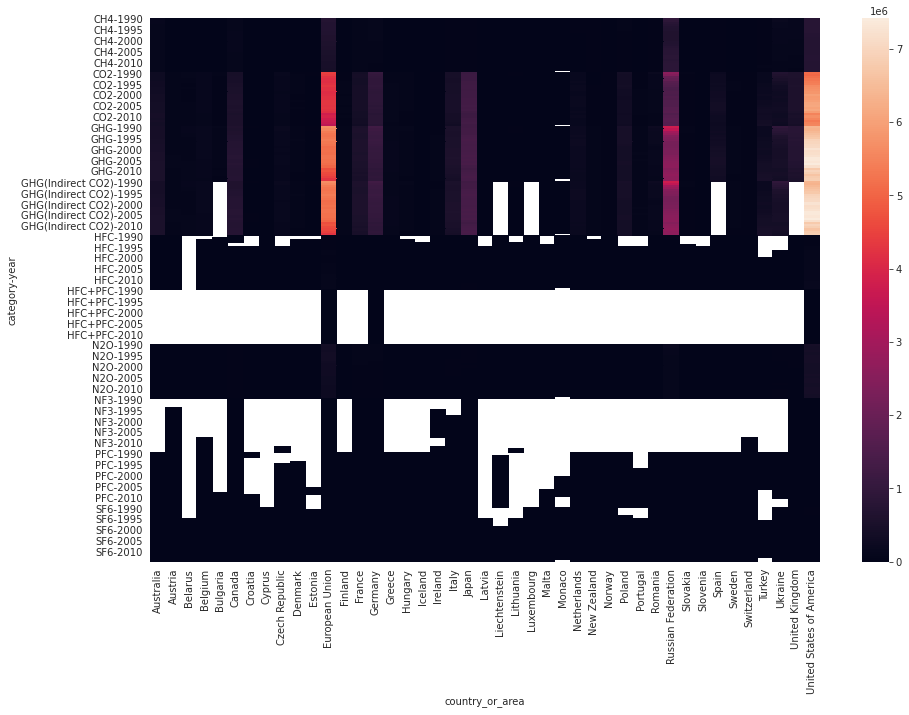

In [54]:
sns.heatmap(area_div)

In [55]:
countries = area_div.columns.values

In [56]:
def country_wise_plot(name):
    ''' Individual COuntry wise pollutors'''
    cname = area_div.loc[name]
    plt.plot(cname)
    plt.tick_params(labelsize=14)
    plt.legend(countries, loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 3)
    plt.rcParams["figure.figsize"] = [15, 10]

In [57]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

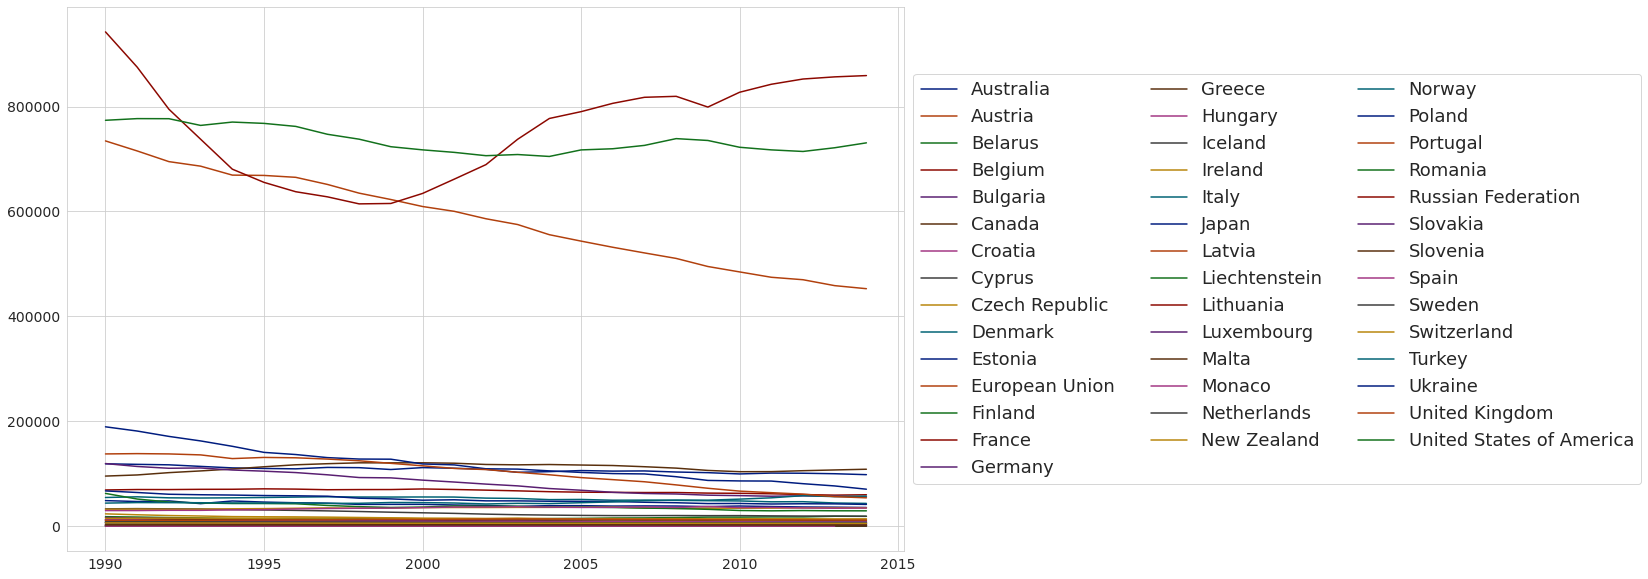

In [58]:
country_wise_plot(gases[0])

This provides a good rough estimation

### Comparing Countries By Passing Required Series

In [59]:
def gas_accord_country1(gas_name, country_name):                          # years from 1990-2004
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(1990,2004)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.title(gas_name)
    
    
def gas_accord_country2(gas_name, country_name):
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(2004,2017)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.title(gas_name)

This to draw plots for individual countries comparison

In [60]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [61]:
countries_name = replaced_emission["country_or_area"].unique()

In [62]:
countries_name

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

## Analysing the data WRT gas name and country

### For Methane(CH4) emission:

#### 1. Country Set - 1 :

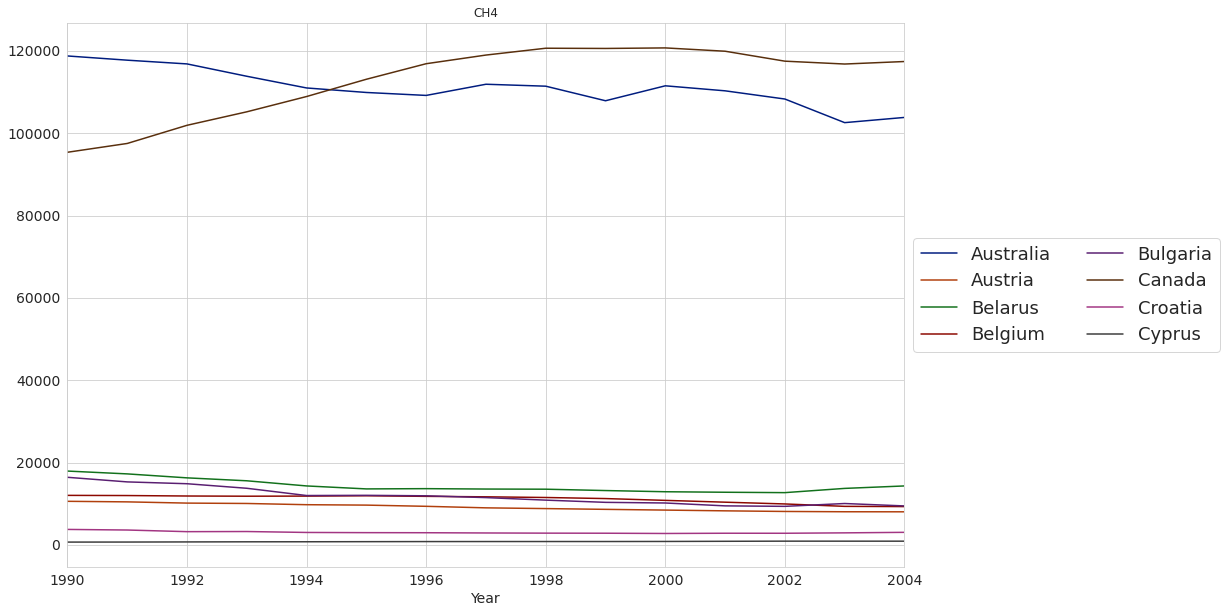

In [63]:
gas_accord_country1(gases[0],countries_name[:8])

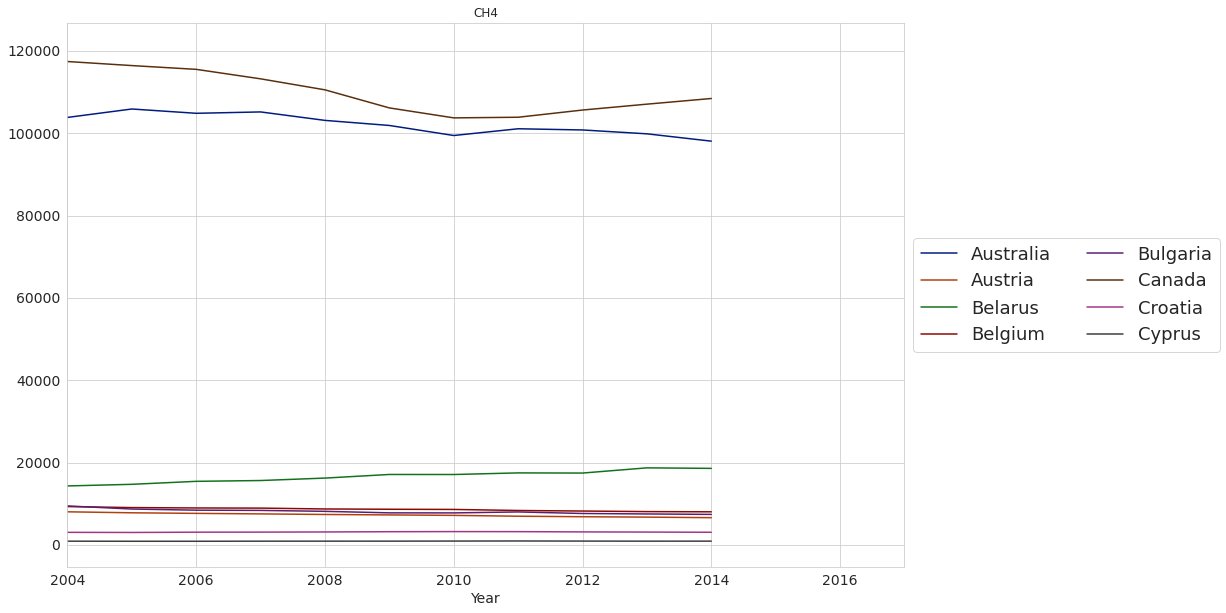

In [64]:
gas_accord_country2(gases[0],countries_name[:8])

#### 2. Country Set - 2 :

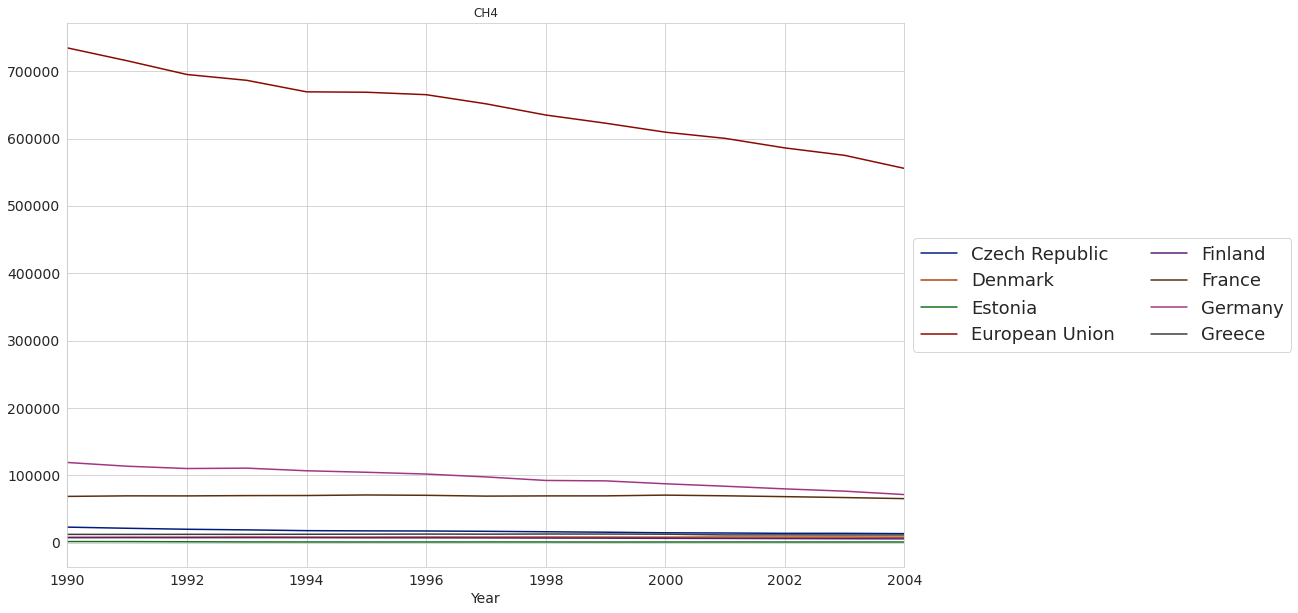

In [65]:
gas_accord_country1(gases[0],countries_name[8:16])

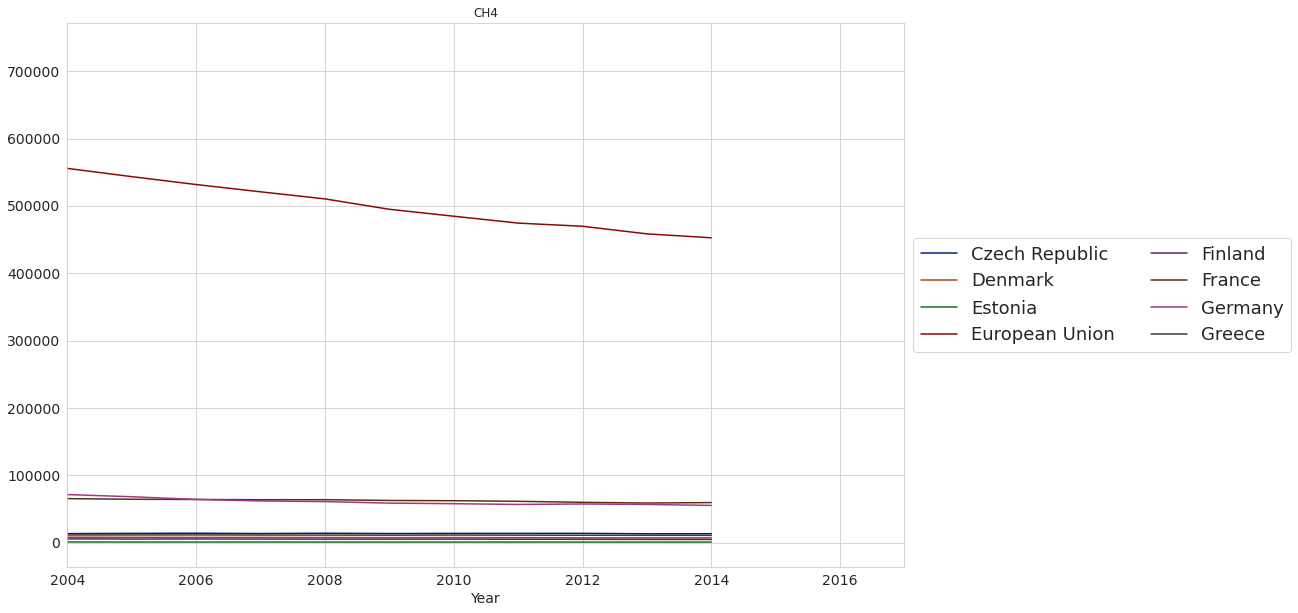

In [66]:
gas_accord_country2(gases[0],countries_name[8:16])

#### 3. Country Set - 3 :

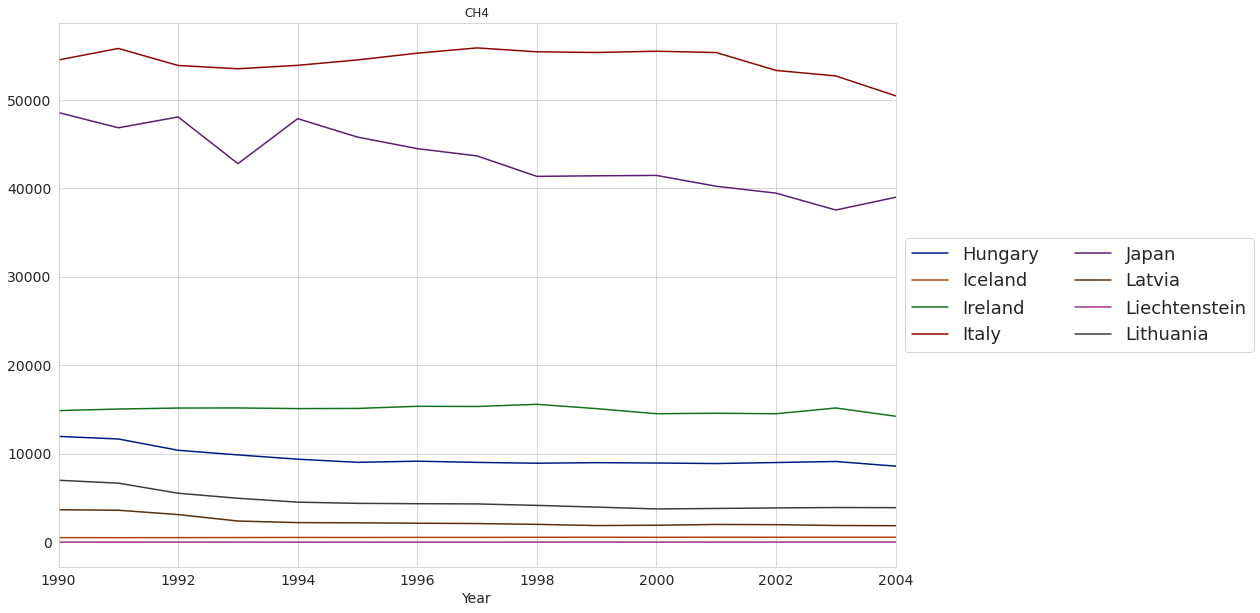

In [67]:
gas_accord_country1(gases[0],countries_name[16:24])

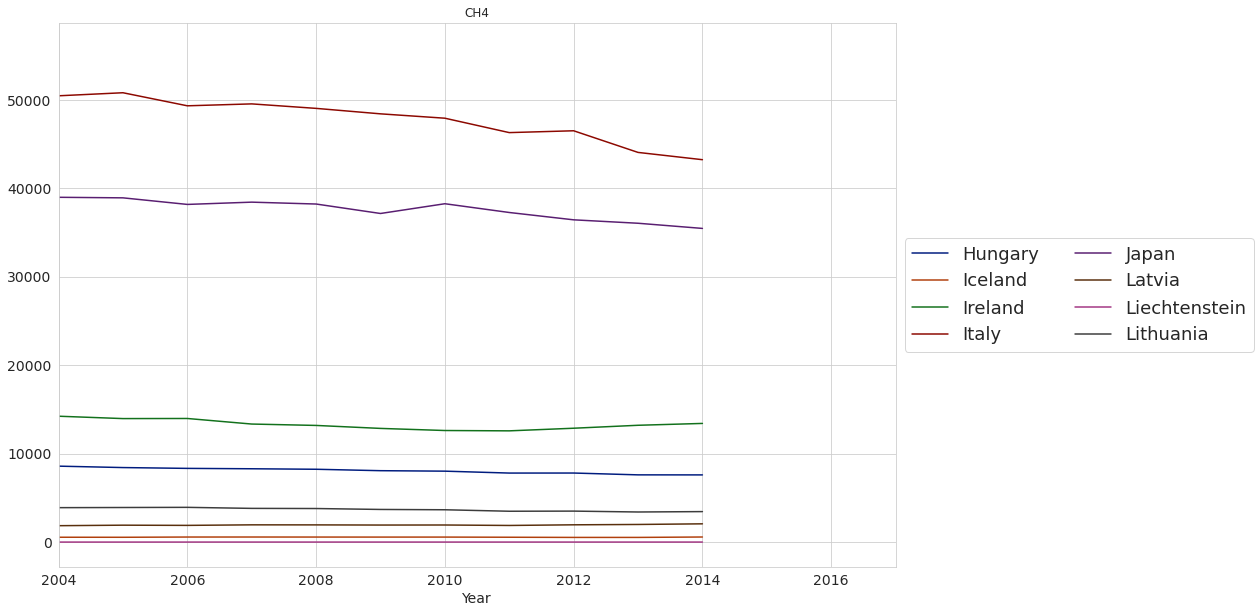

In [68]:
gas_accord_country2(gases[0],countries_name[16:24])

#### 3. Country Set - 4 :

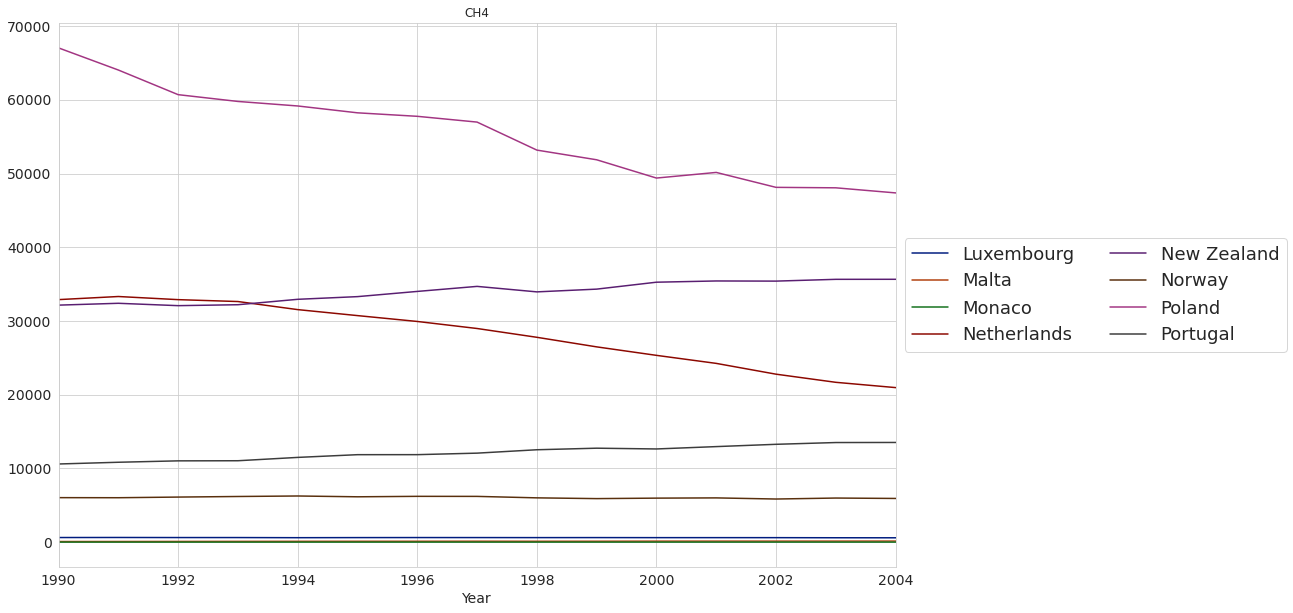

In [69]:
gas_accord_country1(gases[0],countries_name[24:32])

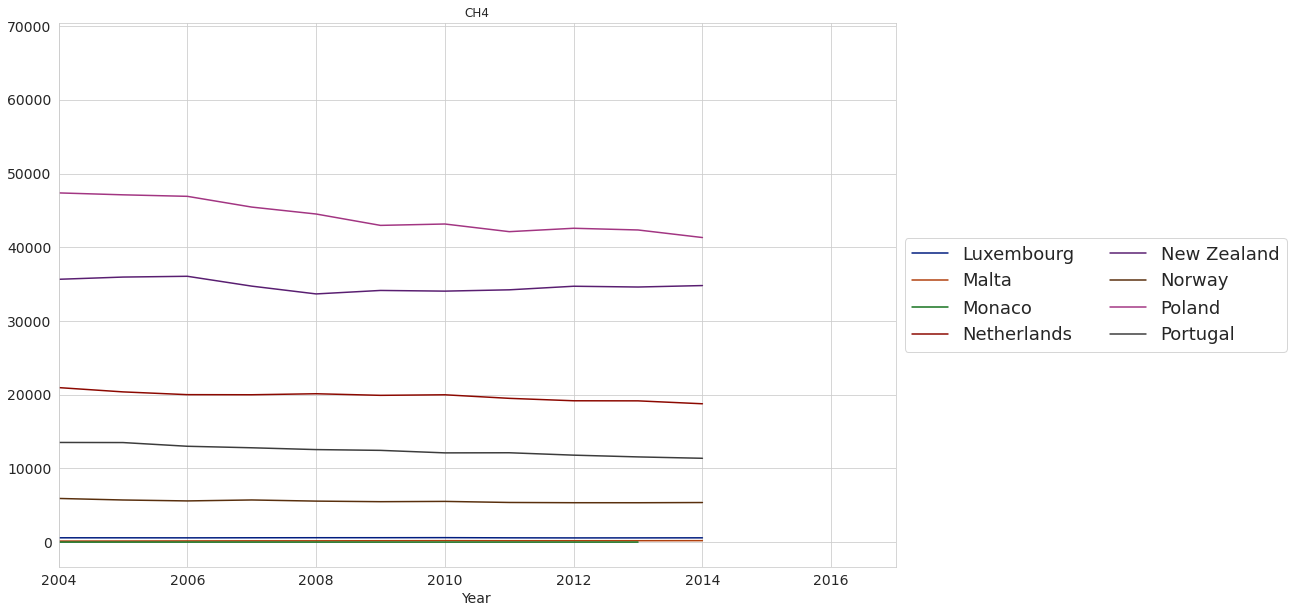

In [70]:
gas_accord_country2(gases[0],countries_name[24:32])

#### 4. Country Set - 4

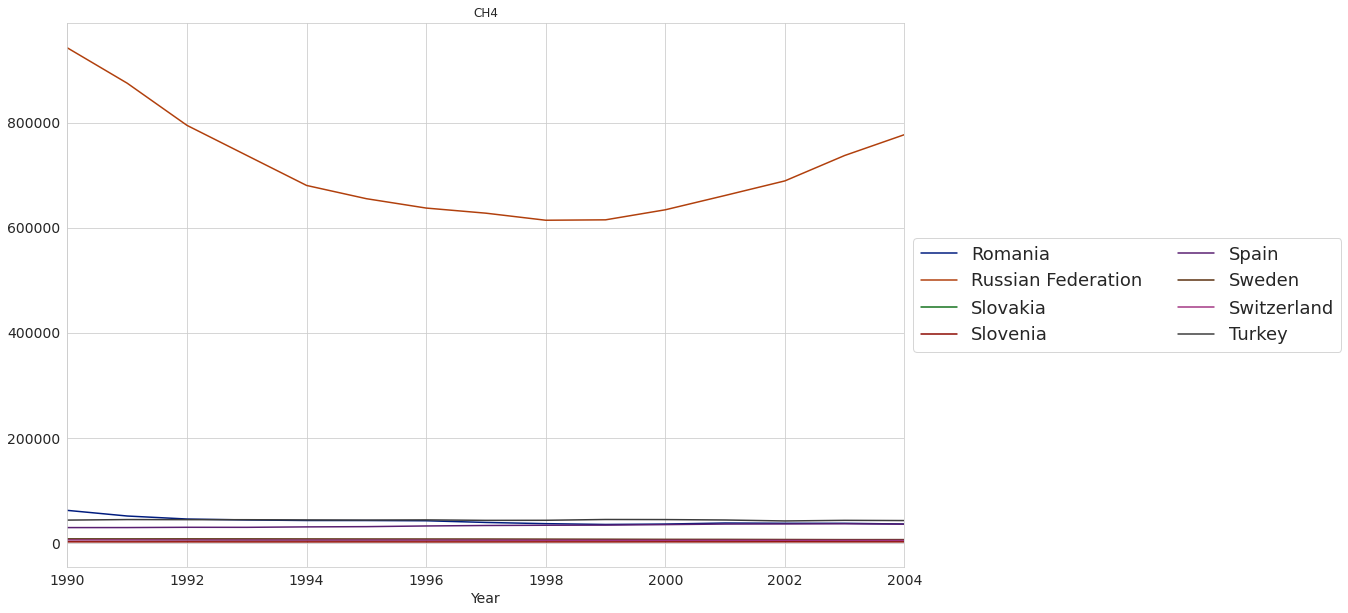

In [71]:
gas_accord_country1(gases[0],countries_name[32:40])

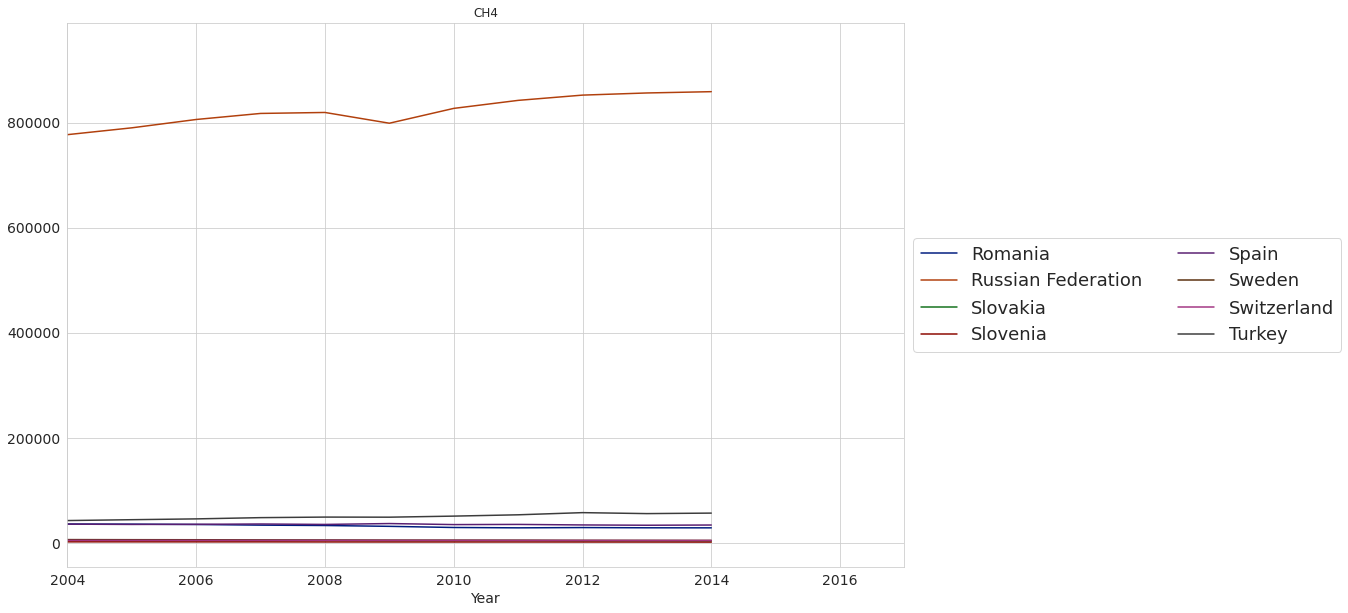

In [72]:
gas_accord_country2(gases[0],countries_name[32:40])

#### 5. Final Set -

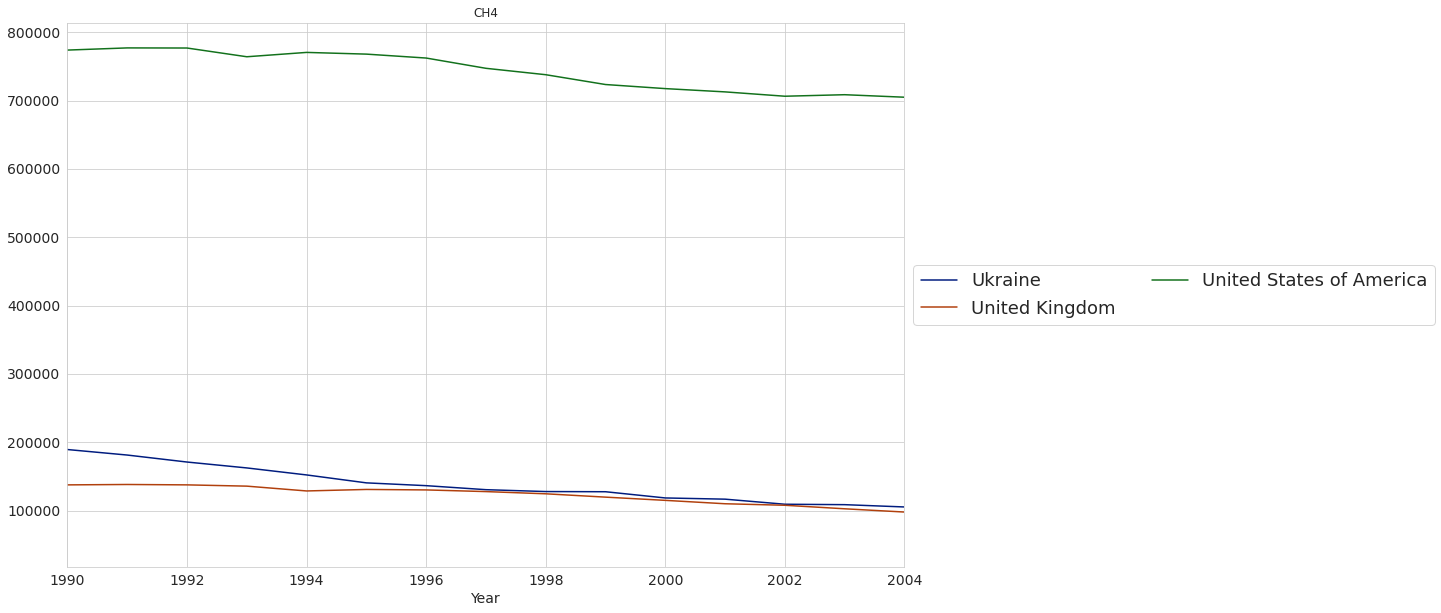

In [73]:
gas_accord_country1(gases[0],countries_name[40:43])

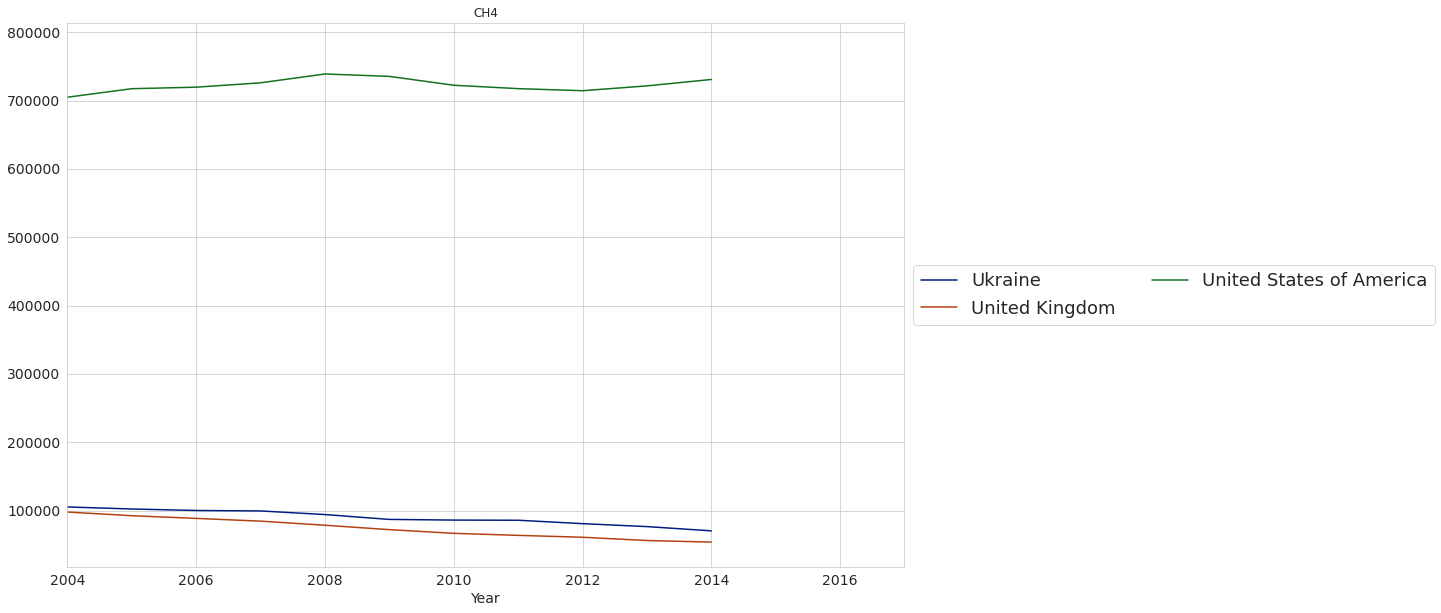

In [74]:
gas_accord_country2(gases[0],countries_name[40:43])

In [75]:
data_div.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

### Cleaning the GHG & GHG(Indirect CO2) column

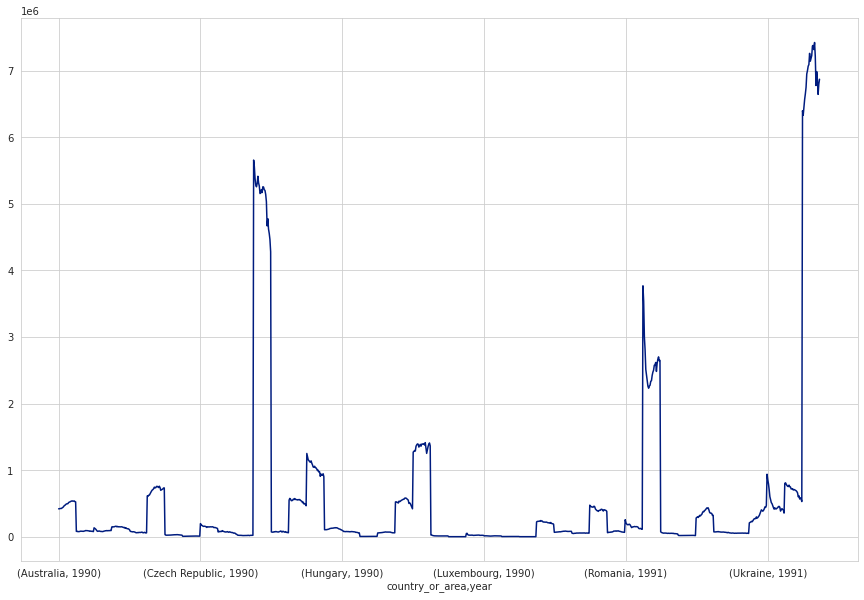

In [76]:
data_div["GHG"].plot()

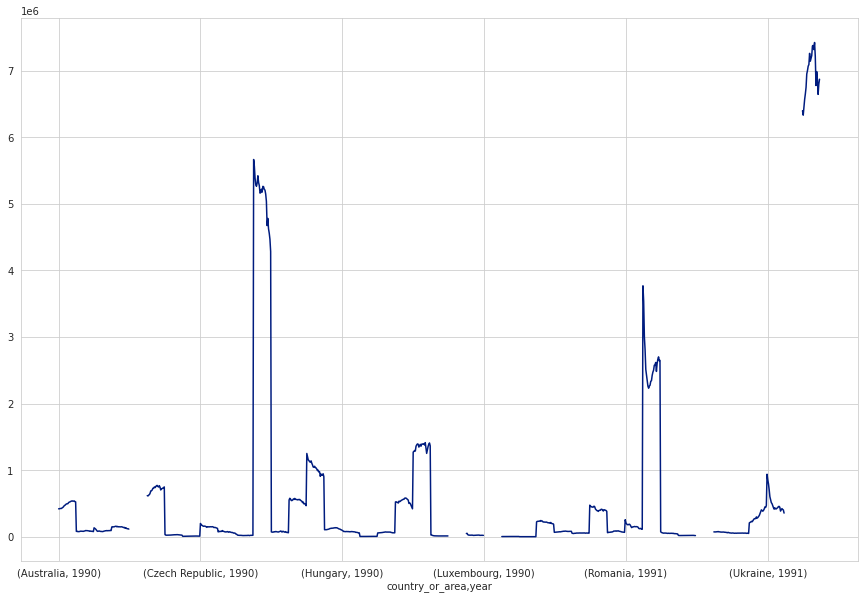

In [77]:
data_div["GHG(Indirect CO2)"].plot()

It seems like **GHG(Indirect CO2)** has NaN data and it's discontinuous. Also the above plots depict that both the column are almost similar, lets check if there is any dissimilarity.

In [78]:
cleaned_data = data_div

In [79]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

In [80]:
cleaned_data["Check"] = cleaned_data["GHG"] - cleaned_data["GHG(Indirect CO2)"]

In [81]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  Check  
country_or_area year                                       
Australia       1990 NaN   4607.012919  211.018511  0.0    
                1991 NaN   4610.743294  228.944834  0.0    
                1992 NaN   4603.282544  246.858849  0.0    
                1993 NaN   3315.528376  264.759156  0.0    
                1994 NaN   2164.428749  282.640896  0.0

In [82]:
cleaned_data[(cleaned_data["Check"] !=0) & (cleaned_data["Check"] < 0)]

category                        CH4            CO2            GHG  \
country_or_area year                                                
Canada          1990  95378.251942   463493.332388  612866.051520   
                1991  97516.511686   454246.137946  605548.115938   
                1992  101927.841563  468546.458912  622763.761066   
                1993  105204.361167  467607.237235  624641.473382   
                1994  108917.321071  482691.671272  646008.211067   
...                             ...            ...            ...   
Switzerland     2010  5271.579520    45027.064480   54373.081962    
                2011  5206.270747    40973.149167   50296.296816    
                2012  5164.955710    42241.553605   51637.521590    
                2013  5095.049360    43181.659440   52519.985629    
                2014  5095.069284    39265.052592   48617.080740    

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Canada          1990  616908.110877      970.584000  NaN       42239.730772   
                1991  611861.129270      1056.720000 NaN       41010.074066   
                1992  625134.003493      829.836000  NaN       41323.517716   
                1993  631353.636877     NaN          NaN       42000.445644   
                1994  652999.137827     NaN          NaN       45062.170191   
...                             ...      ..           ..                ...   
Switzerland     2010  54498.086338       1329.364549 NaN       2524.077450    
                2011  50420.474372       1410.149496 NaN       2473.198523    
                2012  51759.672142       1489.046425 NaN       2461.363240    
                2013  52641.217810       1513.188896 NaN       2425.572882    
                2014  48737.866661       1500.979852 NaN       2452.849492    

category                   NF3          PFC          SF6        Check  
country_or_area year                                                   
Canada          1990  0.324454  7557.901859  3225.926105 -4042.059357  
                1991  0.315784  8033.113215  3685.243241 -6313.013332  
                1992  0.307113  7578.683113  2557.116649 -2370.242427  
                1993  0.298443  7455.583436  2373.547457 -6712.163495  
                1994  0.289772  6895.014542  2441.744218 -6990.926760  
...                        ...          ...          ...          ...  
Switzerland     2010  8.453287  64.567514    147.975161  -125.004376   
                2011  6.218316  67.776071    159.534496  -124.177555   
                2012  0.361628  71.326589    208.914393  -122.150552   
                2013  0.094784  51.963019    252.457249  -121.232181   
                2014  0.403587  43.883614    258.842320  -120.785921   

[275 rows x 11 columns]

 So there are 275 rows who has a differenc of **GHG** and **GHG(Indirect CO2)** column. So we can safely drop the **GHG(Indirect CO2) column**.

In [83]:
cleaned_data = cleaned_data.drop("GHG(Indirect CO2)",axis = 1)

In [84]:
cleaned_data = cleaned_data.drop("Check",axis = 1)

### Checking the "HFC+PFC" Column 

In [85]:
cleaned_data["HFC+PFC"].isnull().sum()

999

In [86]:
Regular_data = cleaned_data[cleaned_data["HFC+PFC"].isnull()==False]
len(Regular_data)

75

So the conclusion is **HFC+PFC** column has only 75 values which are not nulls.

In [87]:
Regular_data = Regular_data.reset_index()

In [88]:
Regular_data.head(10)

category country_or_area  year            CH4           CO2           GHG  \
0         European Union  1990  734491.057034  4.462205e+06  5.656504e+06   
1         European Union  1991  715378.704916  4.403723e+06  5.558237e+06   
2         European Union  1992  695017.254203  4.259923e+06  5.378841e+06   
3         European Union  1993  686376.821938  4.177107e+06  5.279951e+06   
4         European Union  1994  669301.263462  4.161321e+06  5.255114e+06   
5         European Union  1995  668698.051517  4.204481e+06  5.306108e+06   
6         European Union  1996  665079.336733  4.304793e+06  5.413300e+06   
7         European Union  1997  651528.738611  4.216525e+06  5.313562e+06   
8         European Union  1998  634900.160180  4.207666e+06  5.265846e+06   
9         European Union  1999  622775.452019  4.139003e+06  5.153485e+06   

category           HFC      HFC+PFC            N2O         NF3           PFC  \
0         29125.636300  5705.723894  388663.460586  23.775890   25369.662019   
1         29148.253055  5236.723320  370242.088936  25.486229   23023.080380   
2         31563.920261  5222.149630  355959.767869  27.370715   18844.424042   
3         34486.617159  5215.637160  345876.471393  29.447229   17891.051869   
4         39125.646161  5487.385110  348484.822972  32.494030   17217.942090   
5         43748.978742  5773.246762  351343.564079  43.481084   16805.540057   
6         50862.683324  4324.621056  356924.647677  69.420645   16147.636847   
7         58699.699209  4208.604376  353901.179362  103.422375  14975.287478   
8         60079.904751  4108.460476  331944.081021  116.818674  14155.142661   
9         51748.841340  3947.177534  311617.795637  60.790961   13770.439811   

category           SF6  
0         10919.699659  
1         11459.057988  
2         12282.827908  
3         12968.382049  
4         14142.844872  
5         15214.529485  
6         15098.003771  
7         13620.341702  
8         12875.110913  
9         10561.358463

In [89]:
Regular_data.groupby("country_or_area").count()

category                  year  CH4  CO2  GHG  HFC  HFC+PFC  N2O  NF3  PFC  \
country_or_area                                                              
European Union            25    25   25   25   25   25       25   25   25    
Germany                   25    25   25   25   25   25       25   25   25    
United States of America  25    25   25   25   25   25       25   25   25    

category                  SF6  
country_or_area                
European Union            25   
Germany                   25   
United States of America  25

As we can see, the dataset has data for only for three countries

In [90]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

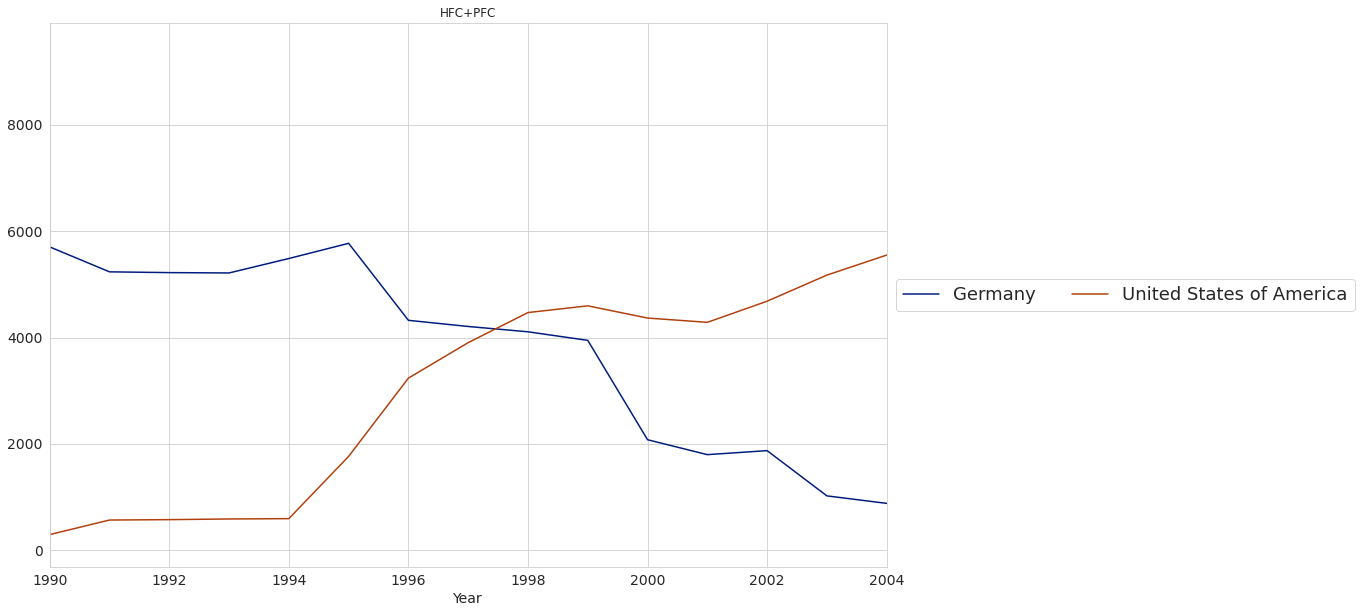

In [91]:
gas_accord_country1(gases[5],["Germany","United States of America"])

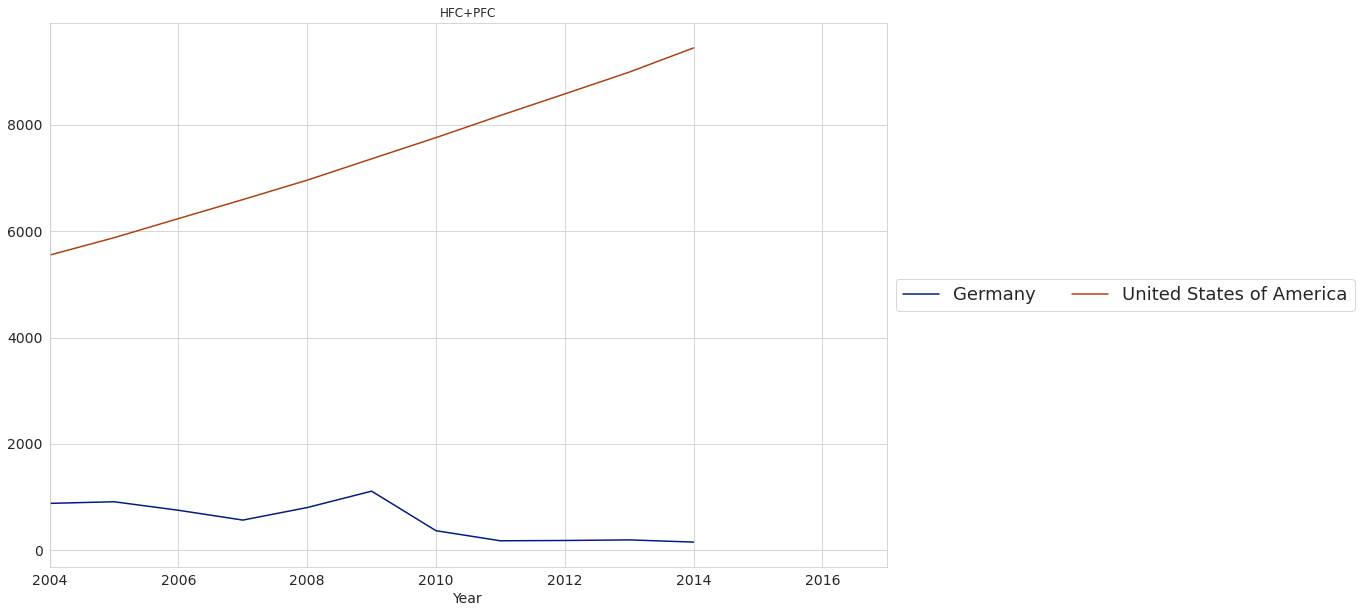

In [92]:
gas_accord_country2(gases[5],["Germany","United States of America"])

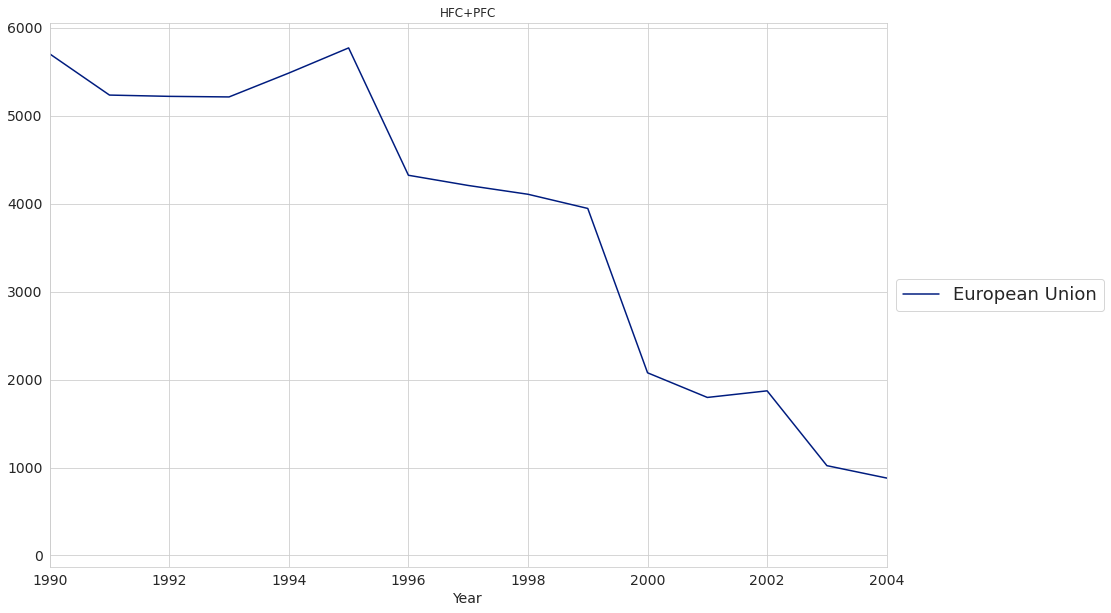

In [93]:
gas_accord_country1(gases[5],["European Union"])

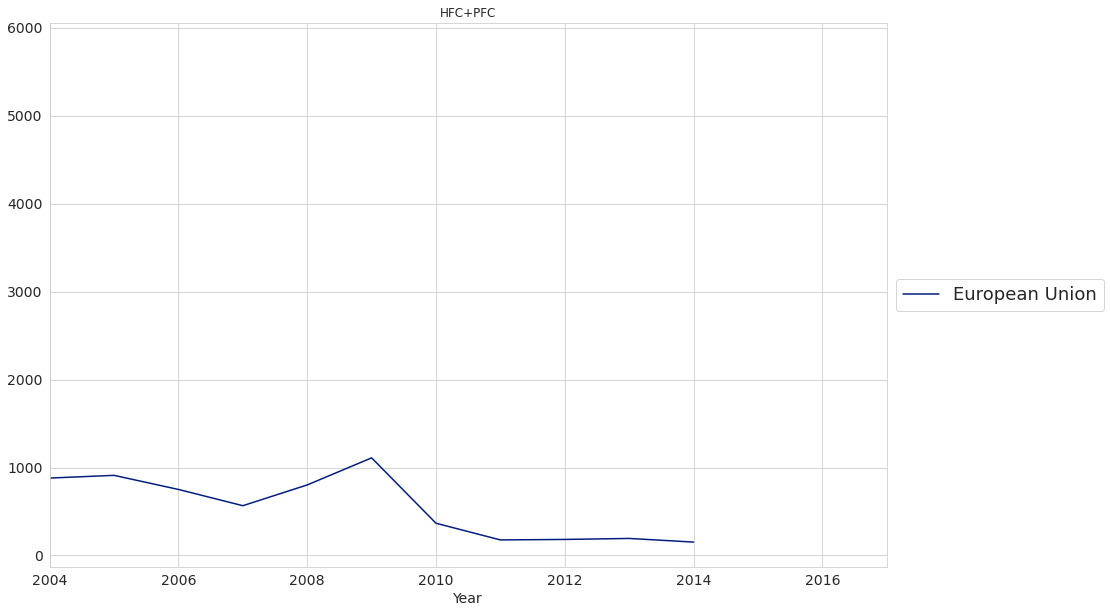

In [94]:
gas_accord_country2(gases[5],["European Union"])

### Analysing the HFC and PFC column

#### HFC

In [95]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [96]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category                      HFC  HFC+PFC           N2O  NF3          PFC  \
country_or_area year                                                         
Australia       1990  1424.683520 NaN       15345.597858 NaN   4607.012919   
                1991  1424.683520 NaN       14923.405021 NaN   4610.743294   
                1992  1333.184000 NaN       15293.183355 NaN   4603.282544   
                1993  1829.872000 NaN       15374.993428 NaN   3315.528376   
                1994  1027.343549 NaN       15790.426852 NaN   2164.428749   

category                     SF6  
country_or_area year              
Australia       1990  211.018511  
                1991  228.944834  
                1992  246.858849  
                1993  264.759156  
                1994  282.640896

In [97]:
countries_name

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [98]:
cleaned_data[cleaned_data["HFC"].isnull()==True]

category                        CH4            CO2            GHG  HFC  \
country_or_area year                                                     
Belarus         1990  17944.369142   100438.095064  133457.162012 NaN    
                1991  17258.134452   93649.166141   125601.052928 NaN    
                1992  16295.436192   87060.810290   116588.686465 NaN    
                1993  15583.113398   75551.755292   103951.525256 NaN    
                1994  14331.807083   62402.279083   88206.356740  NaN    
...                            ...            ...             ...  ..    
Ukraine         1992  171038.146236  577064.259625  795446.960614 NaN    
                1993  162409.127836  498504.838992  705376.575955 NaN    
                1994  152153.898576  409721.673978  600339.977228 NaN    
                1995  140557.060826  380871.283681  557047.936318 NaN    
                1996  136462.531351  344347.189394  511686.629324 NaN    

category              HFC+PFC           N2O  NF3         PFC       SF6  
country_or_area year                                                    
Belarus         1990 NaN       15074.697806 NaN  NaN         NaN        
                1991 NaN       14693.752335 NaN  NaN         NaN        
                1992 NaN       13232.439983 NaN  NaN         NaN        
                1993 NaN       12816.656567 NaN  NaN         NaN        
                1994 NaN       11472.270575 NaN  NaN         NaN        
...                   ..                ...  ..   ..          ..        
Ukraine         1992 NaN       47202.173083 NaN   142.351143  0.030527  
                1993 NaN       44318.983808 NaN   143.566172  0.059146  
                1994 NaN       38303.117961 NaN   161.221843  0.064870  
                1995 NaN       35441.464277 NaN   178.059802  0.067732  
                1996 NaN       30733.596075 NaN   143.242864  0.069640  

[99 rows x 9 columns]

As we can see 99 rows have Nan values in their HFC column, hence we can ignore them during our analysis

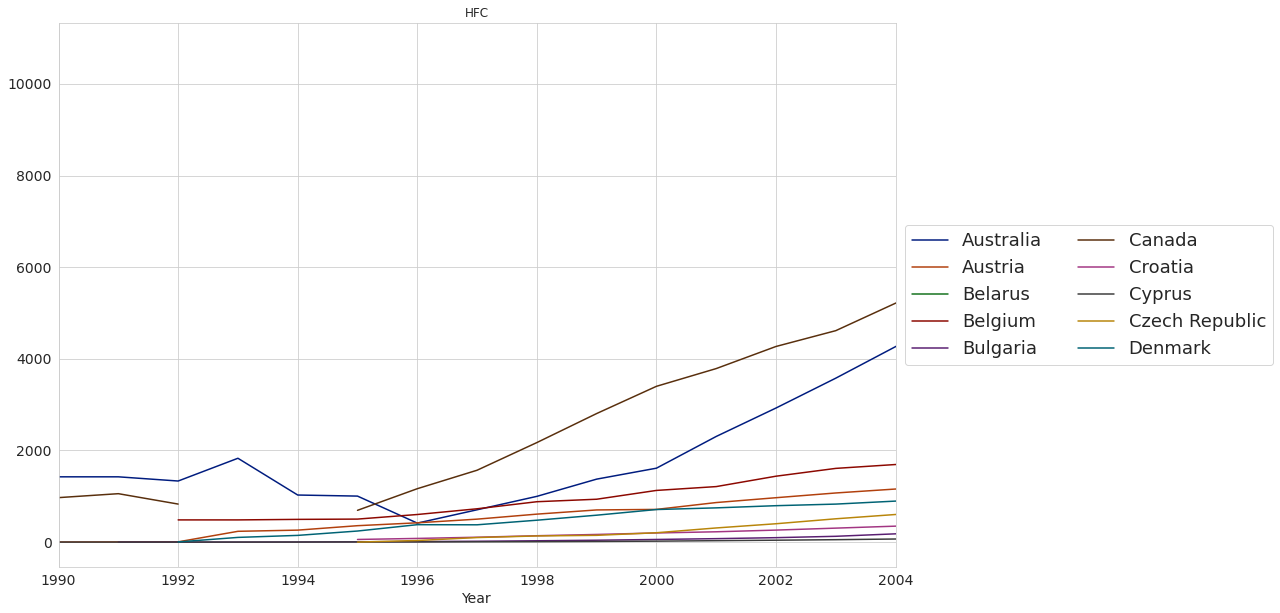

In [99]:
gas_accord_country1(gases[4],countries_name[:10])

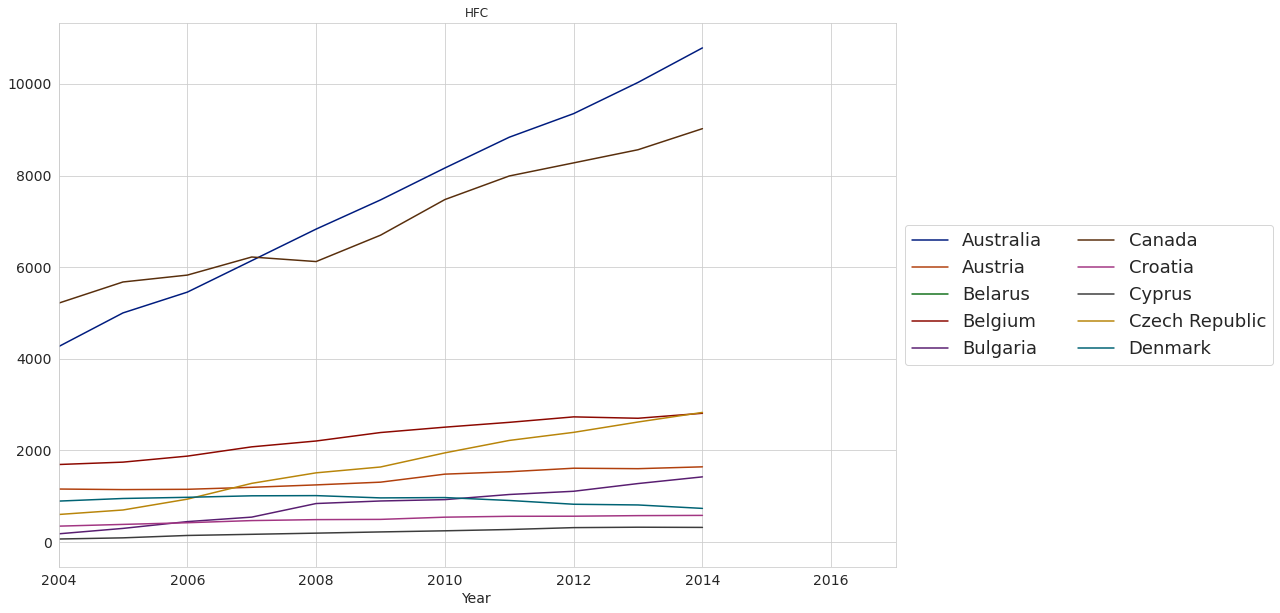

In [100]:
gas_accord_country2(gases[4],countries_name[:10])

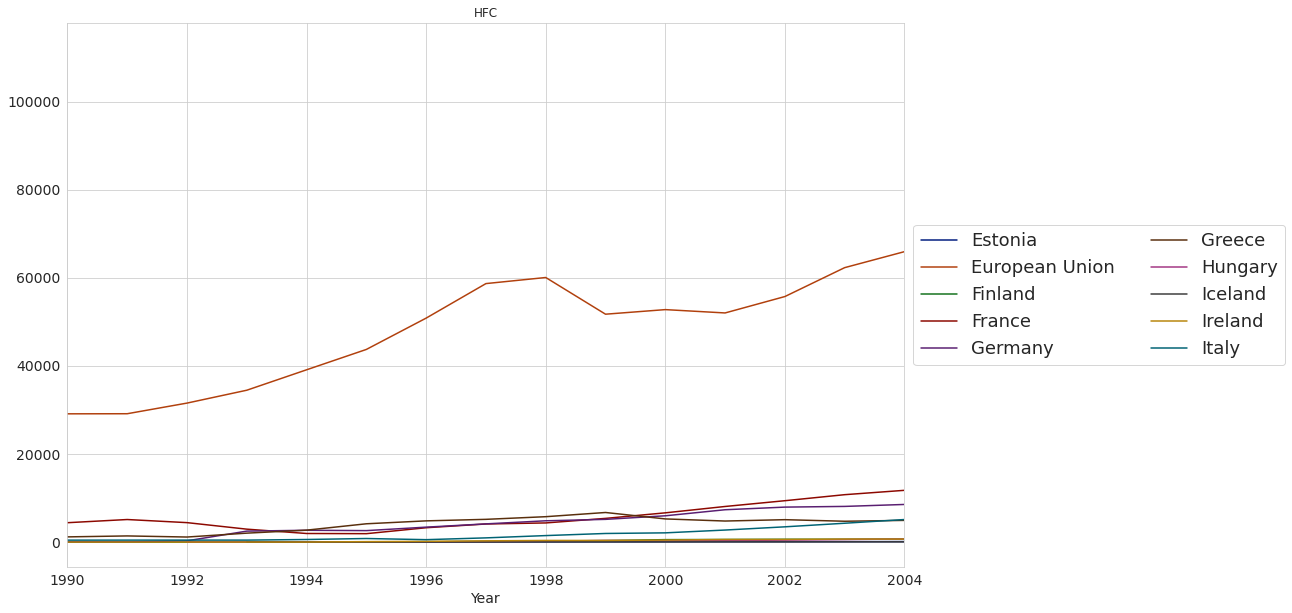

In [101]:
gas_accord_country1(gases[4],countries_name[10:20])

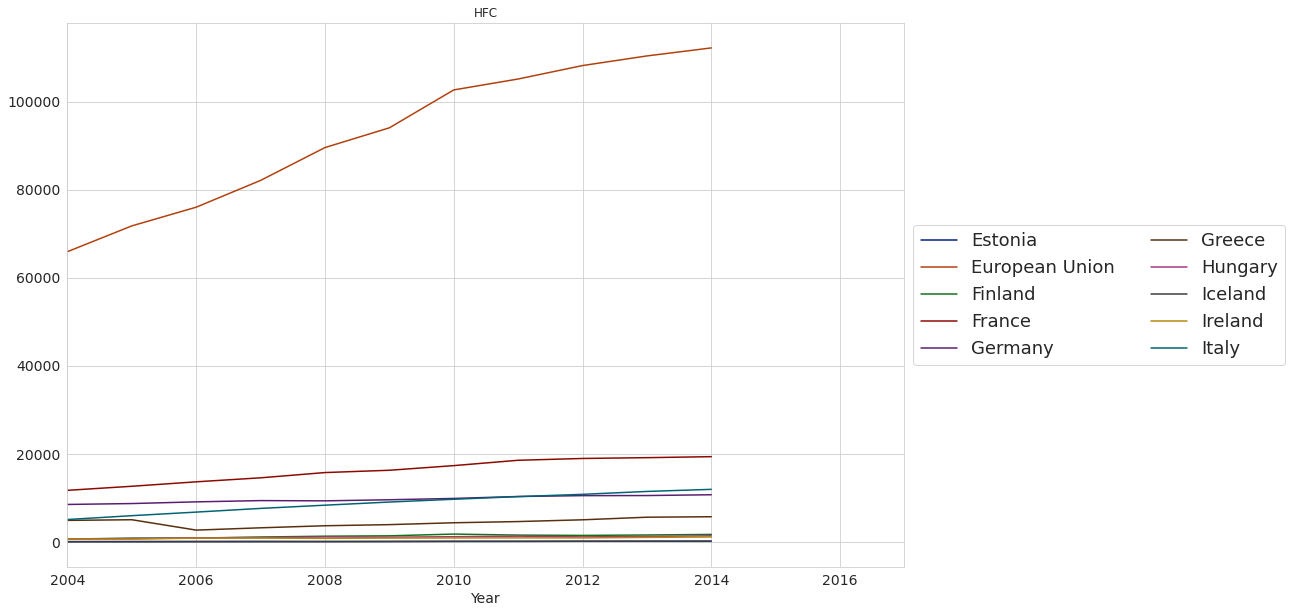

In [102]:
gas_accord_country2(gases[4],countries_name[10:20])

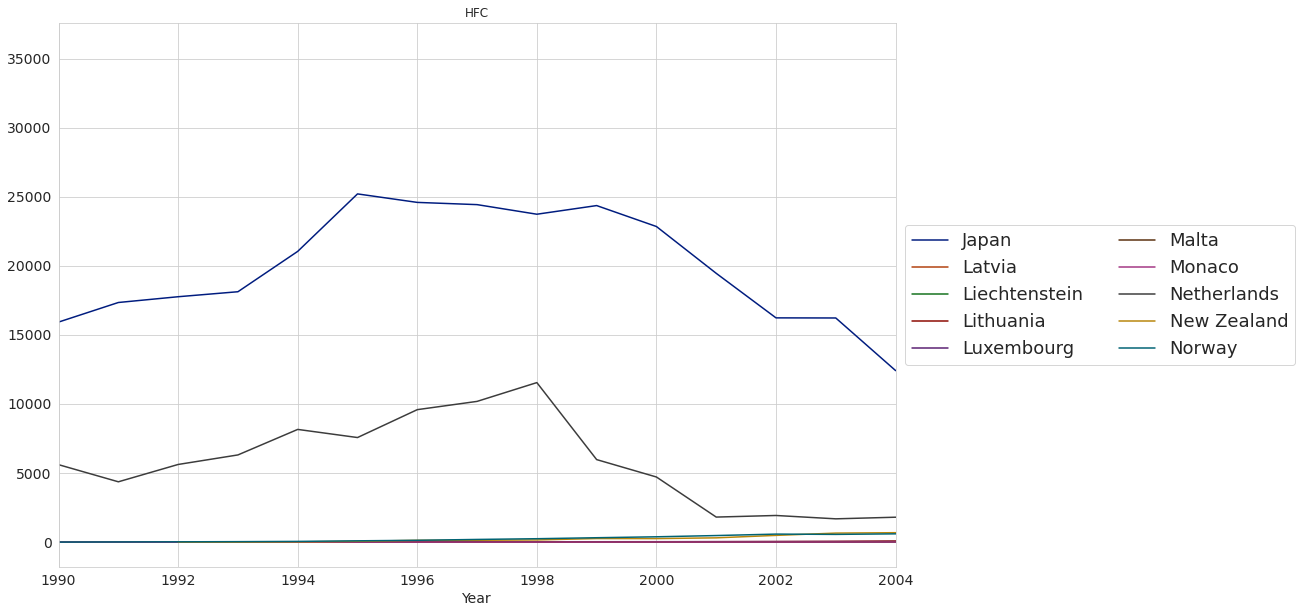

In [103]:
gas_accord_country1(gases[4],countries_name[20:30])

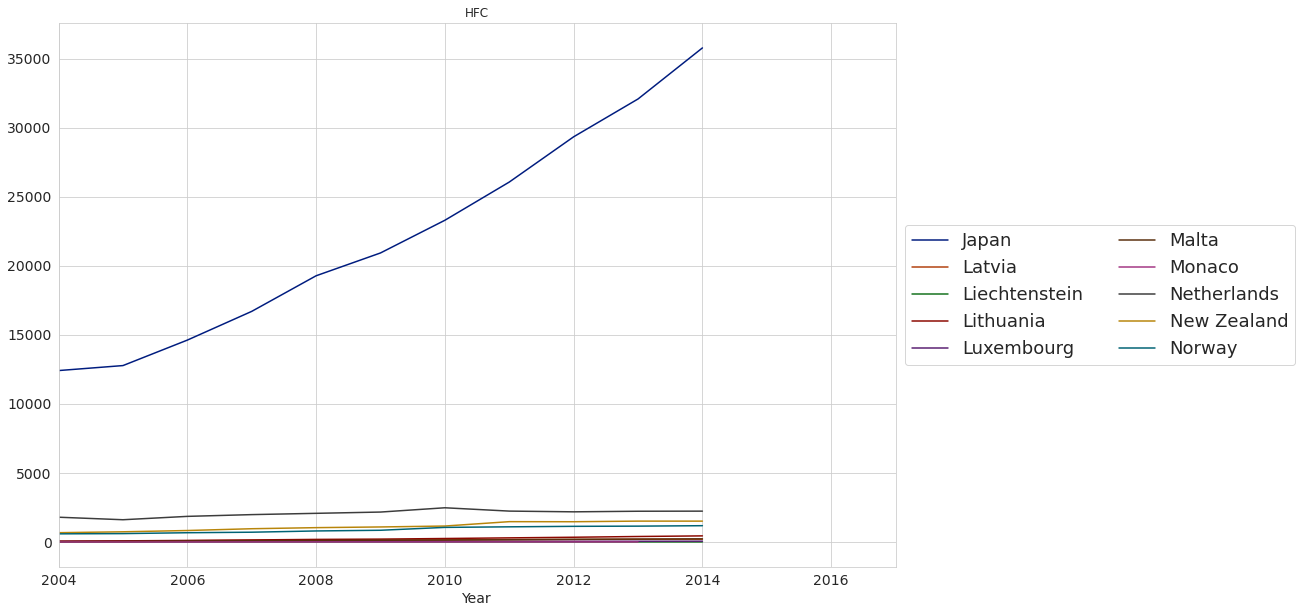

In [104]:
gas_accord_country2(gases[4],countries_name[20:30])

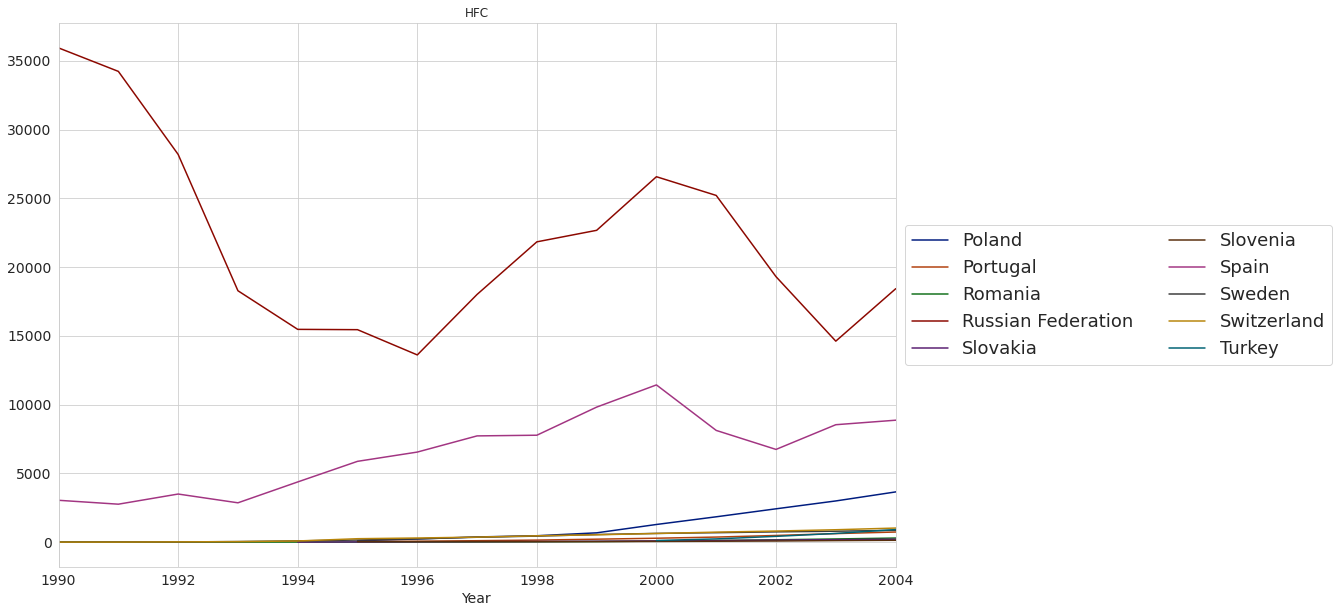

In [105]:
gas_accord_country1(gases[4],countries_name[30:40])

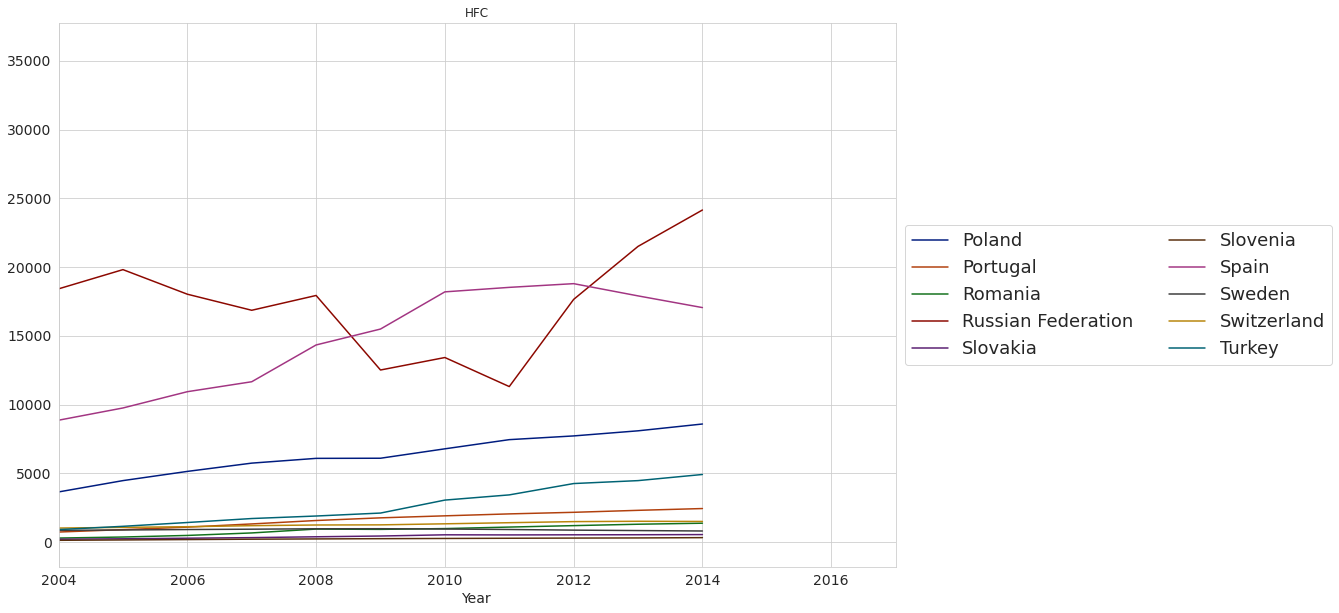

In [106]:
gas_accord_country2(gases[4],countries_name[30:40])

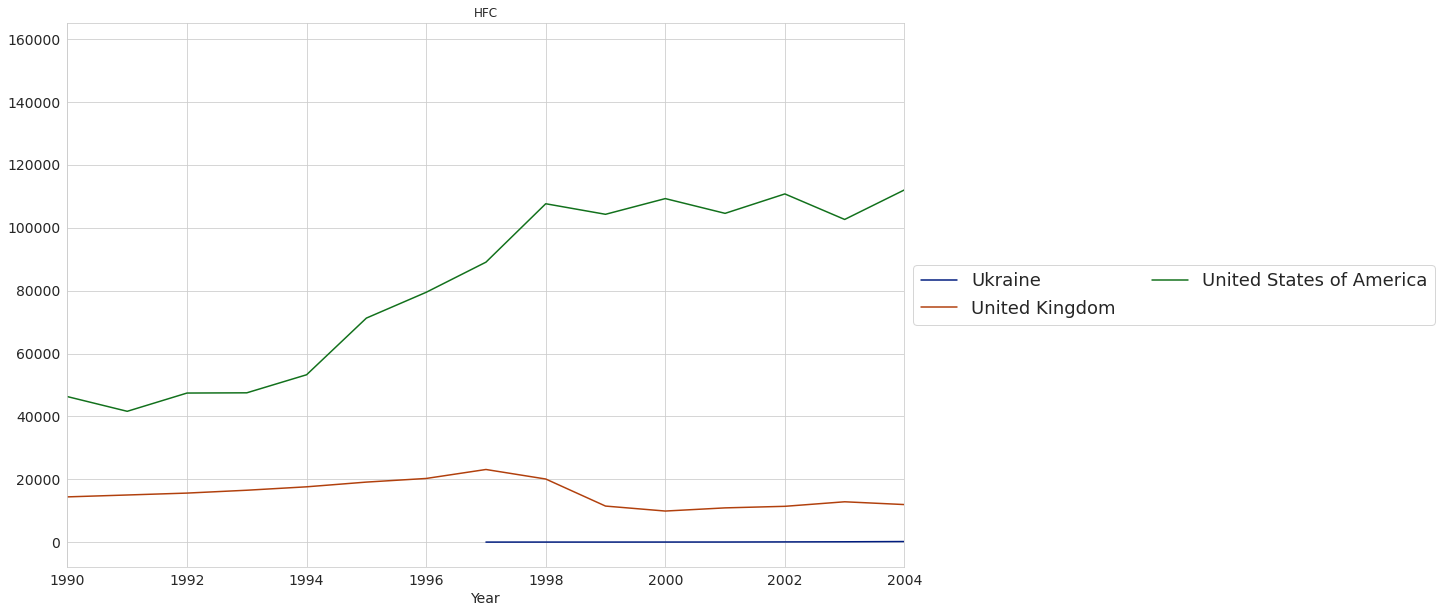

In [107]:
gas_accord_country1(gases[4],countries_name[40:])

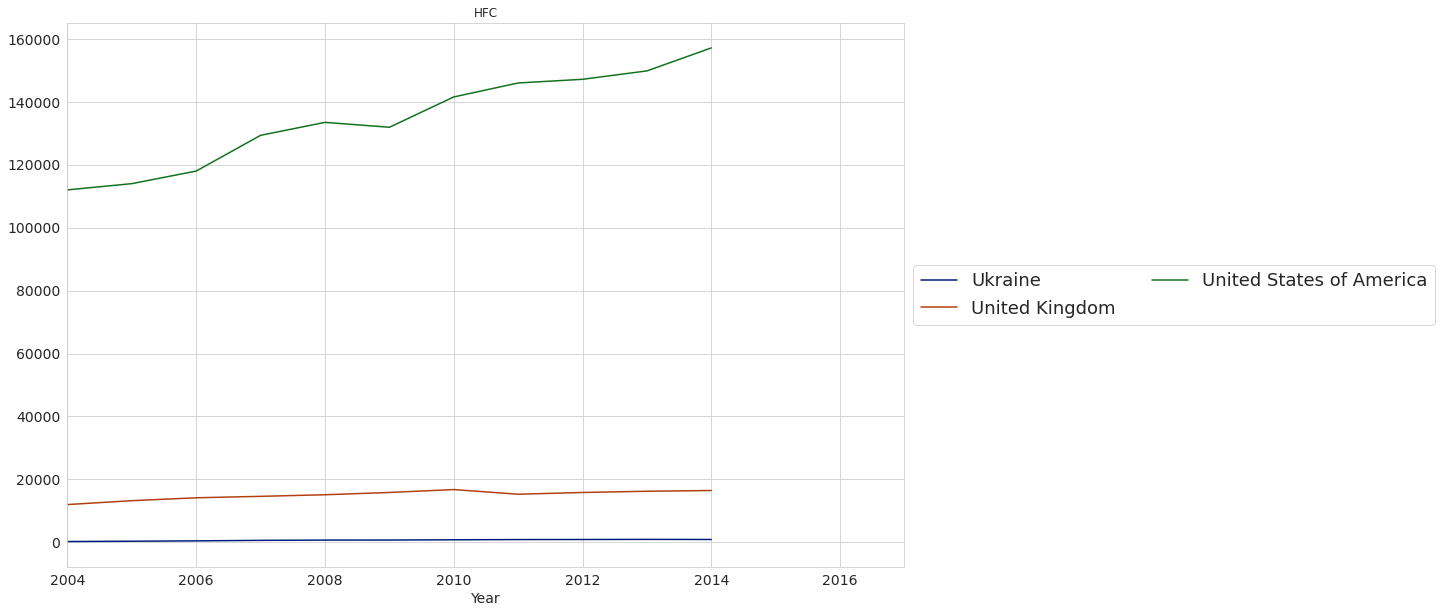

In [108]:
gas_accord_country2(gases[4],countries_name[40:])

#### PFC

In [109]:
cleaned_data[cleaned_data["PFC"].isnull()==True]

category                       CH4            CO2            GHG          HFC  \
country_or_area year                                                            
Belarus         1990  17944.369142  100438.095064  133457.162012 NaN            
                1991  17258.134452  93649.166141   125601.052928 NaN            
                1992  16295.436192  87060.810290   116588.686465 NaN            
                1993  15583.113398  75551.755292   103951.525256 NaN            
                1994  14331.807083  62402.279083   88206.356740  NaN            
...                            ...           ...             ...  ..            
Turkey          2014  57137.713909  382213.401686  467550.376939  4916.552670   
Ukraine         2011  85863.576608  301273.502168  421635.992875  810.650494    
                2012  80865.701096  295706.064347  409531.352681  828.407569    
                2013  76562.526834  287436.404374  401066.965550  868.551472    
                2014  70341.497798  247561.221042  354347.536691  834.757473    

category              HFC+PFC           N2O  NF3  PFC        SF6  
country_or_area year                                              
Belarus         1990 NaN       15074.697806 NaN  NaN  NaN         
                1991 NaN       14693.752335 NaN  NaN  NaN         
                1992 NaN       13232.439983 NaN  NaN  NaN         
                1993 NaN       12816.656567 NaN  NaN  NaN         
                1994 NaN       11472.270575 NaN  NaN  NaN         
...                   ..                ...  ..   ..   ..         
Turkey          2014 NaN       23282.708674 NaN  NaN  NaN         
Ukraine         2011 NaN       33679.849546 NaN  NaN   8.414059   
                2012 NaN       32120.190069 NaN  NaN   10.989600  
                2013 NaN       36186.939748 NaN  NaN   12.543122  
                2014 NaN       35593.651496 NaN  NaN   16.408883  

[243 rows x 9 columns]

Around 20% data is not available in **PFC** column, It's a big irregularity, but still anaysis and an approximation can be done from the remaining 80% of the data.

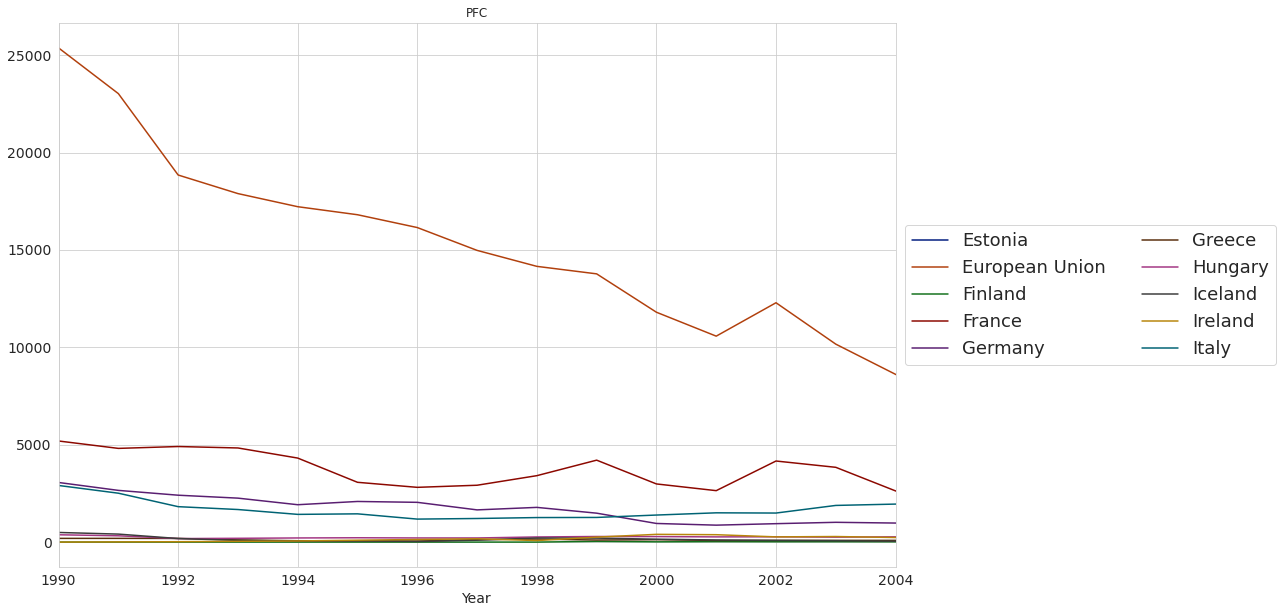

In [110]:
gas_accord_country1(gases[8],countries_name[10:20])

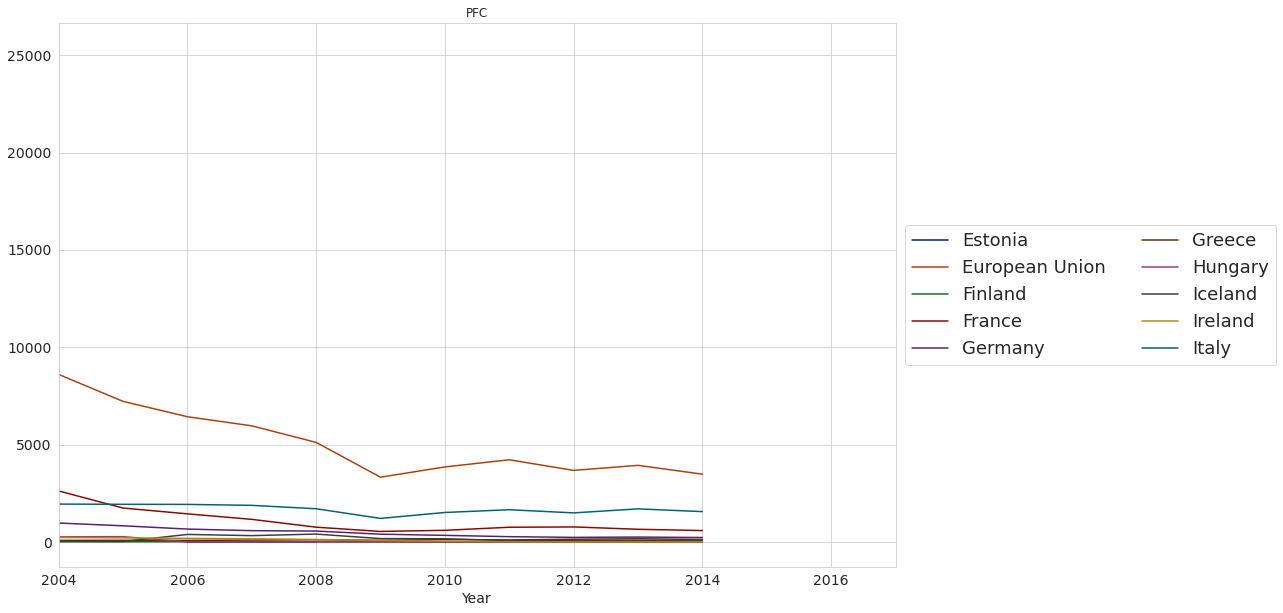

In [111]:
gas_accord_country2(gases[8],countries_name[10:20])

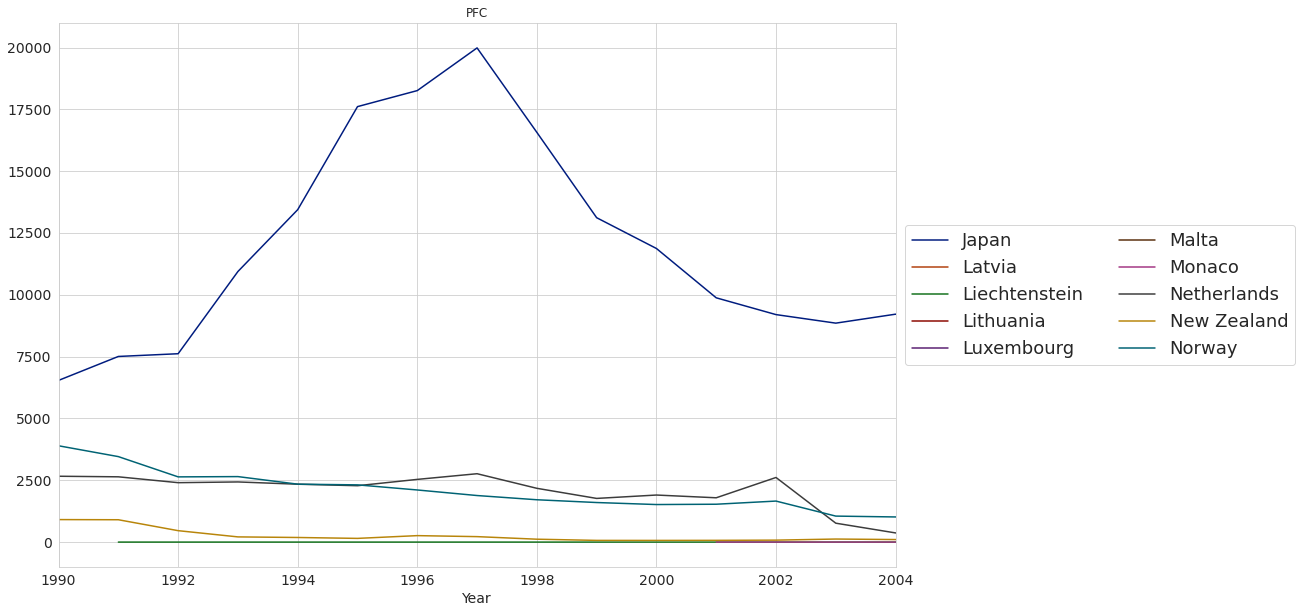

In [112]:
gas_accord_country1(gases[8],countries_name[20:30])

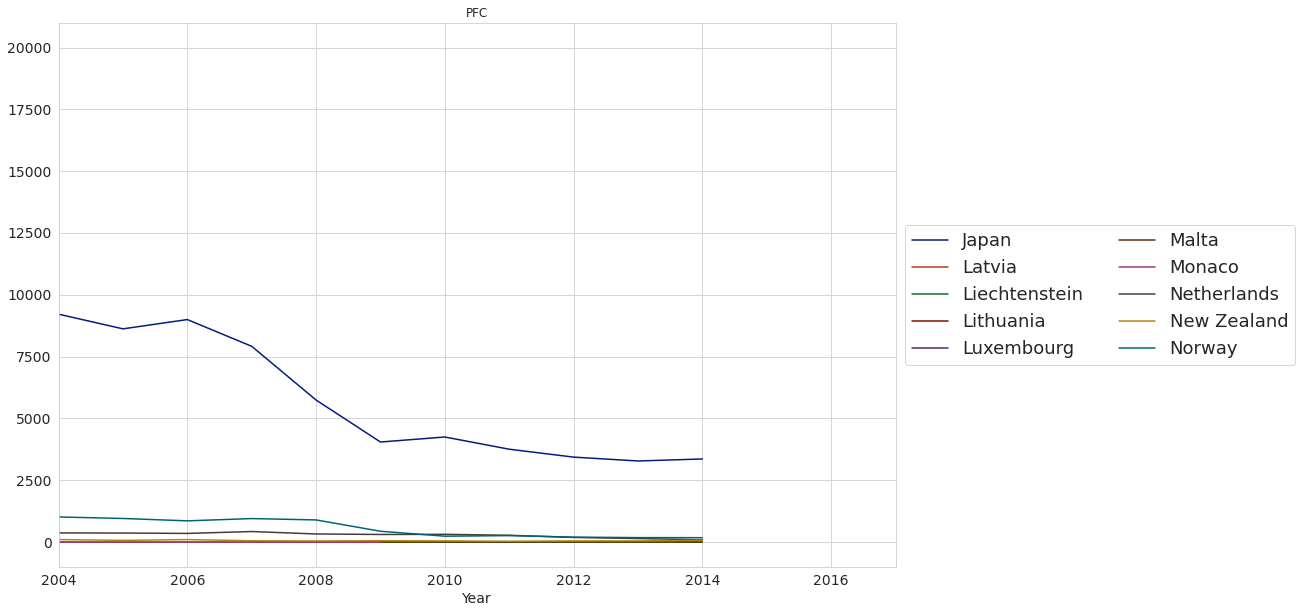

In [113]:
gas_accord_country2(gases[8],countries_name[20:30])

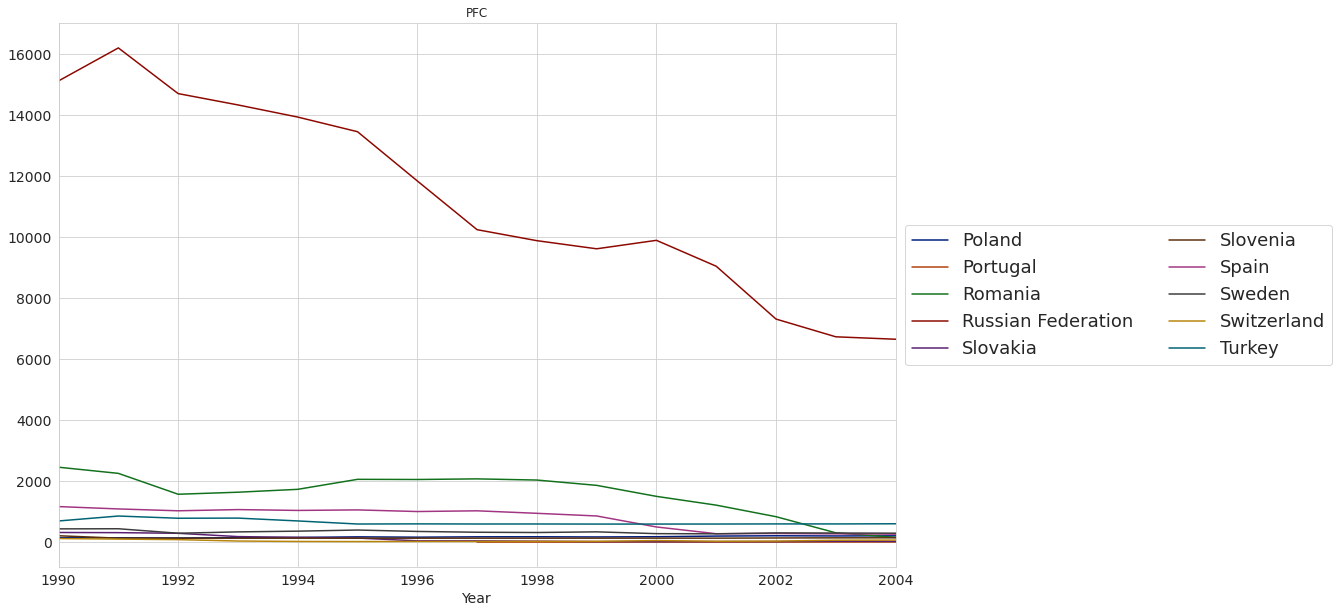

In [114]:
gas_accord_country1(gases[8],countries_name[30:40])

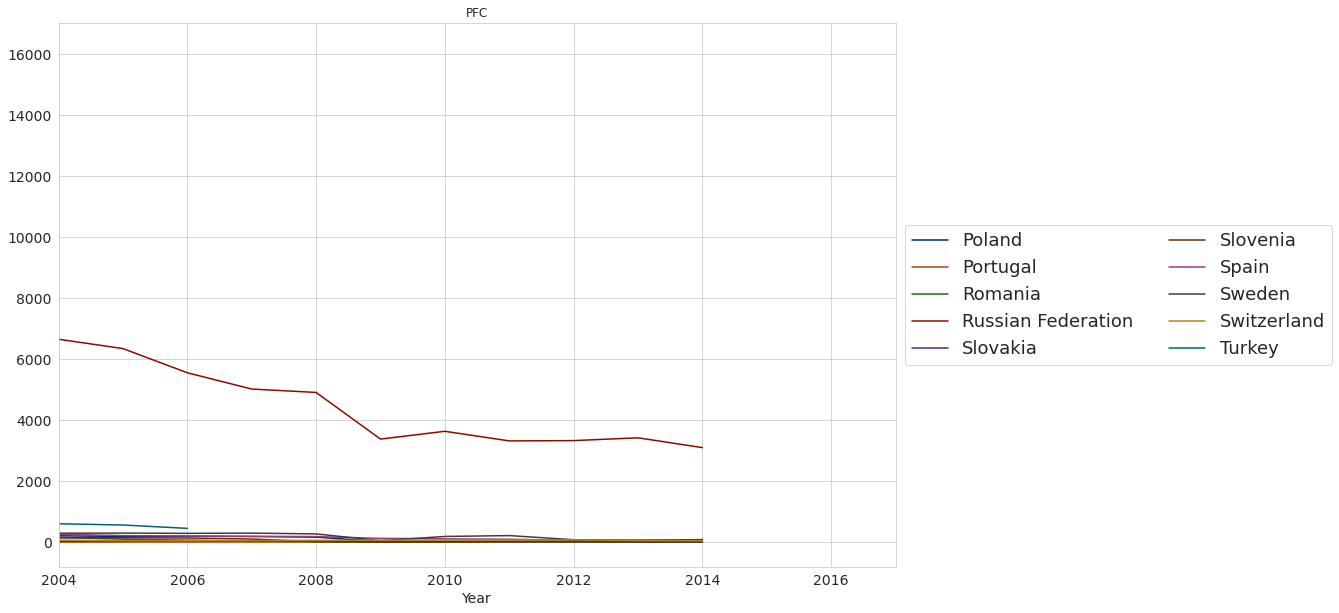

In [115]:
gas_accord_country2(gases[8],countries_name[30:40])

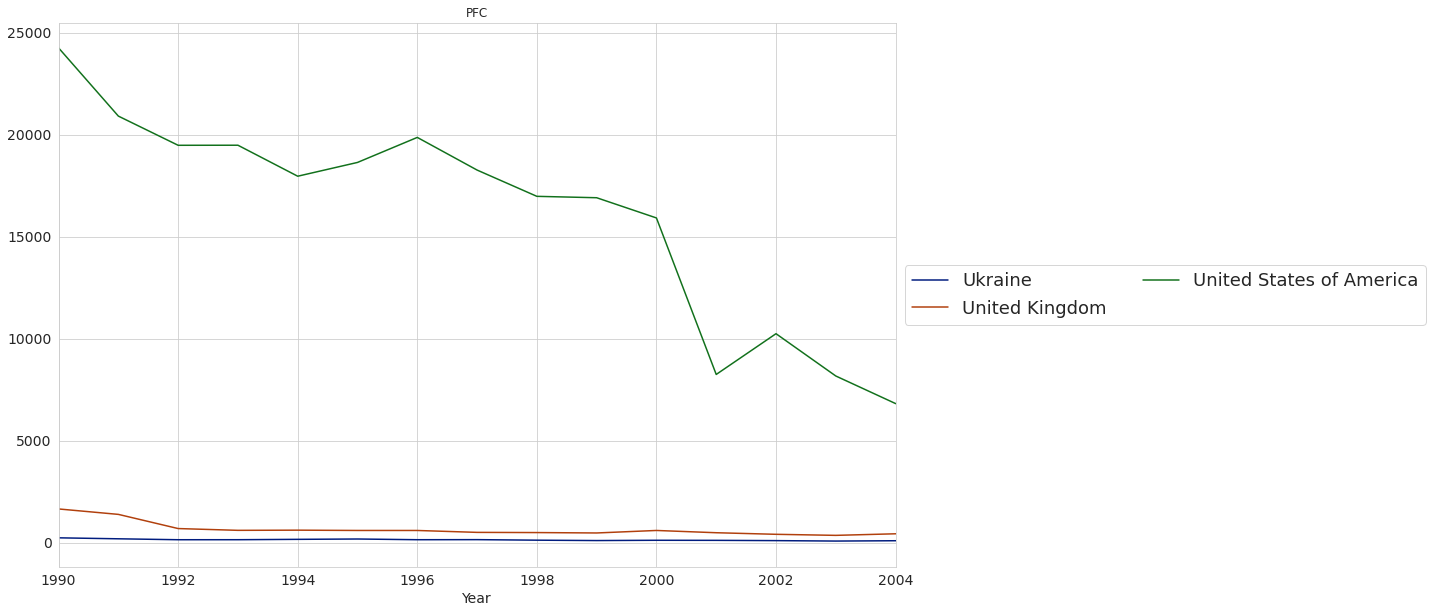

In [116]:
gas_accord_country1(gases[8],countries_name[40:43])

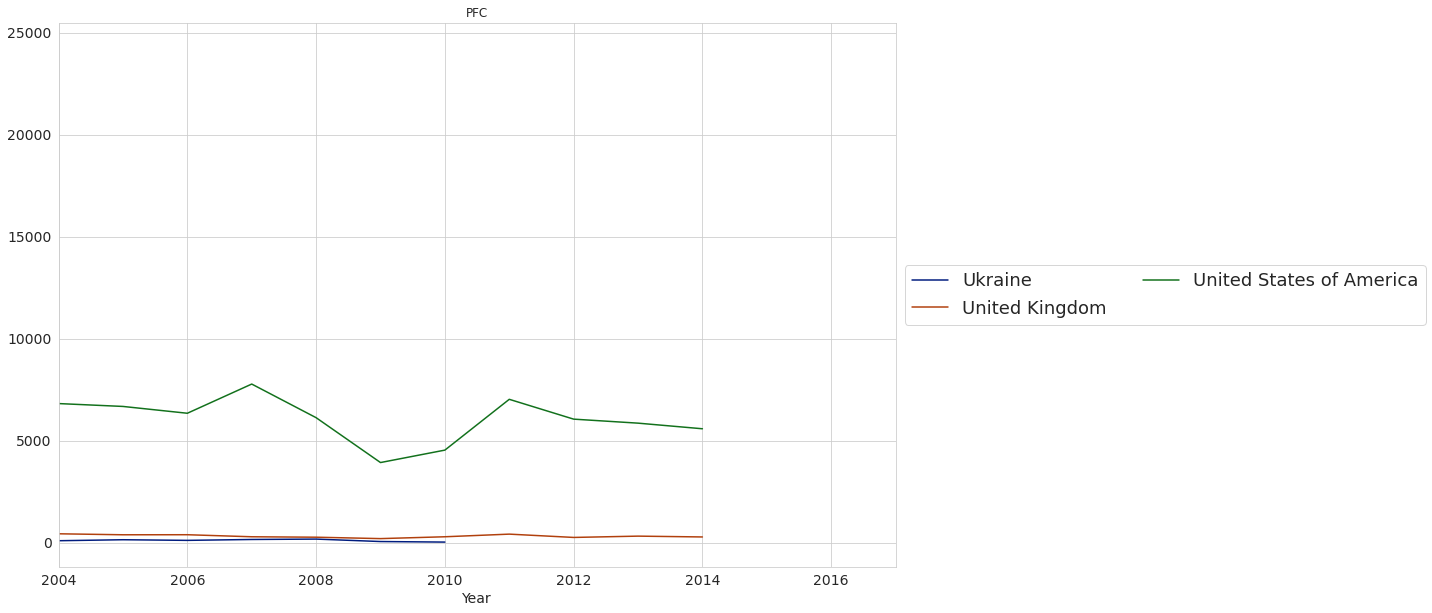

In [117]:
gas_accord_country2(gases[8],countries_name[40:43])

### Analysing the NF3 column

In [118]:
cleaned_data[cleaned_data["NF3"].isnull()==False]

category                                 CH4           CO2           GHG  \
country_or_area          year                                              
Austria                  1994  9775.857792    6.118910e+04  7.650349e+04   
                         1995  9674.049590    6.420216e+04  7.981303e+04   
                         1996  9382.925634    6.766726e+04  8.300881e+04   
                         1997  9011.517063    6.745589e+04  8.247439e+04   
                         1998  8831.331453    6.704725e+04  8.177084e+04   
...                                    ...             ...           ...   
United States of America 2010  722410.566142  5.688756e+06  6.985457e+06   
                         2011  717423.690199  5.559508e+06  6.865398e+06   
                         2012  714401.172491  5.349221e+06  6.643011e+06   
                         2013  721475.055605  5.502551e+06  6.799979e+06   
                         2014  730828.659455  5.556007e+06  6.870446e+06   

category                                 HFC      HFC+PFC            N2O  \
country_or_area          year                                              
Austria                  1994  261.105591    NaN           4279.530976     
                         1995  357.931520    NaN           4388.997183     
                         1996  420.786113    NaN           4272.752250     
                         1997  500.828387    NaN           4286.758693     
                         1998  610.339232    NaN           4347.074091     
...                                   ...     ..                   ...     
United States of America 2010  141633.797817  7762.137206  410314.239468   
                         2011  146080.595743  8178.469763  416521.779163   
                         2012  147249.750868  8584.424258  409285.583752   
                         2013  149922.393769  8993.807245  403349.746652   
                         2014  157237.344889  9449.891683  403501.457115   

category                              NF3          PFC          SF6  
country_or_area          year                                        
Austria                  1994  0.758520    70.956369    926.173536   
                         1995  6.439680    83.349630    1100.107713  
                         1996  7.925760    80.254170    1176.899675  
                         1997  15.526440   117.471744   1086.396974  
                         1998  9.430604    55.531143    869.882367   
...                                  ...          ...           ...  
United States of America 2010  562.170248  4536.224066  9481.913470  
                         2011  668.931661  7026.626659  9990.145376  
                         2012  631.990312  6054.952494  7581.757048  
                         2013  600.342163  5858.174564  7229.068816  
                         2014  490.436085  5582.941730  7348.782775  

[248 rows x 9 columns]

Only **248** rows are having a **not Null** value in **NF3** column, which depicts the unavailability of the data, hecne we are going to create another dataframe object that has not Null data in NF3 column and we will use that for the analysis purpose.

In [119]:
nf3_data = cleaned_data[cleaned_data["NF3"].isnull()==False].reset_index()

In [120]:
nf3_data.groupby("country_or_area").count()

category                  year  CH4  CO2  GHG  HFC  HFC+PFC  N2O  NF3  PFC  \
country_or_area                                                              
Austria                   21    21   21   21   21   0        21   21   21    
Belgium                   7     7    7    7    7    0        7    7    7     
Canada                    25    25   25   25   23   0        25   25   25    
Czech Republic            3     3    3    3    3    0        3    3    3     
European Union            25    25   25   25   25   25       25   25   25    
France                    25    25   25   25   25   0        25   25   25    
Germany                   25    25   25   25   25   25       25   25   25    
Ireland                   16    16   16   16   16   0        16   16   16    
Italy                     17    17   17   17   17   0        17   17   17    
Japan                     25    25   25   25   25   0        25   25   25    
Lithuania                 2     2    2    2    2    0        2    2    0     
Switzerland               7     7    7    7    7    0        7    7    7     
United Kingdom            25    25   25   25   25   0        25   25   25    
United States of America  25    25   25   25   25   25       25   25   25    

category                  SF6  
country_or_area                
Austria                   21   
Belgium                   7    
Canada                    25   
Czech Republic            3    
European Union            25   
France                    25   
Germany                   25   
Ireland                   16   
Italy                     17   
Japan                     25   
Lithuania                 2    
Switzerland               7    
United Kingdom            25   
United States of America  25

In [121]:
nf3_countries = nf3_data.groupby("country_or_area").count().index

In [122]:
nf3_countries

Index(['Austria', 'Belgium', 'Canada', 'Czech Republic', 'European Union',
       'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Lithuania',
       'Switzerland', 'United Kingdom', 'United States of America'],
      dtype='object', name='country_or_area')

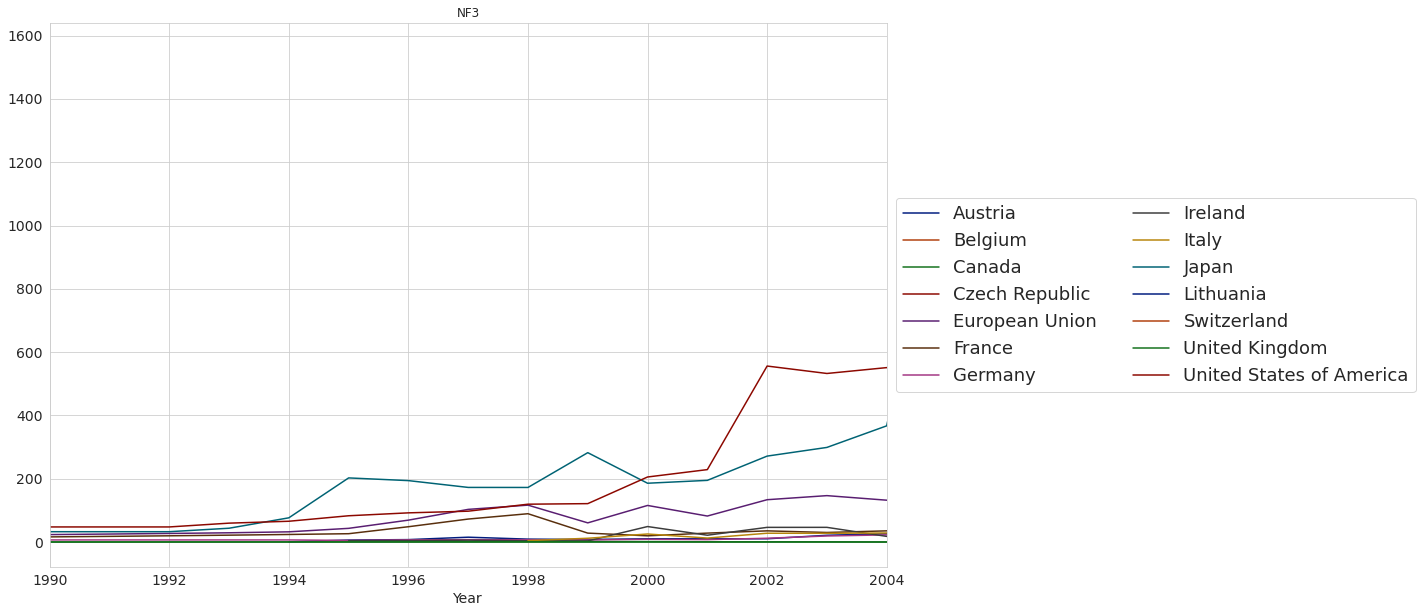

In [123]:
gas_accord_country1(gases[7],nf3_countries)

### Analysing the SF6 column 

In [124]:
len(cleaned_data[cleaned_data["SF6"].isnull()==True])

42

As we can see only a small chunk of data has Null value in the SF6 column, we can safely plot the data and analyse it.

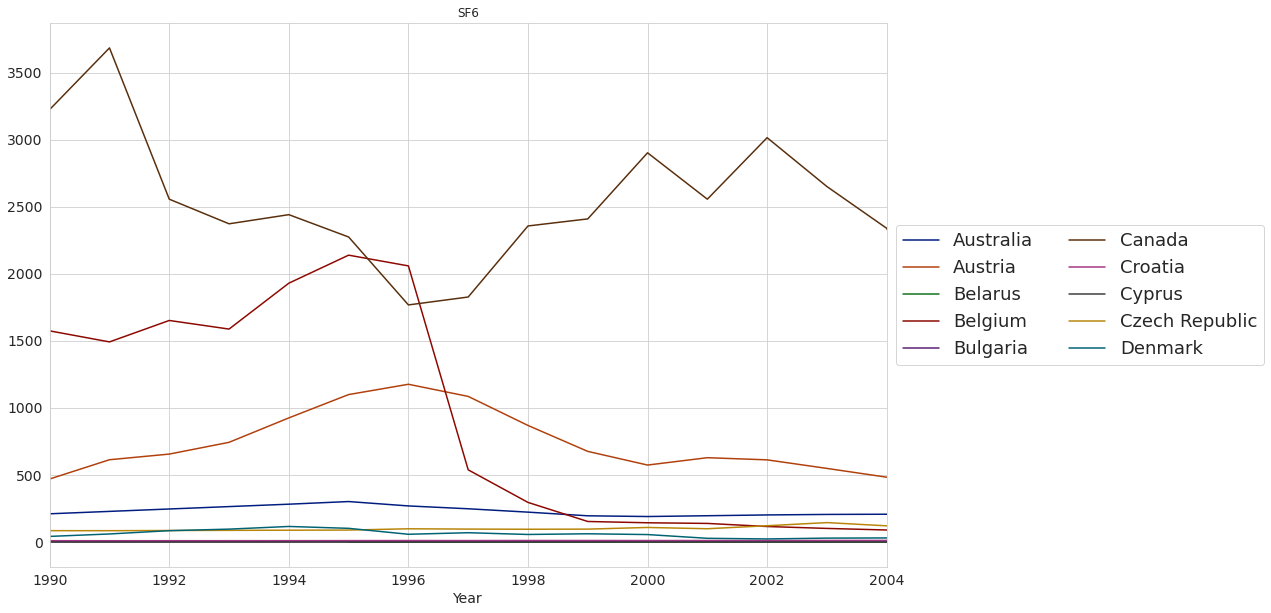

In [125]:
gas_accord_country1(gases[9],countries_name[:10])

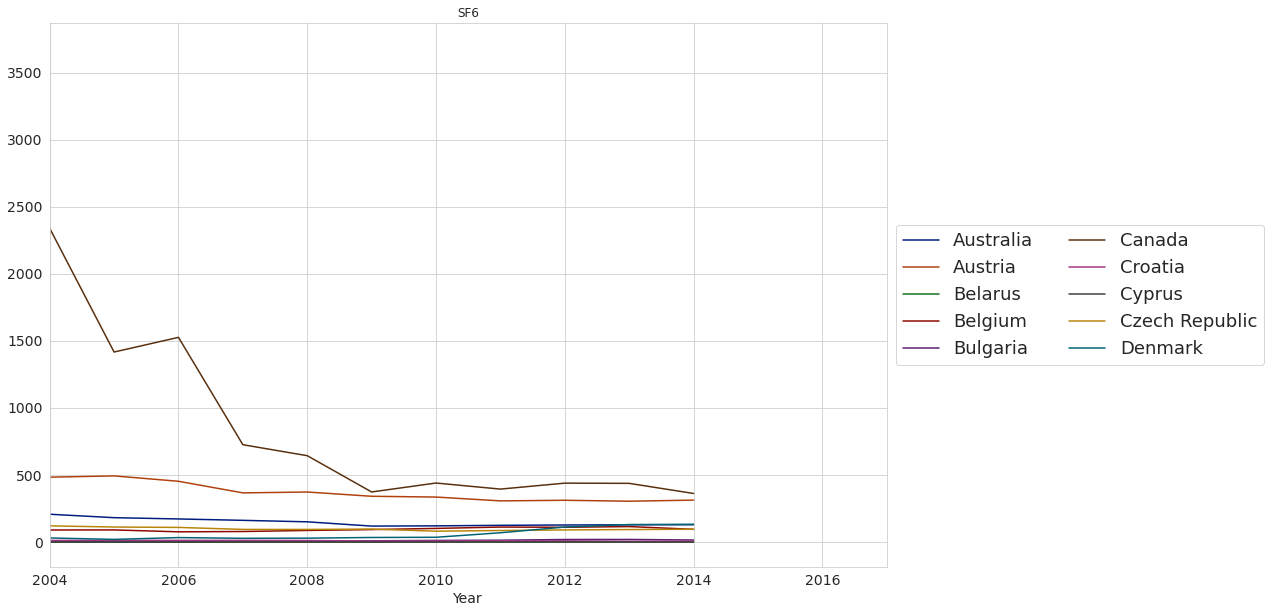

In [126]:
gas_accord_country2(gases[9],countries_name[:10])

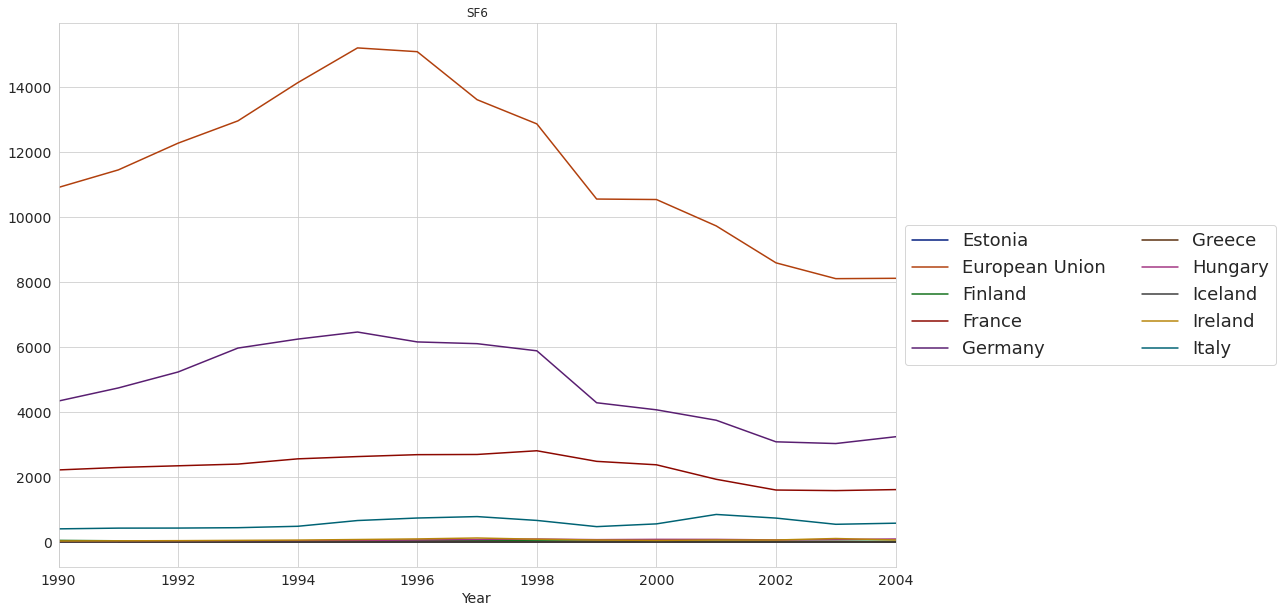

In [127]:
gas_accord_country1(gases[9],countries_name[10:20])

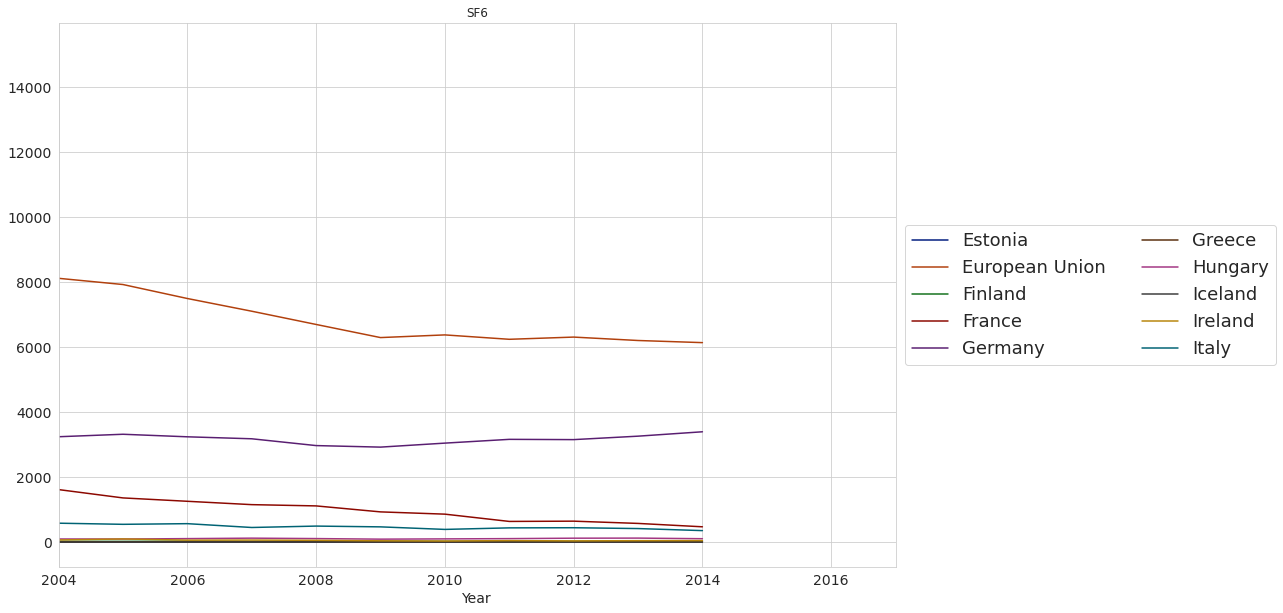

In [128]:
gas_accord_country2(gases[9],countries_name[10:20])

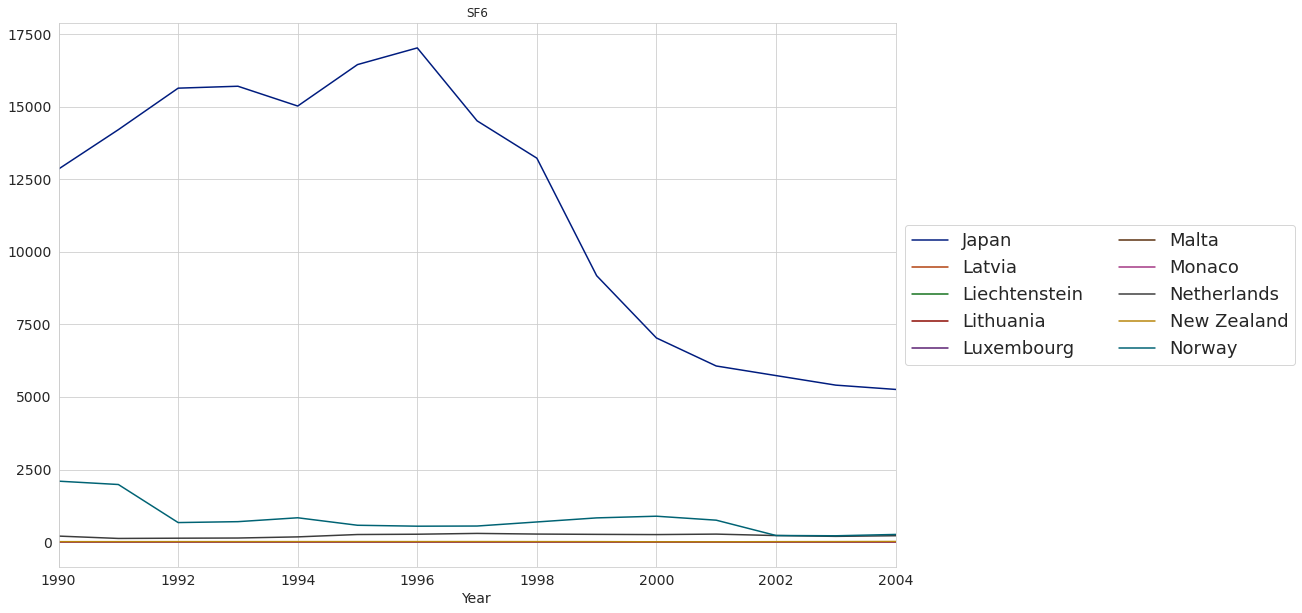

In [129]:
gas_accord_country1(gases[9],countries_name[20:30])

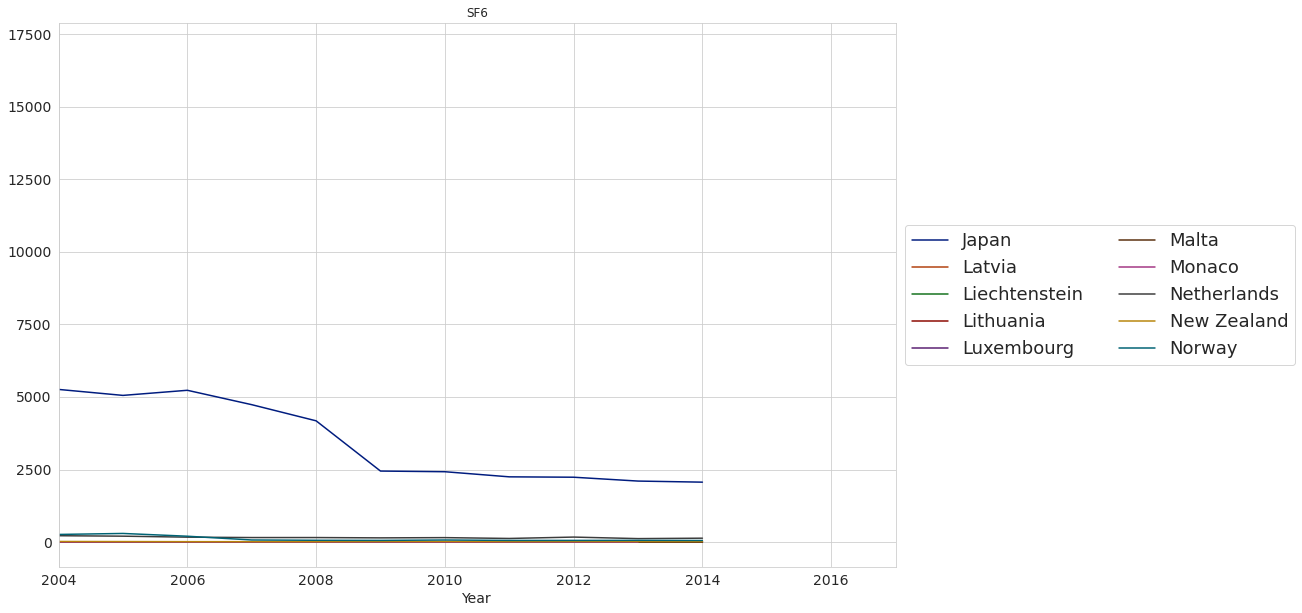

In [130]:
gas_accord_country2(gases[9],countries_name[20:30])

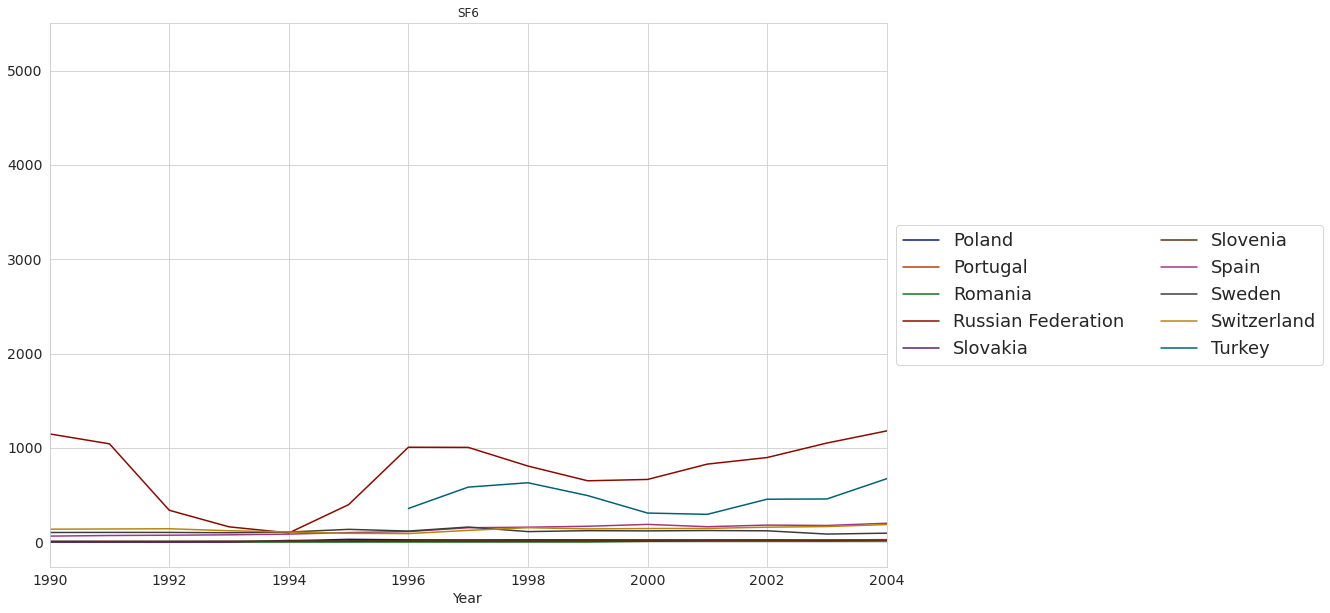

In [131]:
gas_accord_country1(gases[9],countries_name[30:40])

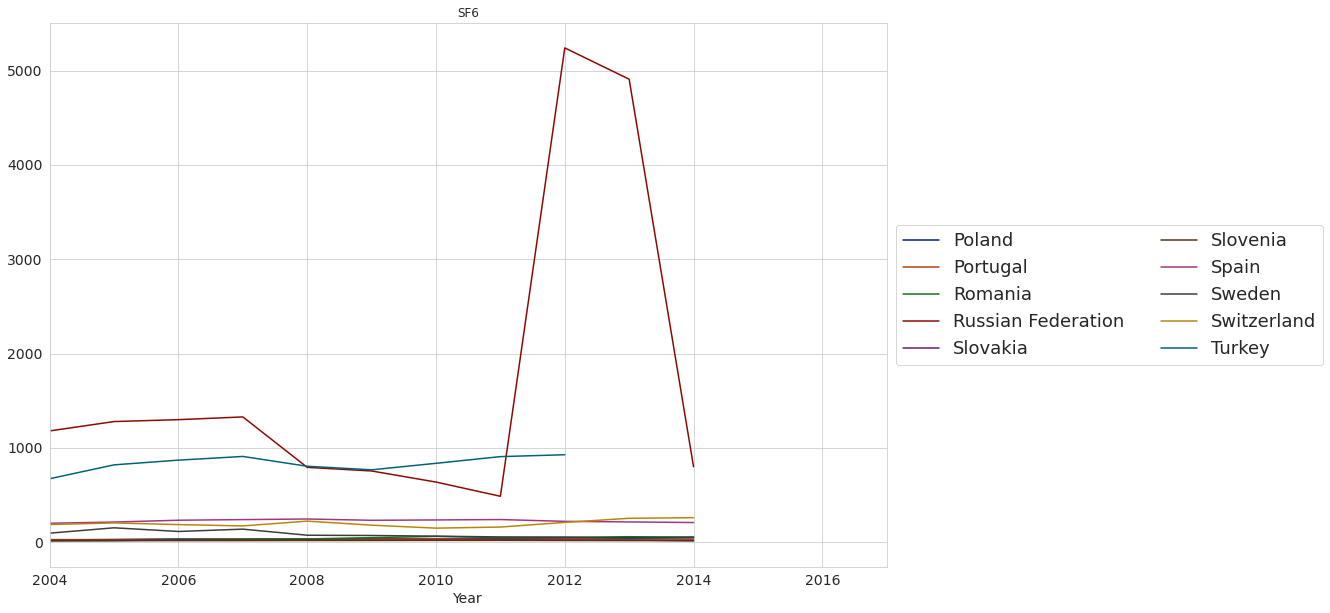

In [132]:
gas_accord_country2(gases[9],countries_name[30:40])

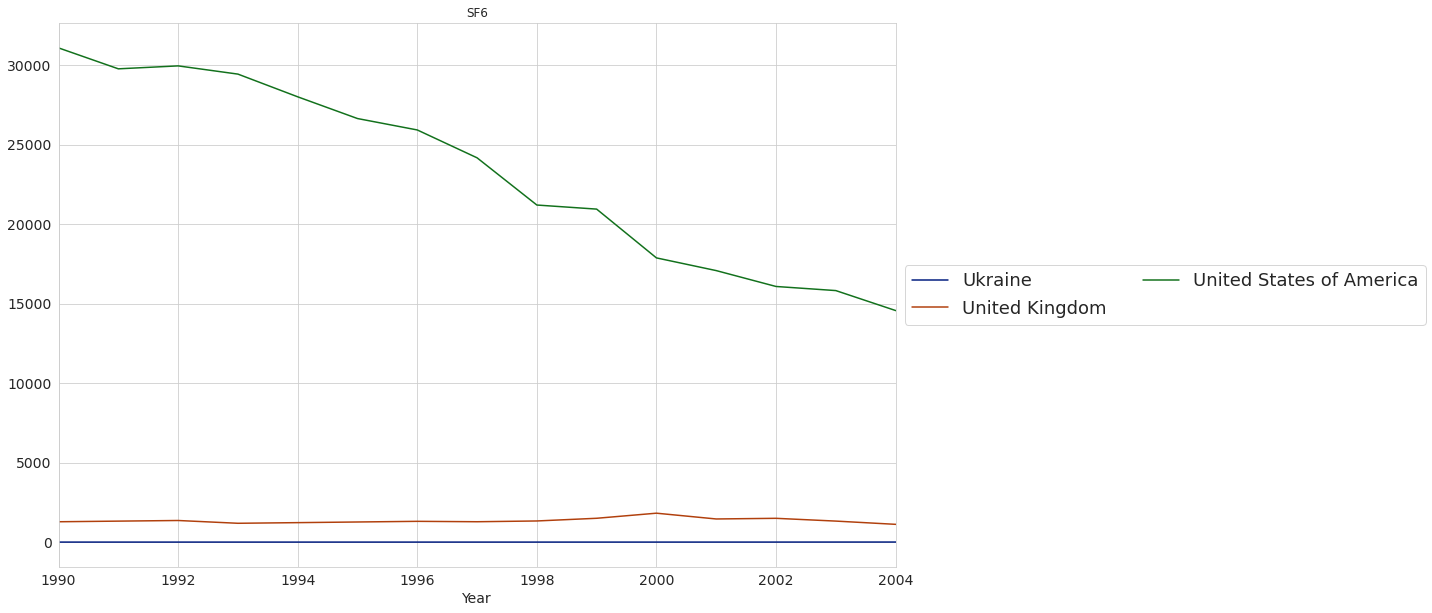

In [133]:
gas_accord_country1(gases[9],countries_name[40:])

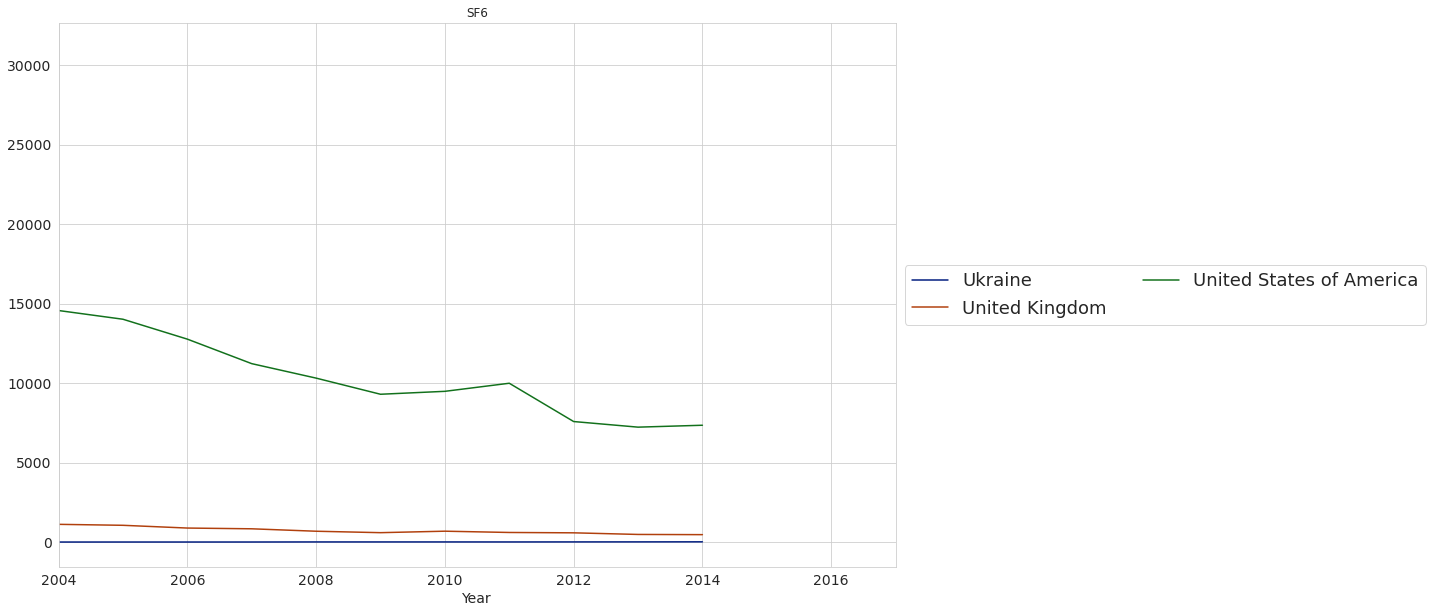

In [134]:
gas_accord_country2(gases[9],countries_name[40:])

### Analysing the N2O Column

In [135]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [136]:
len(cleaned_data[cleaned_data["N2O"].isnull()==True])

0

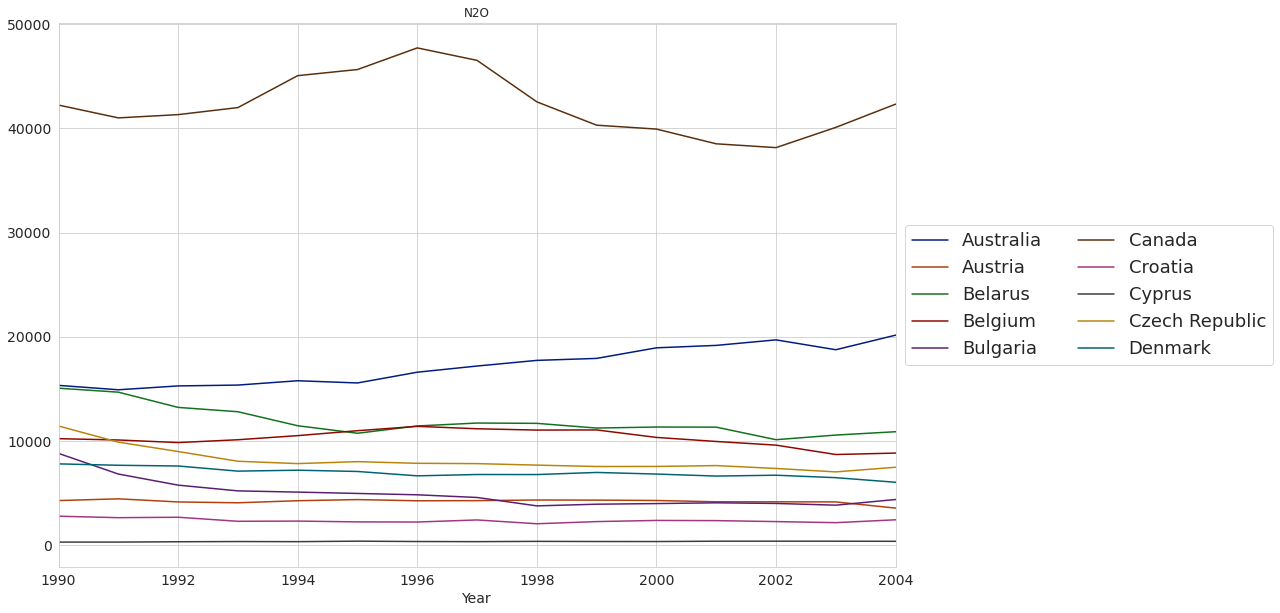

In [137]:
gas_accord_country1(gases[6],countries_name[:10])

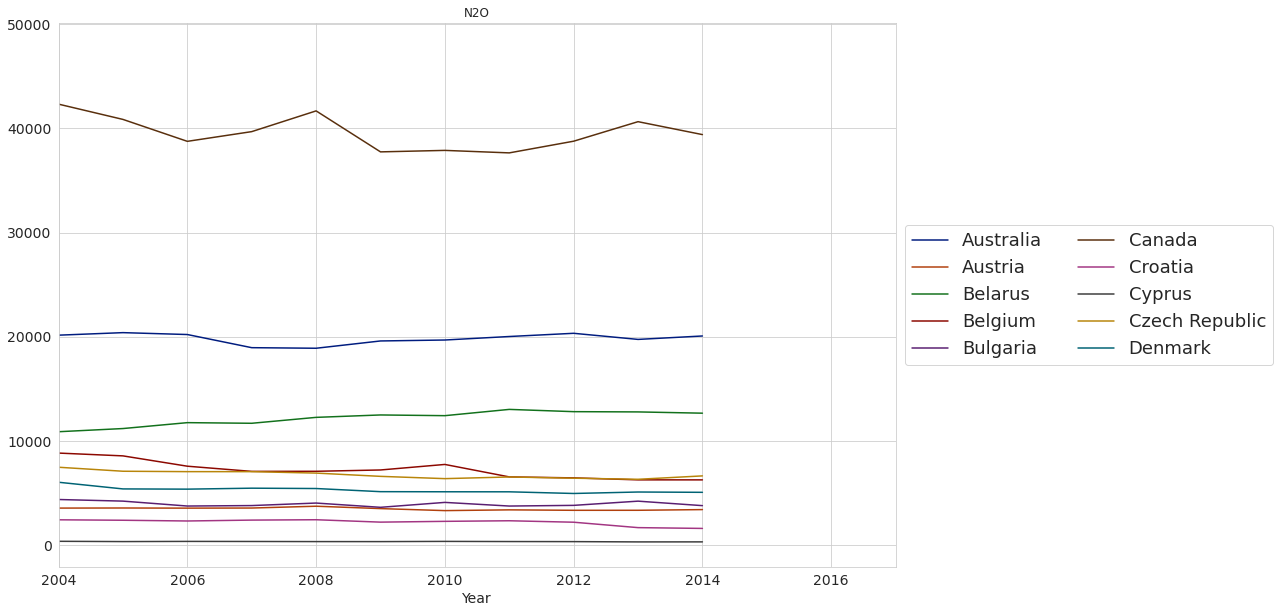

In [138]:
gas_accord_country2(gases[6],countries_name[:10])

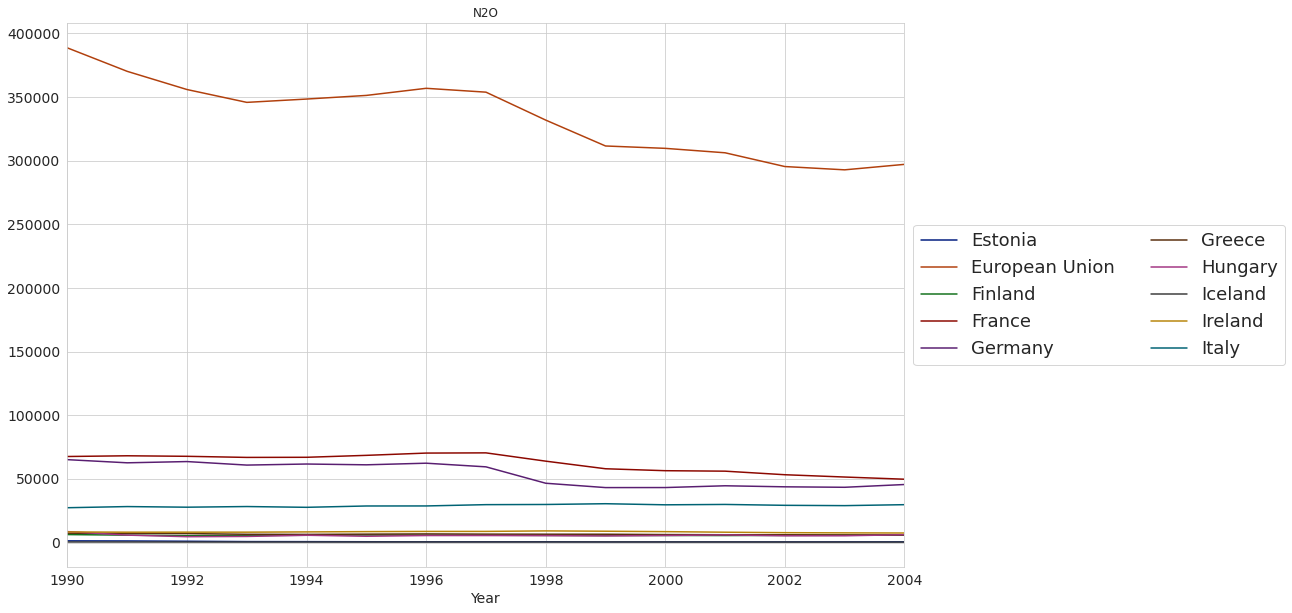

In [139]:
gas_accord_country1(gases[6],countries_name[10:20])

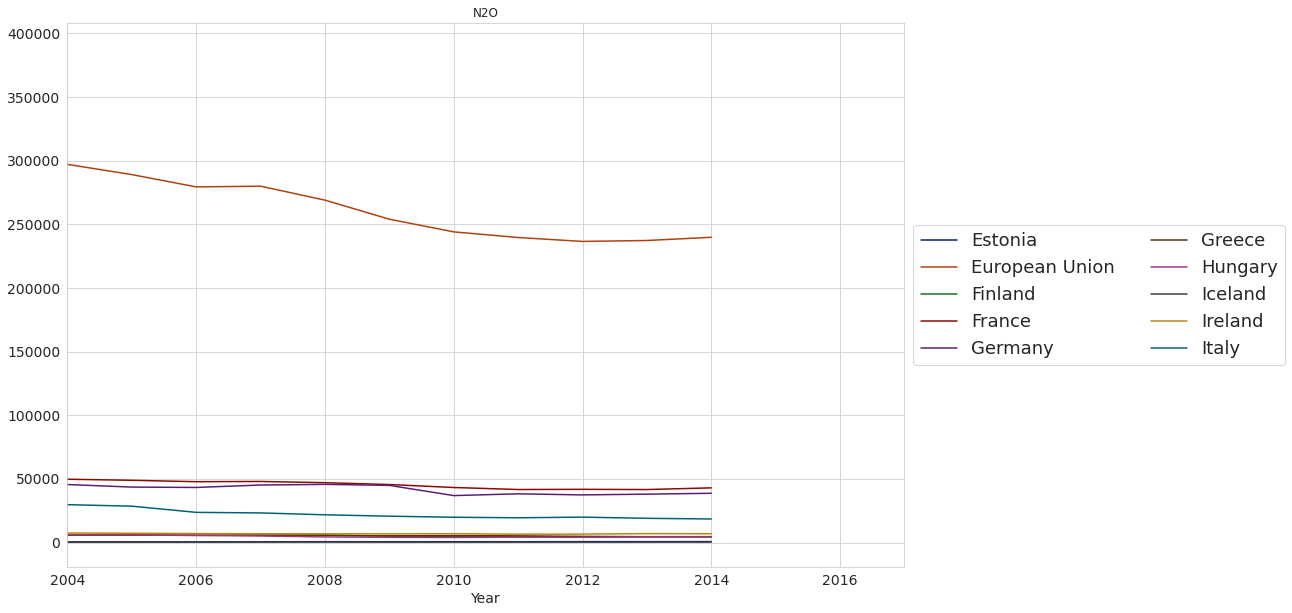

In [140]:
gas_accord_country2(gases[6],countries_name[10:20])

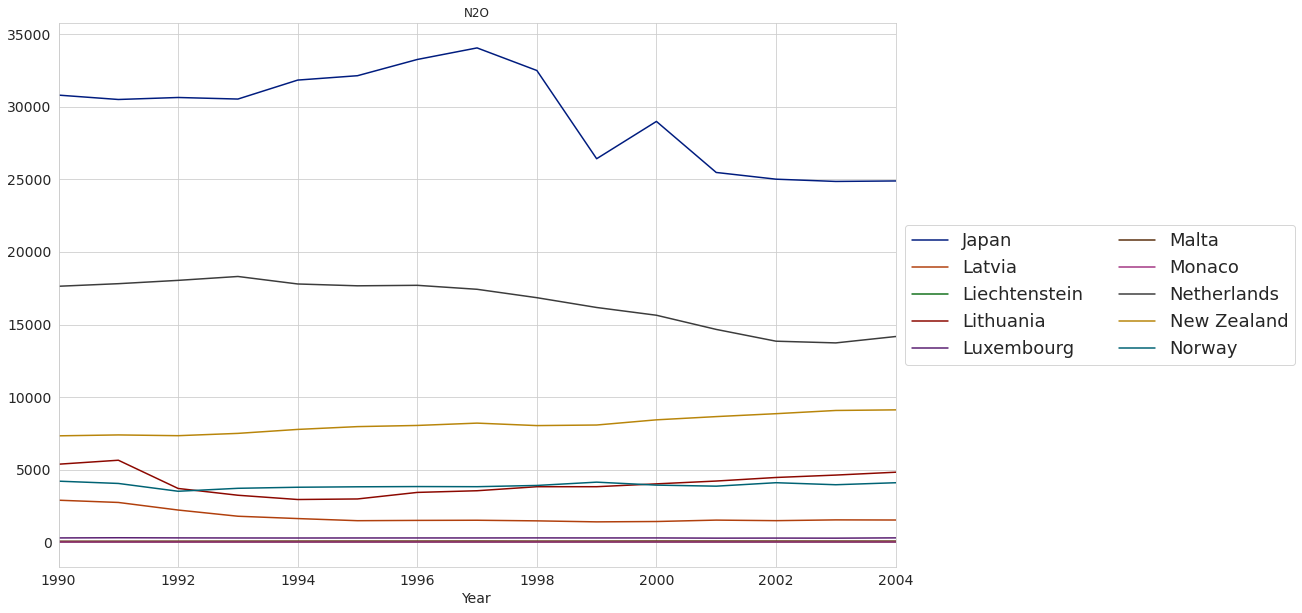

In [141]:
gas_accord_country1(gases[6],countries_name[20:30])

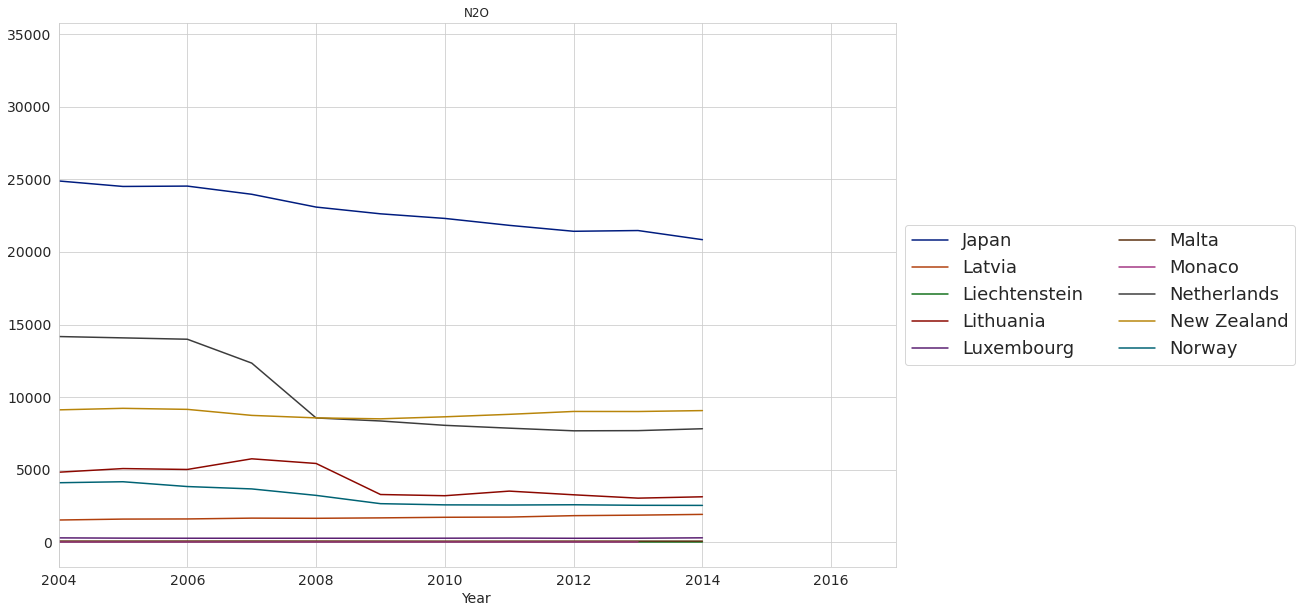

In [142]:
gas_accord_country2(gases[6],countries_name[20:30])

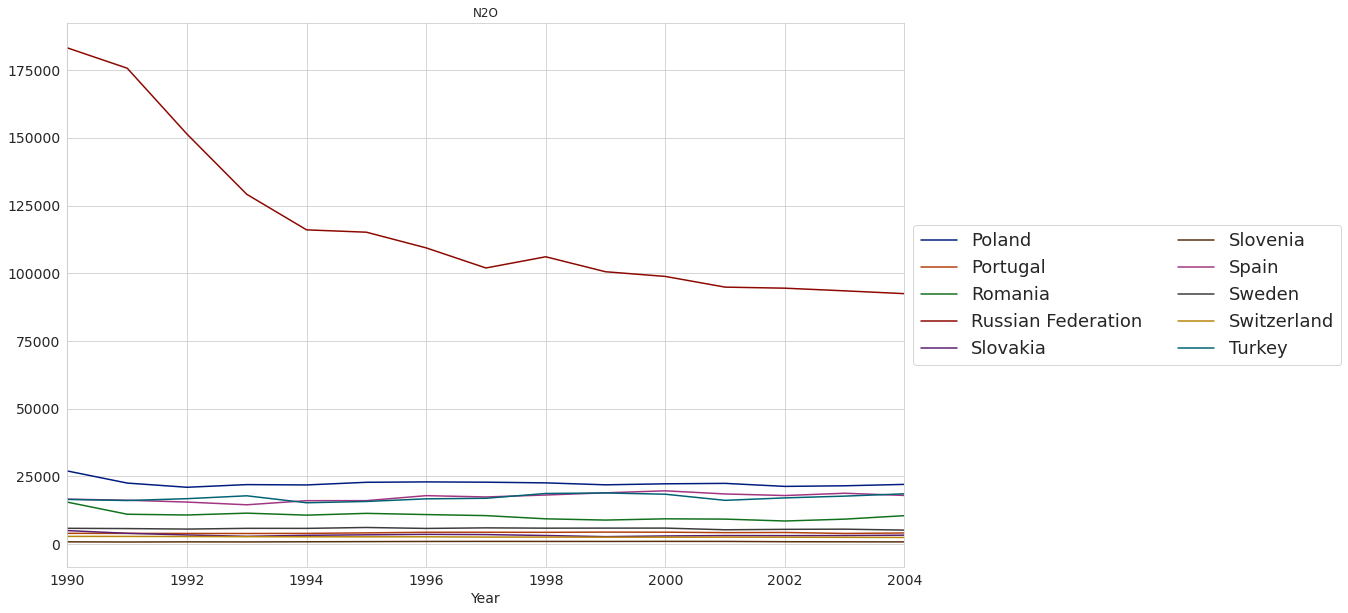

In [143]:
gas_accord_country1(gases[6],countries_name[30:40])

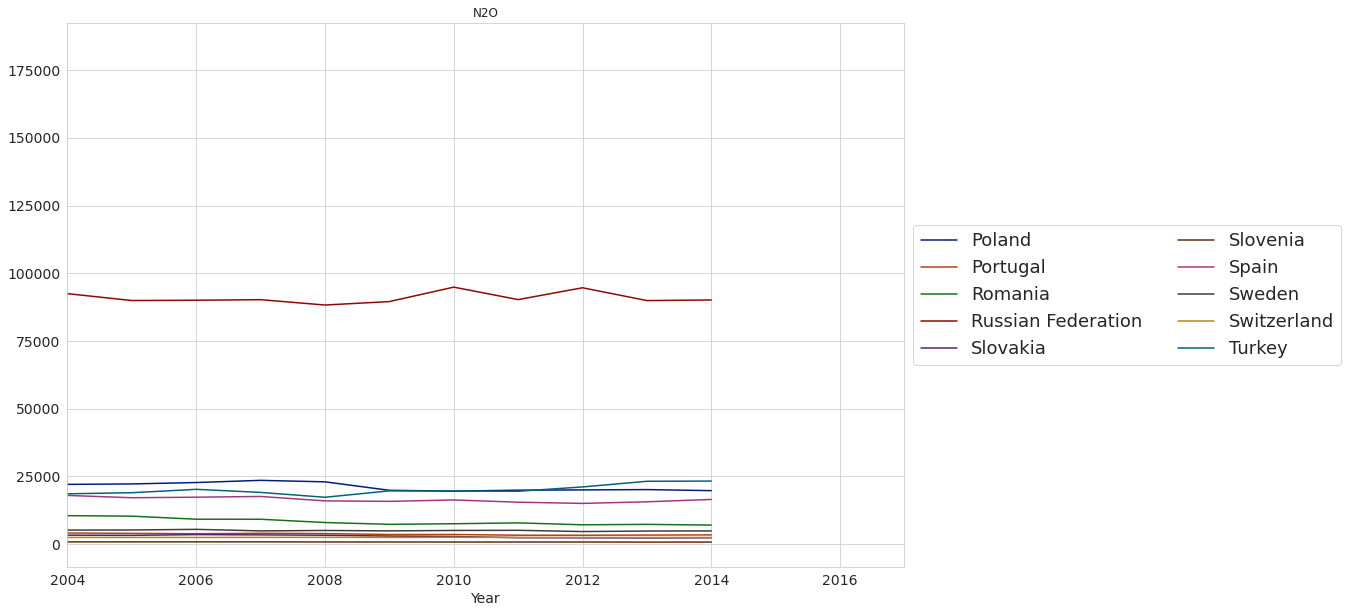

In [144]:
gas_accord_country2(gases[6],countries_name[30:40])

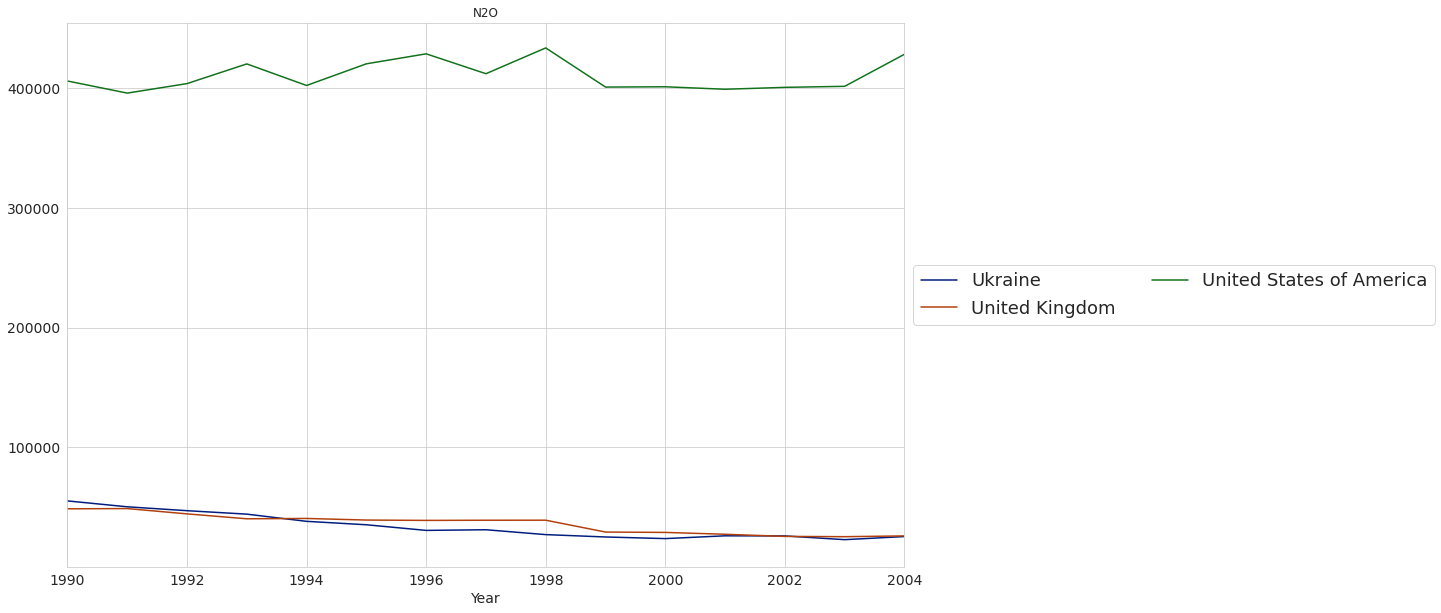

In [145]:
gas_accord_country1(gases[6],countries_name[40:43])

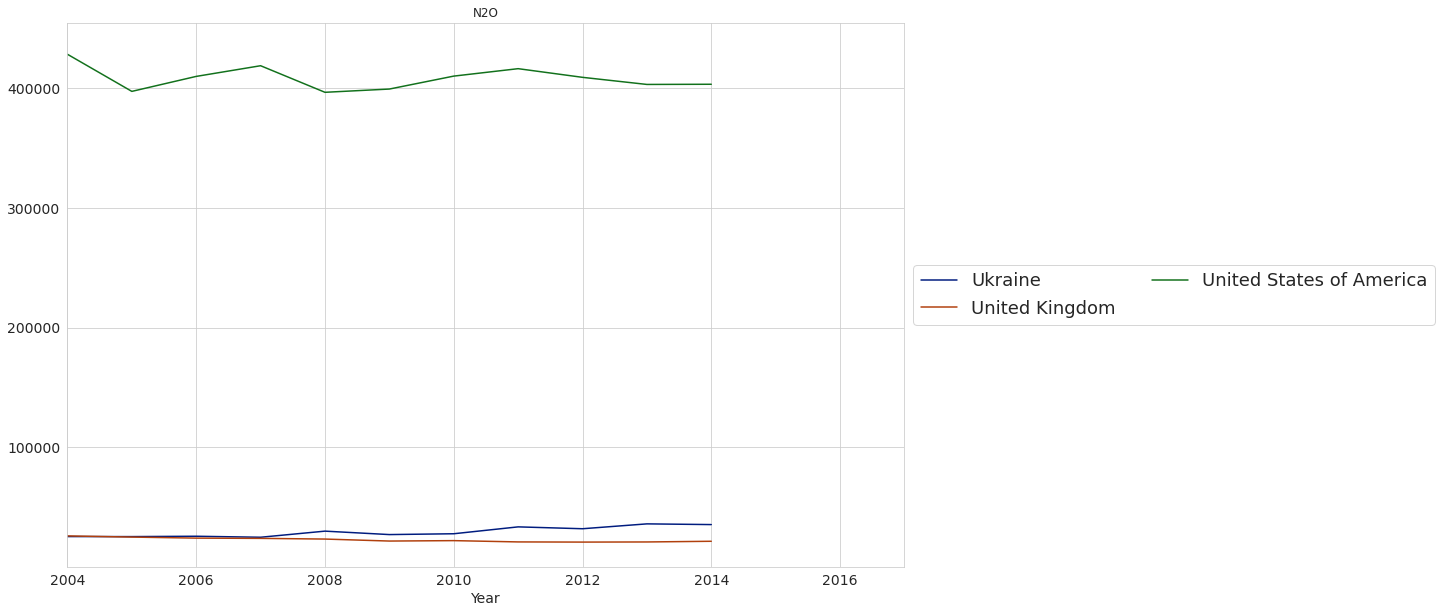

In [146]:
gas_accord_country2(gases[6],countries_name[40:50])

### Analysing CO2 and GHG emission

In [147]:
len(cleaned_data[cleaned_data["GHG"].isnull()==True])

0

In [148]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

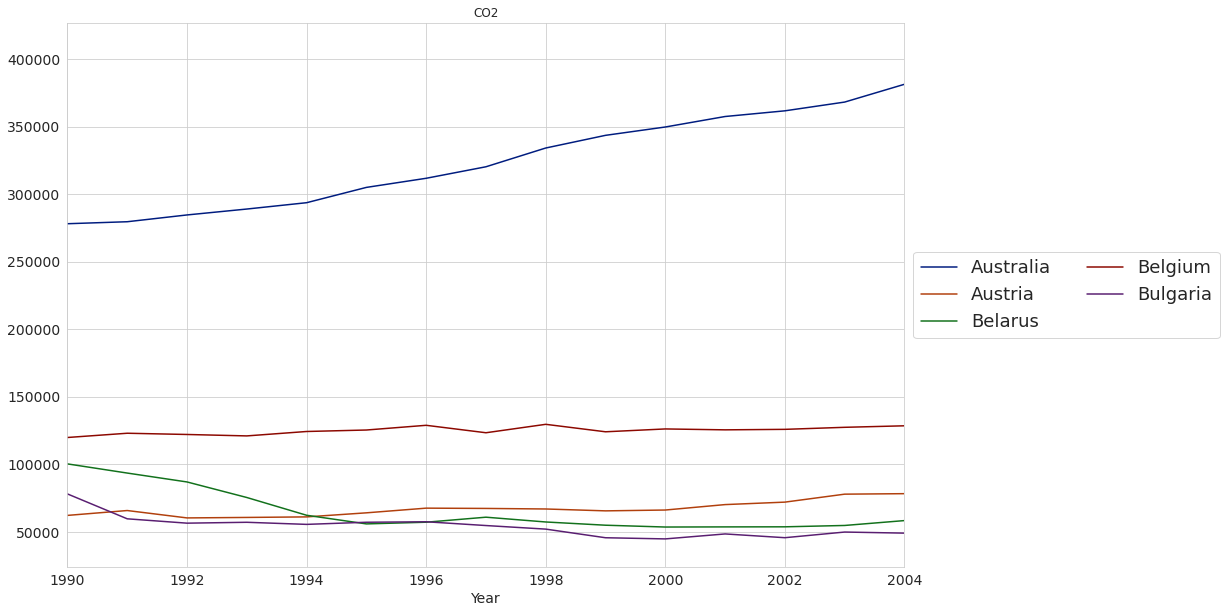

In [149]:
gas_accord_country1(gases[1],countries_name[:5])

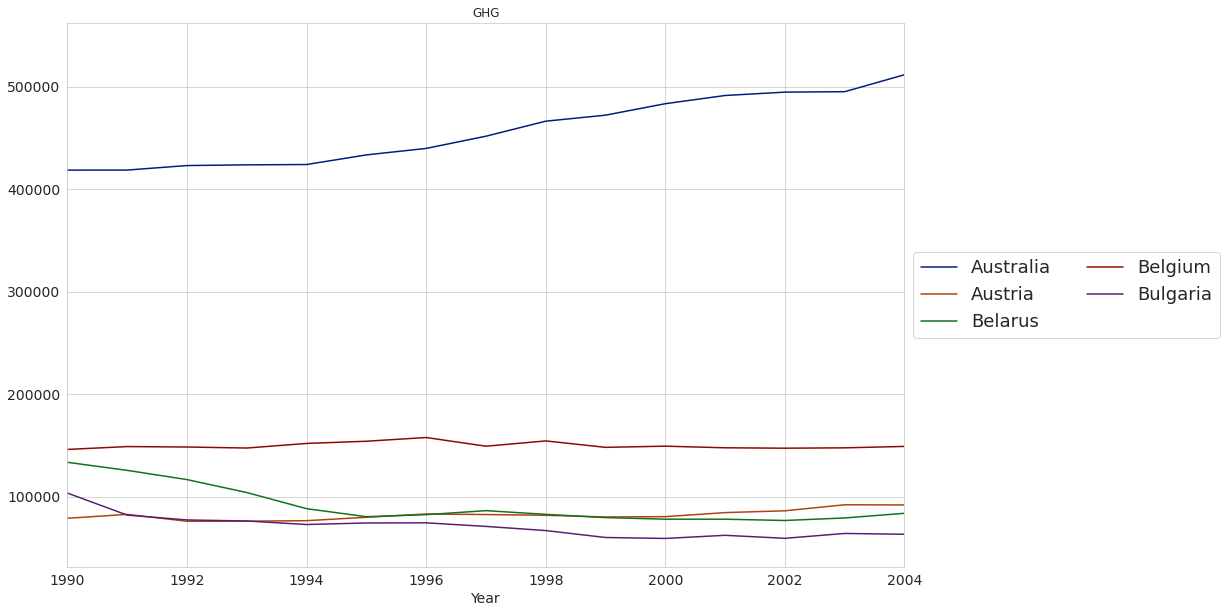

In [150]:
gas_accord_country1(gases[2],countries_name[:5])

In [151]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category                      HFC  HFC+PFC           N2O  NF3          PFC  \
country_or_area year                                                         
Australia       1990  1424.683520 NaN       15345.597858 NaN   4607.012919   
                1991  1424.683520 NaN       14923.405021 NaN   4610.743294   
                1992  1333.184000 NaN       15293.183355 NaN   4603.282544   
                1993  1829.872000 NaN       15374.993428 NaN   3315.528376   
                1994  1027.343549 NaN       15790.426852 NaN   2164.428749   

category                     SF6  
country_or_area year              
Australia       1990  211.018511  
                1991  228.944834  
                1992  246.858849  
                1993  264.759156  
                1994  282.640896

In [152]:
cleaned_data["difference"] = cleaned_data["GHG"] - cleaned_data["CO2"]

In [153]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category                      HFC  HFC+PFC           N2O  NF3          PFC  \
country_or_area year                                                         
Australia       1990  1424.683520 NaN       15345.597858 NaN   4607.012919   
                1991  1424.683520 NaN       14923.405021 NaN   4610.743294   
                1992  1333.184000 NaN       15293.183355 NaN   4603.282544   
                1993  1829.872000 NaN       15374.993428 NaN   3315.528376   
                1994  1027.343549 NaN       15790.426852 NaN   2164.428749   

category                     SF6     difference  
country_or_area year                             
Australia       1990  211.018511  140357.150622  
                1991  228.944834  138932.418482  
                1992  246.858849  138314.015473  
                1993  264.759156  134622.664883  
                1994  282.640896  130262.250231

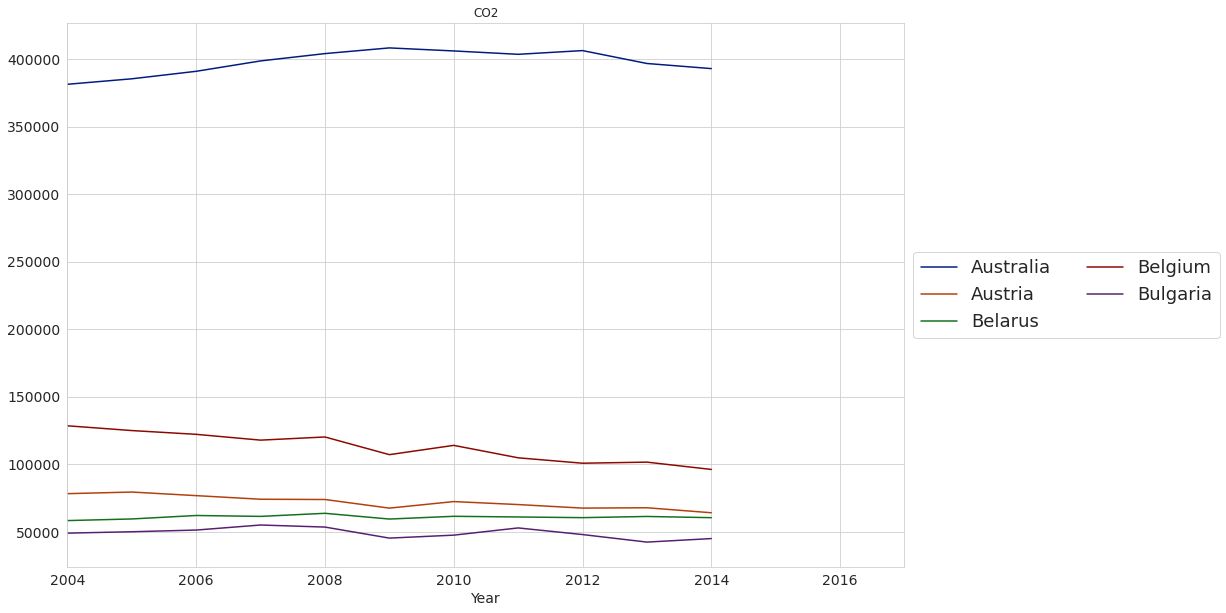

In [154]:
gas_accord_country2(gases[1],countries_name[:5])

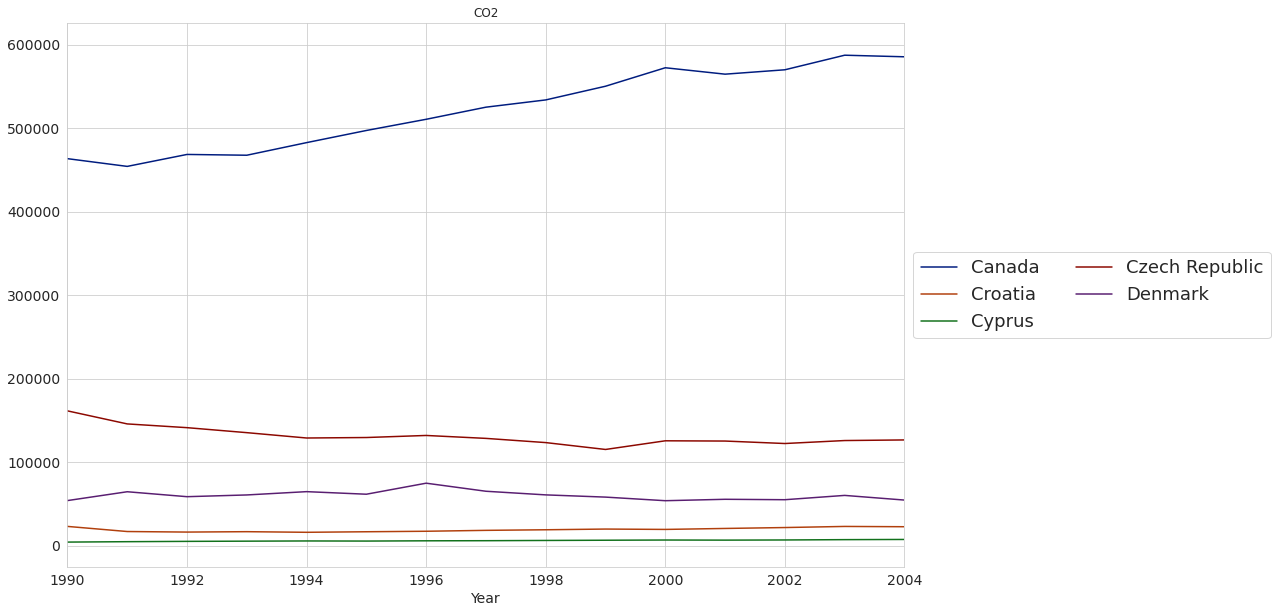

In [155]:
gas_accord_country1(gases[1],countries_name[5:10])

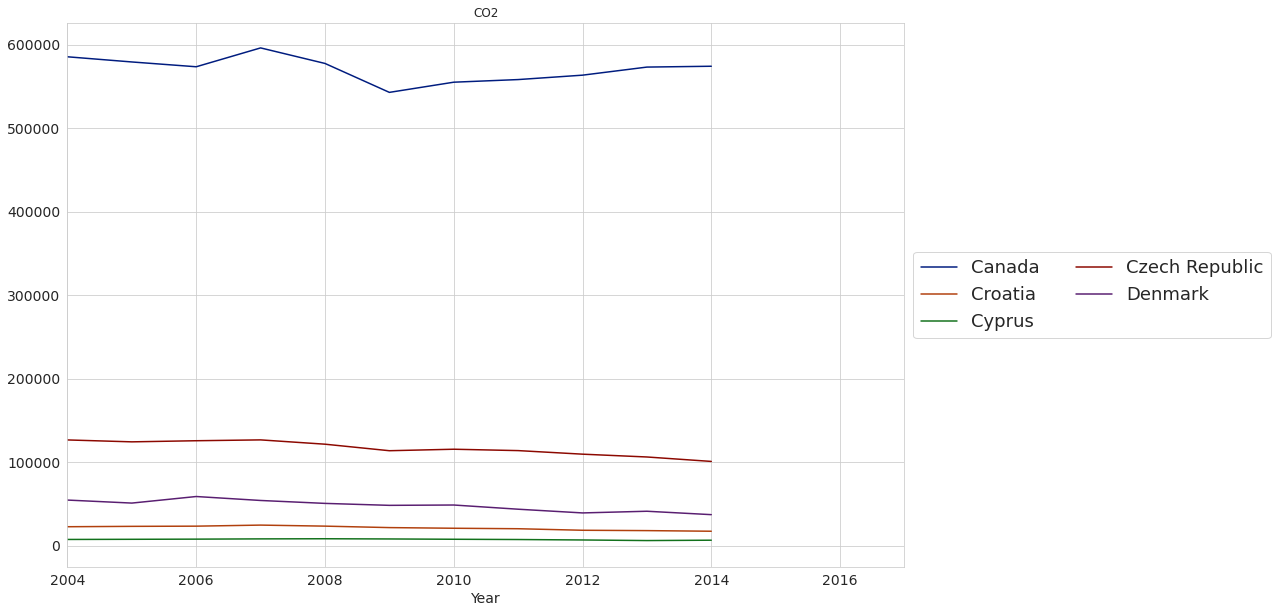

In [156]:
gas_accord_country2(gases[1],countries_name[5:10])

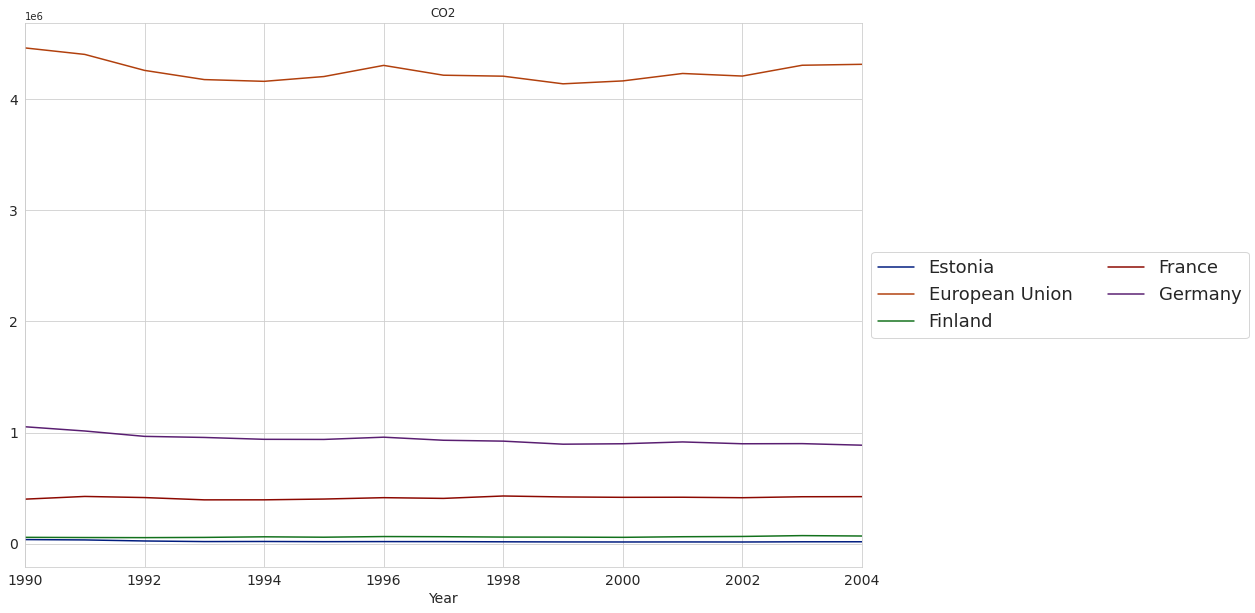

In [157]:
gas_accord_country1(gases[1],countries_name[10:15])

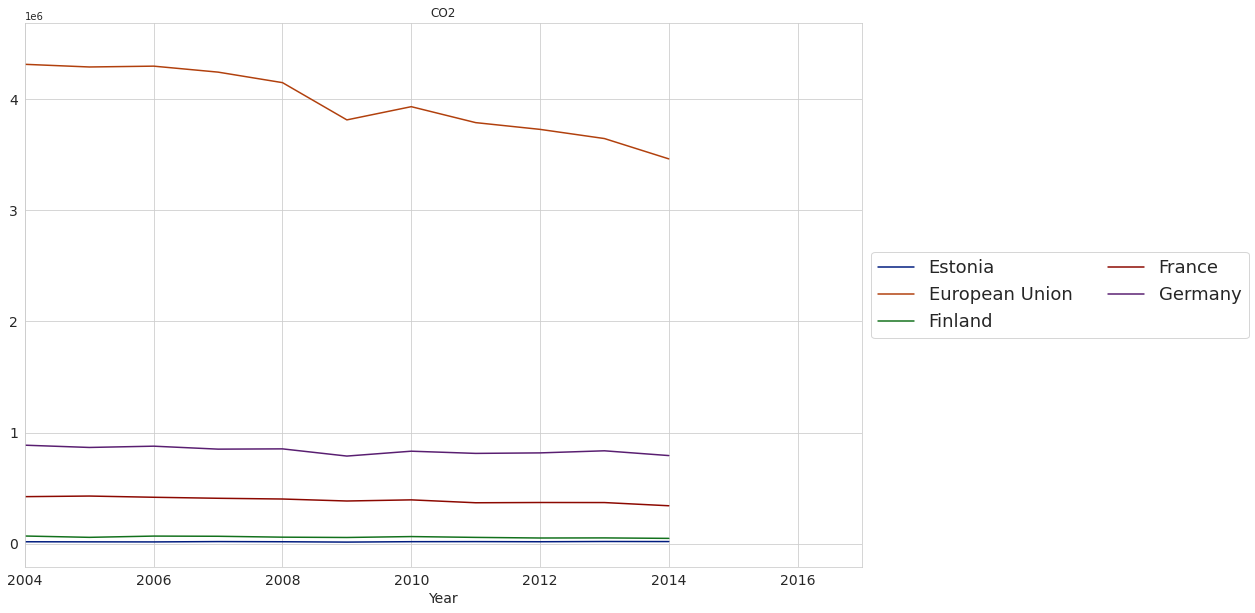

In [158]:
gas_accord_country2(gases[1],countries_name[10:15])

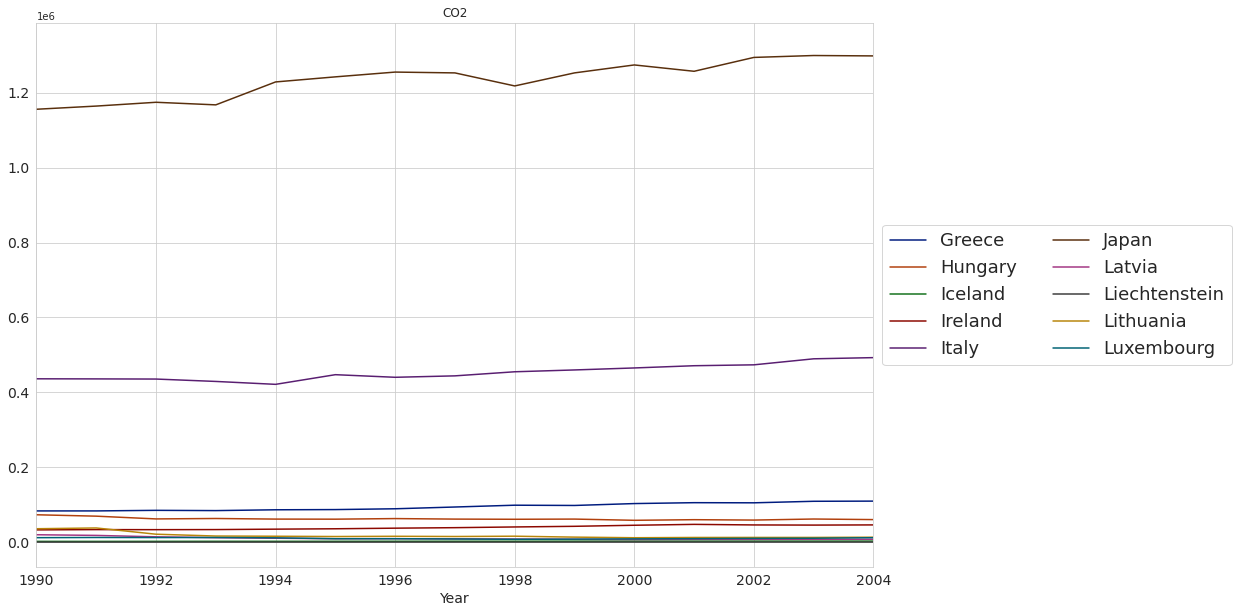

In [159]:
gas_accord_country1(gases[1],countries_name[15:25])

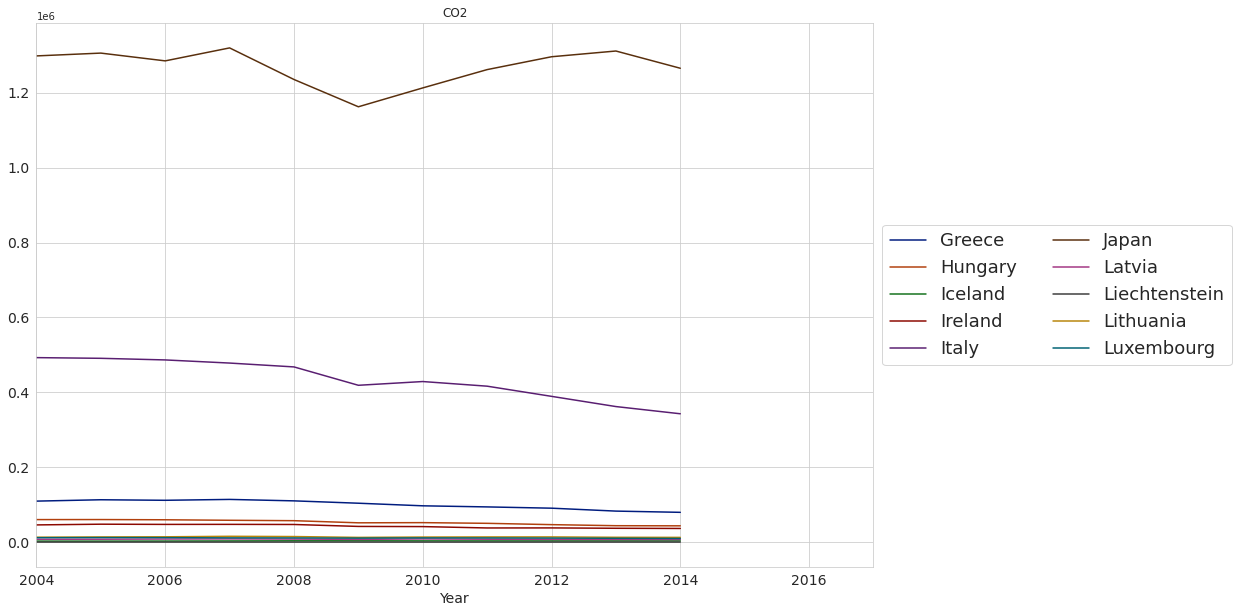

In [160]:
gas_accord_country2(gases[1],countries_name[15:25])

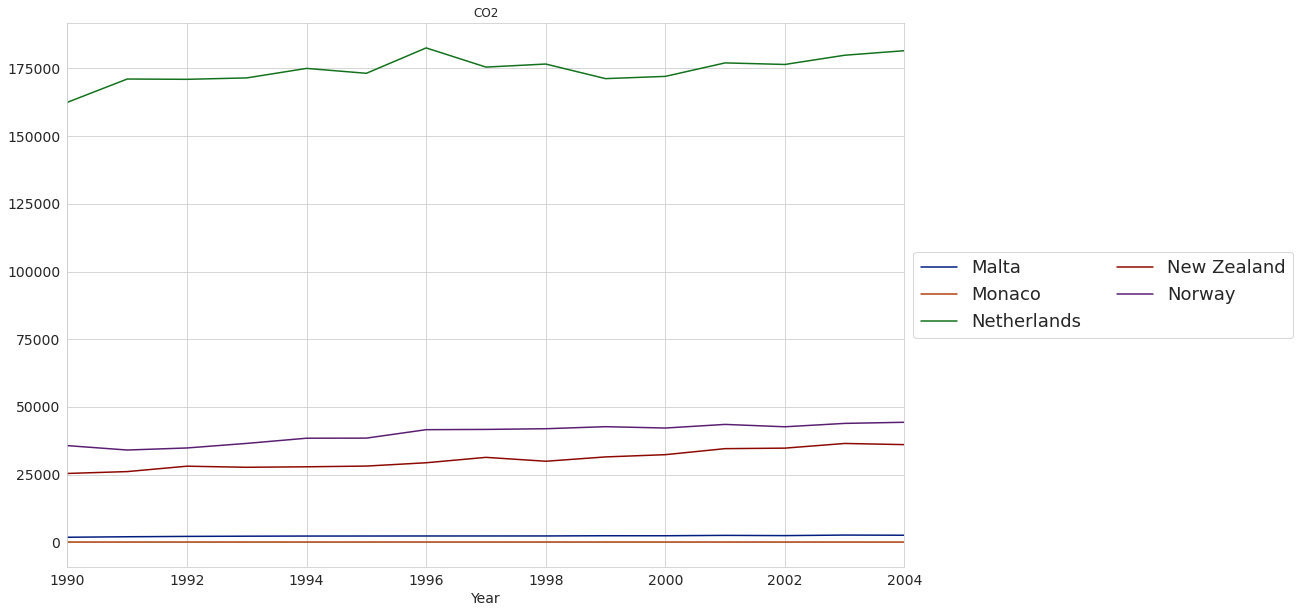

In [161]:
gas_accord_country1(gases[1],countries_name[25:30])

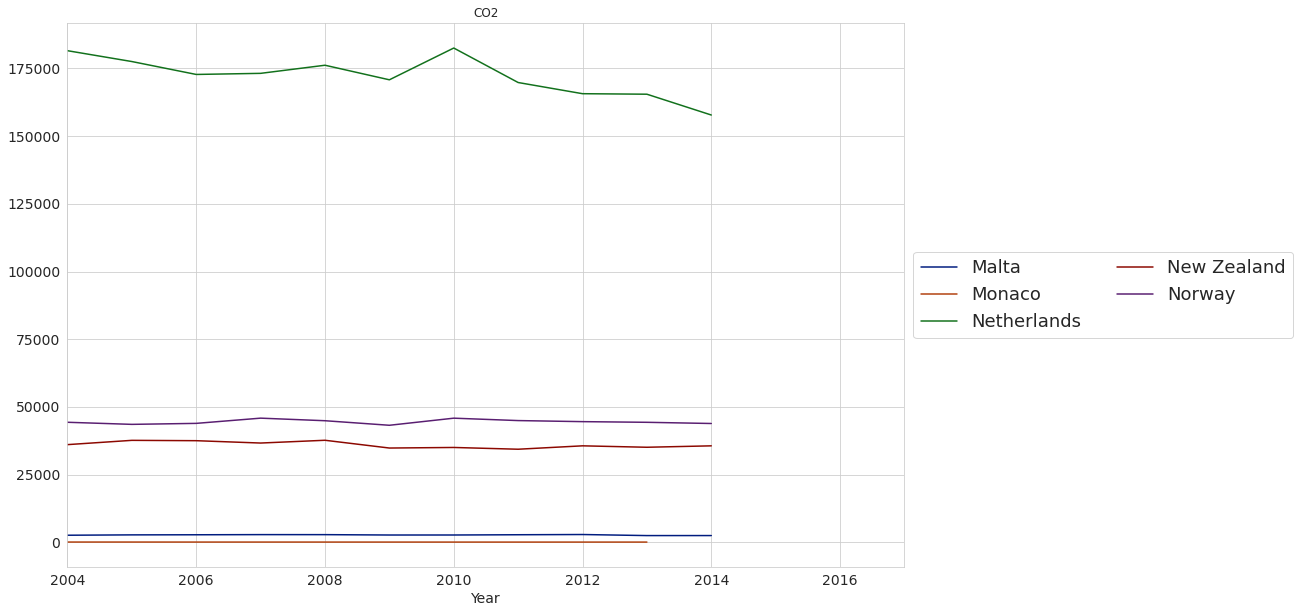

In [162]:
gas_accord_country2(gases[1],countries_name[25:30])

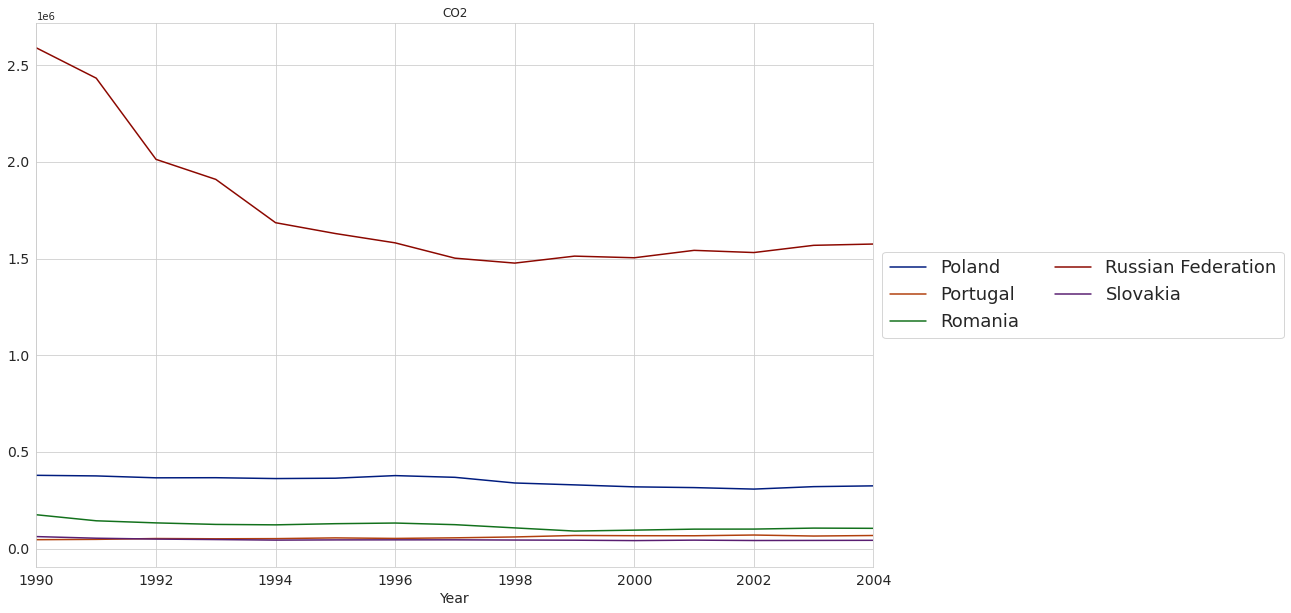

In [163]:
gas_accord_country1(gases[1],countries_name[30:35])

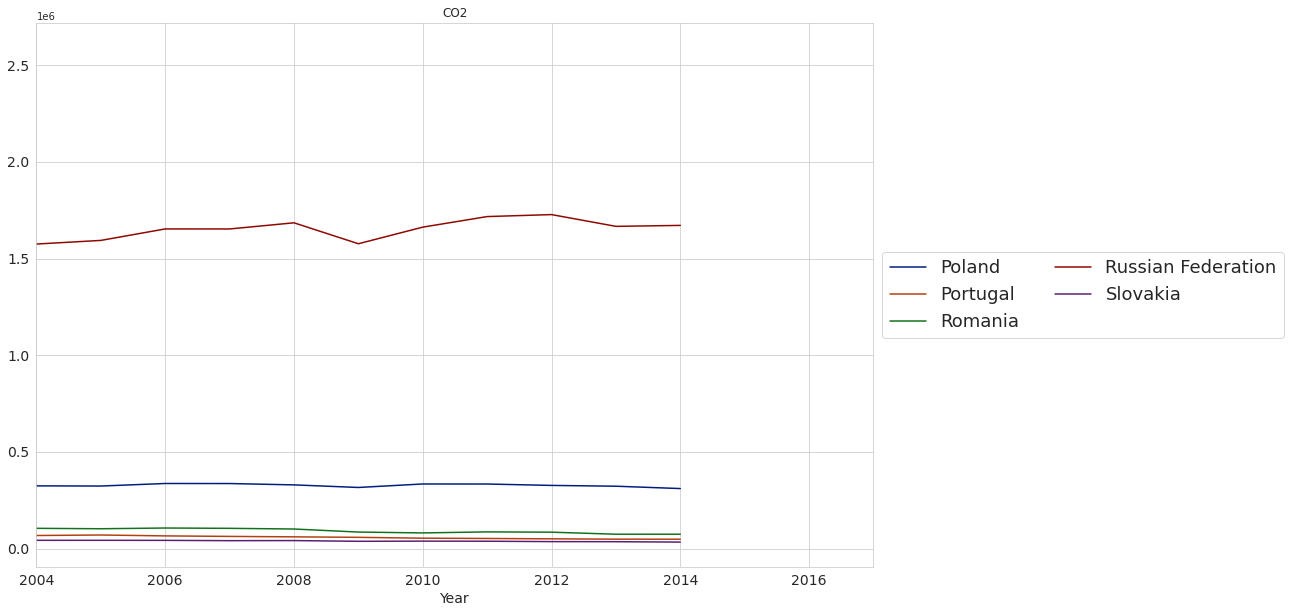

In [164]:
gas_accord_country2(gases[1],countries_name[30:35])

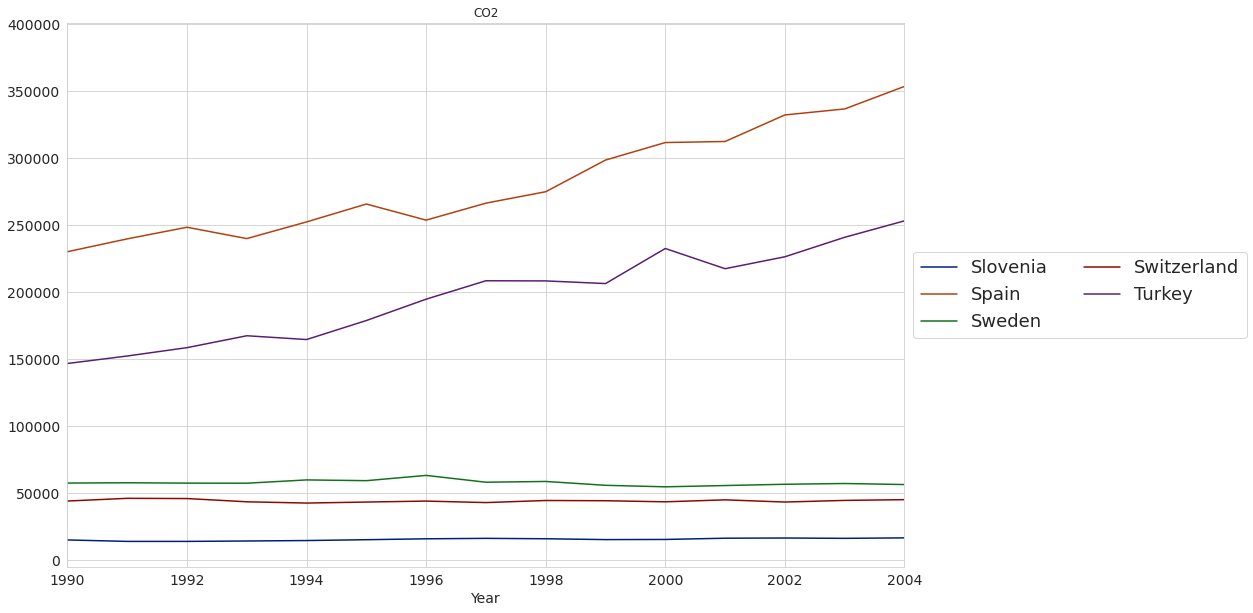

In [165]:
gas_accord_country1(gases[1],countries_name[35:40])

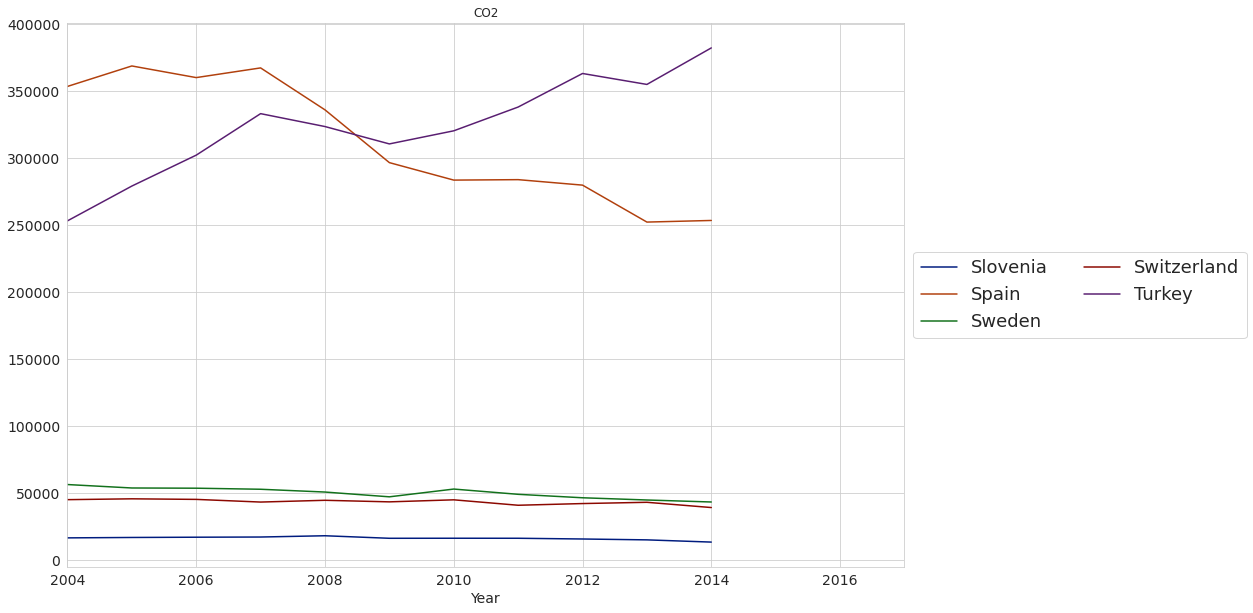

In [166]:
gas_accord_country2(gases[1],countries_name[35:40])

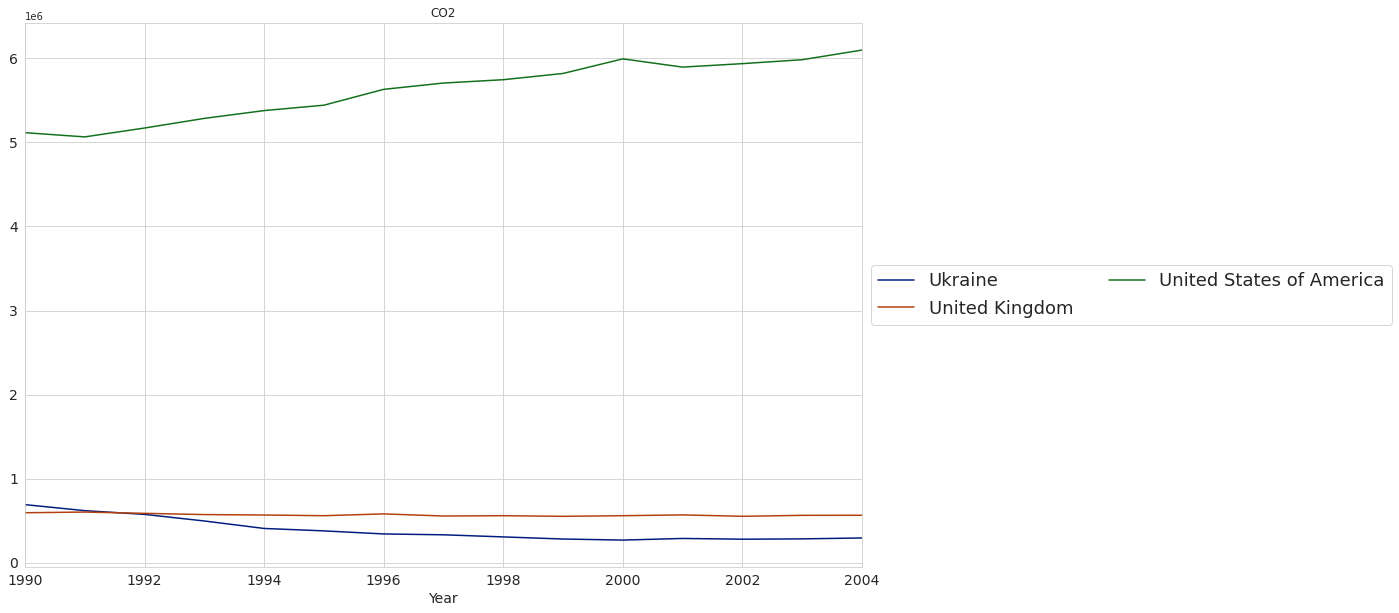

In [167]:
gas_accord_country1(gases[1],countries_name[40:43])

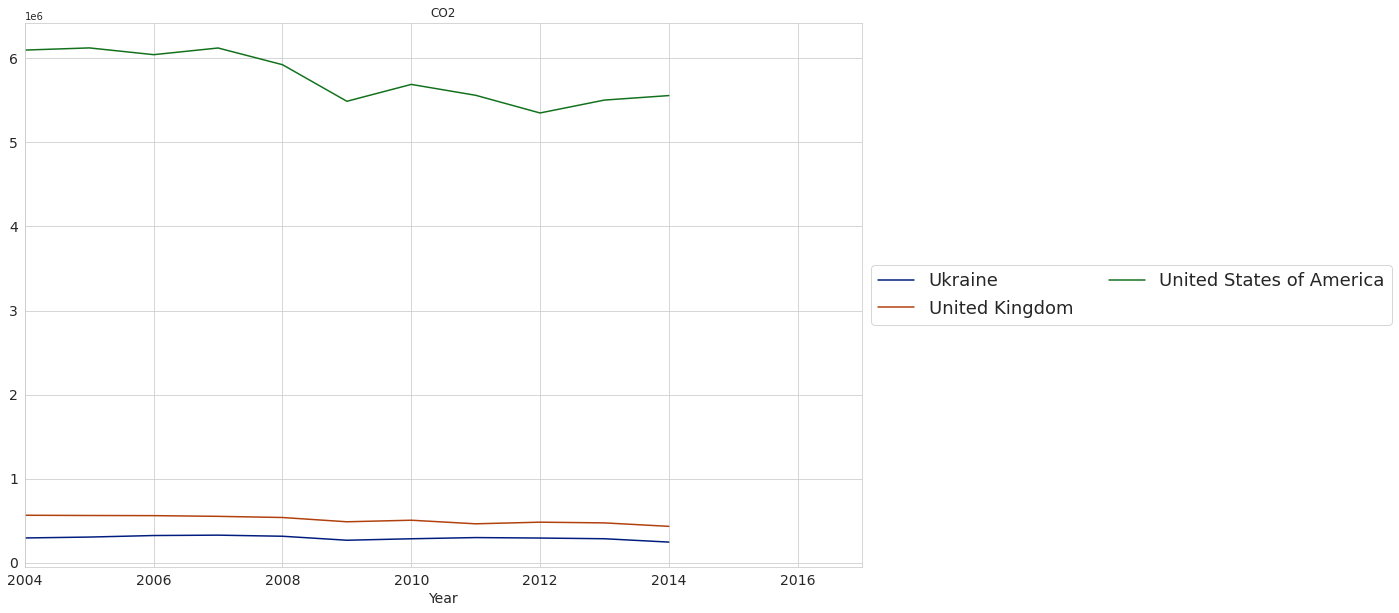

In [168]:
gas_accord_country2(gases[1],countries_name[40:43])

**GHG** will give a similar plot as of above with different range values in x and y axis, so analysis will be focused on some countries having high GHG emission.

In [169]:
new_table = pd.pivot_table(replaced_emission, values='value',index=['category'],columns=['country_or_area'])

TA

In [170]:
new_table

country_or_area        Australia       Austria       Belarus        Belgium  \
category                                                                      
CH4                107408.280693  8388.952909   15363.879347  10140.316776    
CO2                354207.950976  68923.085063  63713.336337  119529.720455   
GHG                485832.731175  82921.659316  91147.162505  141653.532424   
GHG(Indirect CO2)  485832.731175  82921.659316  91147.162505  141653.532424   
HFC                4172.371370    872.153435   NaN            1559.245372     
HFC+PFC           NaN            NaN           NaN           NaN              
N2O                18263.721882   3927.150101   12069.274585  9000.888513     
NF3               NaN             16.349000    NaN            1.155349        
PFC                1584.516087    205.641011   NaN            948.530047      
SF6                195.890167     590.943637    0.840296      599.247393      

country_or_area        Bulgaria         Canada       Croatia       Cyprus  \
category                                                                    
CH4                10304.083013  111286.003844  3097.073334   859.548286    
CO2                52228.407683  541032.488116  20278.523229  6918.024795   
GHG                67460.793150  703789.898839  26058.402908  8241.693167   
GHG(Indirect CO2) NaN            712626.186790  26058.402908  8241.693167   
HFC                393.819621    4540.818261    349.242082    102.230279    
HFC+PFC           NaN           NaN            NaN           NaN            
N2O                4541.818844   41062.312816   2308.944684   361.794680    
NF3               NaN            0.223877      NaN           NaN            
PFC                0.044862      4425.149892    261.431137   NaN            
SF6                8.404212      1806.167494    10.810032     0.095125      

country_or_area    Czech Republic       Denmark  ...  Russian Federation  \
category                                         ...                       
CH4                15899.102213    8173.241745   ...  7.581077e+05         
CO2                125260.360275   55315.328579  ...  1.706497e+06         
GHG                149672.866557   70455.358694  ...  2.601085e+06         
GHG(Indirect CO2)  150963.219142   71302.794341  ...  2.601085e+06         
HFC                1026.251719     672.363154    ...  2.003882e+04         
HFC+PFC           NaN             NaN            ... NaN                   
N2O                7582.267376     6273.368366   ...  1.068506e+05         
NF3                2.657973       NaN            ... NaN                   
PFC                14.075682       15.457208     ...  8.439227e+03         
SF6                98.555816       61.861848     ...  1.151661e+03         

country_or_area        Slovakia      Slovenia          Spain        Sweden  \
category                                                                     
CH4                5442.621806   2333.325221   34075.294404   6852.145103    
CO2                42893.407465  15809.140923  291919.787959  54467.916155   
GHG                51808.427426  19243.027545  353637.943865  67715.846456   
GHG(Indirect CO2)  51808.427426  19243.027545 NaN             67715.846456   
HFC                249.369036    155.281250    10023.669142   585.297205     
HFC+PFC           NaN           NaN           NaN            NaN             
N2O                3175.345209   861.054349    16923.467556   5437.997001    
NF3               NaN           NaN           NaN            NaN             
PFC                74.200206     100.427114    526.086471     272.487574     
SF6                13.382749     14.854937     169.638333     100.003418     

country_or_area     Switzerland         Turkey        Ukraine  United Kingdom  \
category                                                                        
CH4                5478.377293   46966.144885   118422.496008  102481.972482    
CO2                43869.359431  

In [171]:
clean_new_table = new_table.fillna(0)

In [172]:
clean_new_table['Australia'].index

Index(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'],
      dtype='object', name='category')

In [173]:
clean_new_table = clean_new_table.reset_index()

In [174]:
clean_new_table['Australia']

0    107408.280693
1    354207.950976
2    485832.731175
3    485832.731175
4    4172.371370  
5    0.000000     
6    18263.721882 
7    0.000000     
8    1584.516087  
9    195.890167   
Name: Australia, dtype: float64

In [175]:
clean_new_table = clean_new_table.drop(clean_new_table.index[[2,3]])

### Checking Gas Emissions in a country

Let's define a function, that can check for the plot WRT the country name passed.

In [176]:
def check_country(name):
    clean_new_table.plot(x = 'category', y = name)
    plt.tick_params(labelsize=14)
    plt.xlabel("Category Of GreenHouse Gases",fontsize=14)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.legend(fontsize = 20)

In [177]:
def tabulation_new(name):
    point = clean_new_table[name].sum()
    data_storage = clean_new_table[['category',name]]
    data_storage['Percent'] = (data_storage[name]/point * 100)
    print(data_storage)

#### Checking the plot with the country names

In [178]:
clean_new_table.columns

Index(['category', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'],
      dtype='object', name='country_or_area')

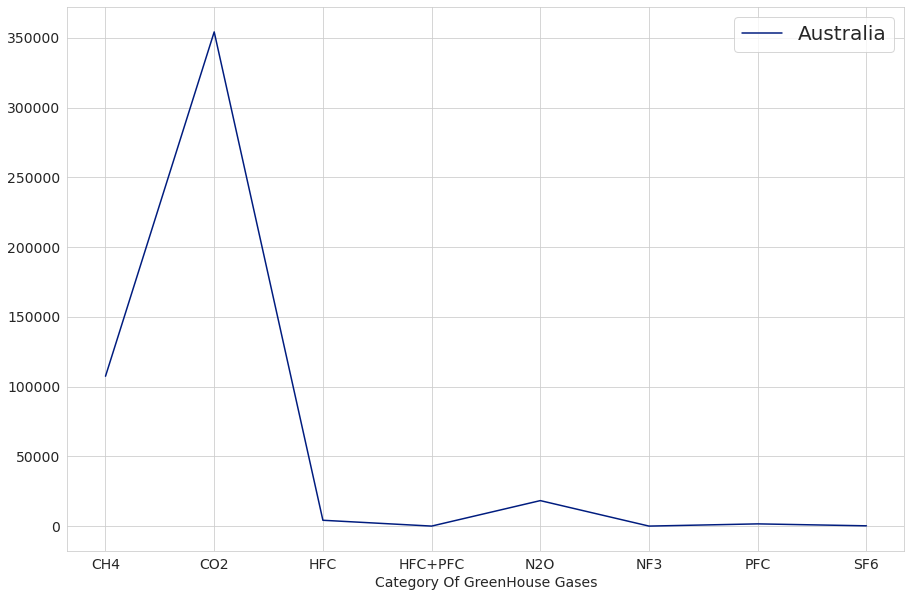

In [179]:
check_country('Australia')

In [180]:
tabulation_new('Australia')

country_or_area category      Australia    Percent
0                CH4      107408.280693  22.108078
1                CO2      354207.950976  72.907387
4                HFC      4172.371370    0.858808 
5                HFC+PFC  0.000000       0.000000 
6                N2O      18263.721882   3.759261 
7                NF3      0.000000       0.000000 
8                PFC      1584.516087    0.326144 
9                SF6      195.890167     0.040320 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


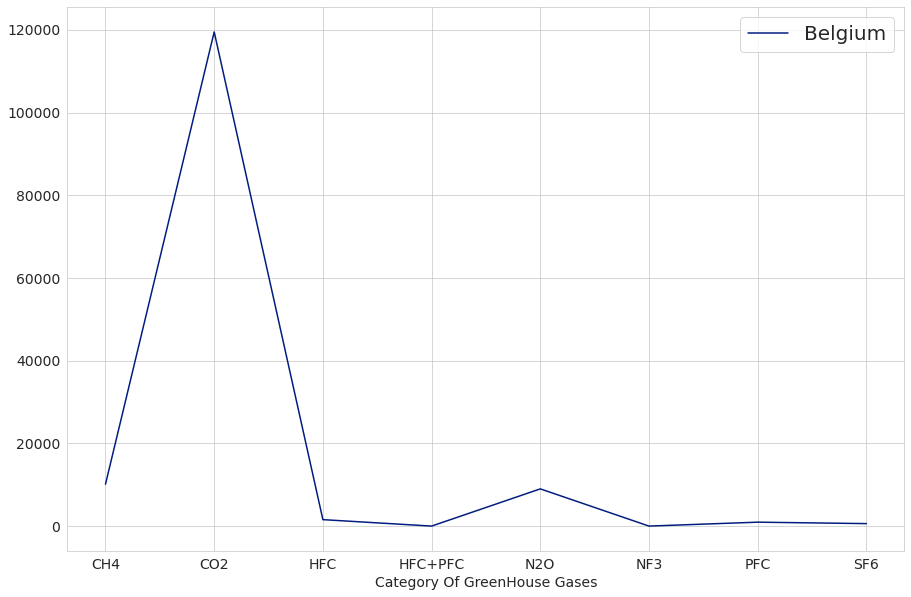

In [181]:
check_country('Belgium')

In [182]:
tabulation_new('Belgium')

country_or_area category        Belgium    Percent
0                CH4      10140.316776   7.152194 
1                CO2      119529.720455  84.307008
4                HFC      1559.245372    1.099771 
5                HFC+PFC  0.000000       0.000000 
6                N2O      9000.888513    6.348530 
7                NF3      1.155349       0.000815 
8                PFC      948.530047     0.669020 
9                SF6      599.247393     0.422663 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


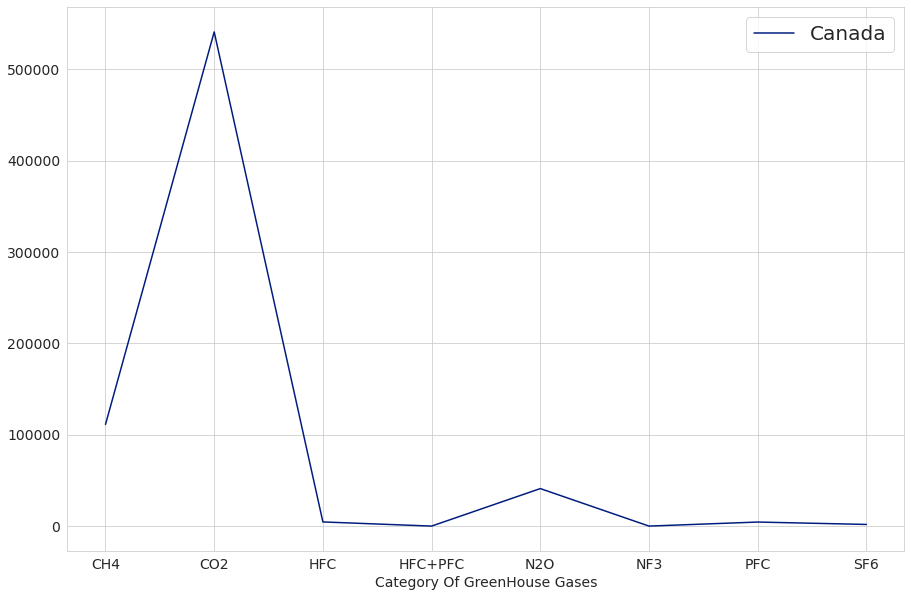

In [183]:
check_country('Canada')

In [184]:
tabulation_new('Canada')

country_or_area category         Canada    Percent
0                CH4      111286.003844  15.804233
1                CO2      541032.488116  76.834489
4                HFC      4540.818261    0.644862 
5                HFC+PFC  0.000000       0.000000 
6                N2O      41062.312816   5.831446 
7                NF3      0.223877       0.000032 
8                PFC      4425.149892    0.628436 
9                SF6      1806.167494    0.256502 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


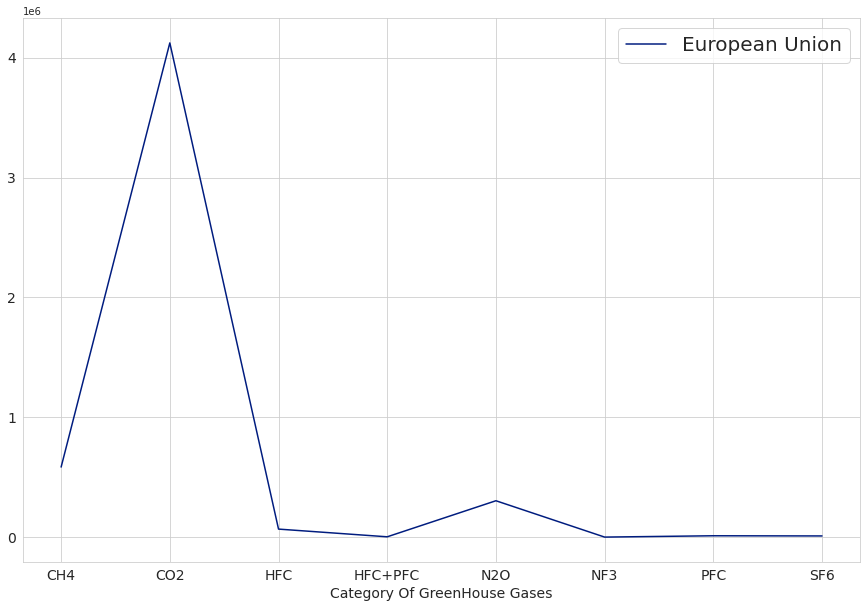

In [185]:
check_country('European Union')

In [186]:
tabulation_new('European Union')

country_or_area category  European Union    Percent
0                CH4      5.844712e+05    11.453585
1                CO2      4.124879e+06    80.833160
4                HFC      6.678874e+04    1.308825 
5                HFC+PFC  2.483566e+03    0.048669 
6                N2O      3.034402e+05    5.946364 
7                NF3      9.252222e+01    0.001813 
8                PFC      1.115614e+04    0.218621 
9                SF6      9.642704e+03    0.188963 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


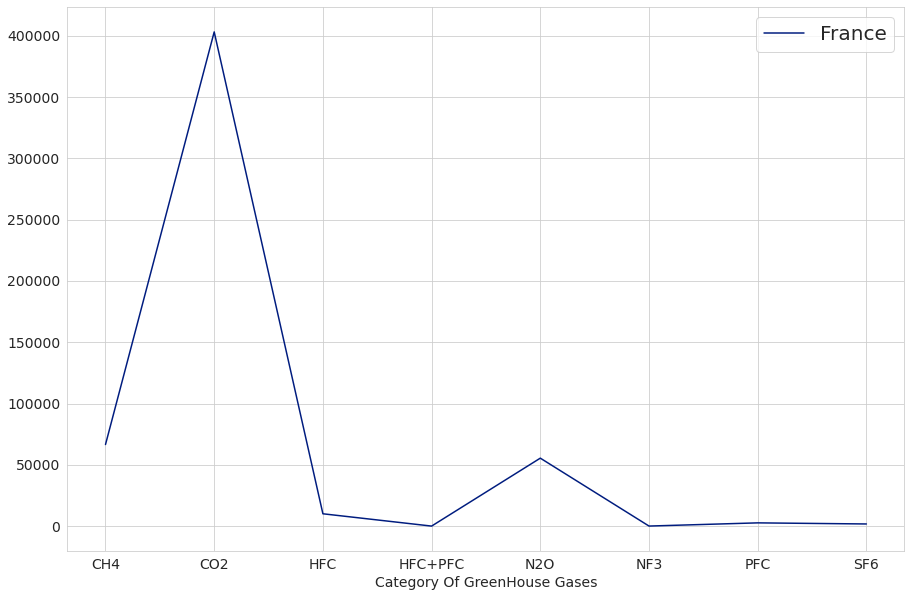

In [187]:
check_country('France')

In [188]:
tabulation_new('France')

country_or_area category         France    Percent
0                CH4      66552.727219   12.332429
1                CO2      403231.417037  74.720043
4                HFC      10042.159515   1.860844 
5                HFC+PFC  0.000000       0.000000 
6                N2O      55435.520670   10.272375
7                NF3      31.847033      0.005901 
8                PFC      2631.794133    0.487680 
9                SF6      1730.827905    0.320728 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


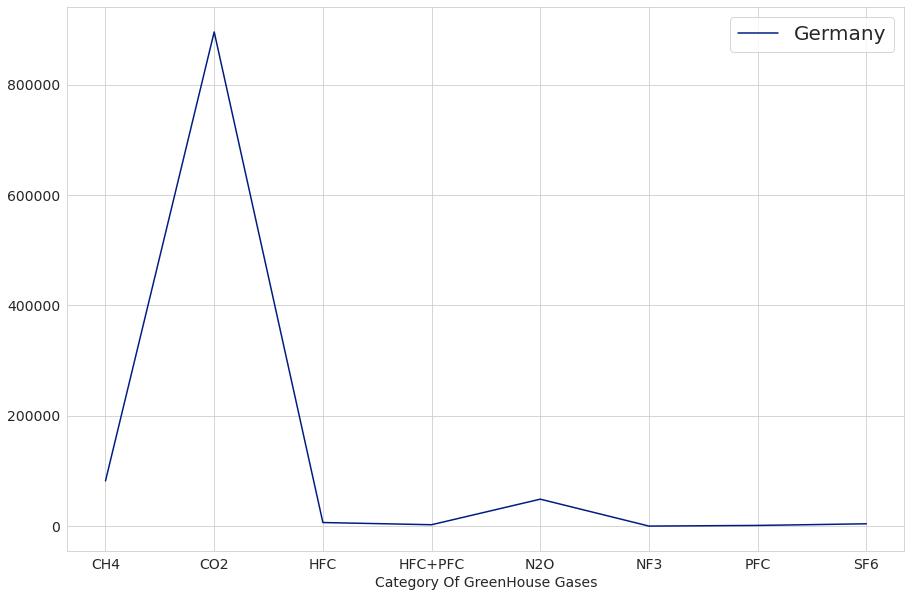

In [189]:
check_country('Germany')

In [190]:
tabulation_new('Germany')

country_or_area category        Germany    Percent
0                CH4      82020.279697   7.877293 
1                CO2      895993.439597  86.051920
4                HFC      6481.188093    0.622458 
5                HFC+PFC  2483.566466    0.238524 
6                N2O      48833.158578   4.689975 
7                NF3      18.694578      0.001795 
8                PFC      1221.264937    0.117291 
9                SF6      4172.634205    0.400743 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


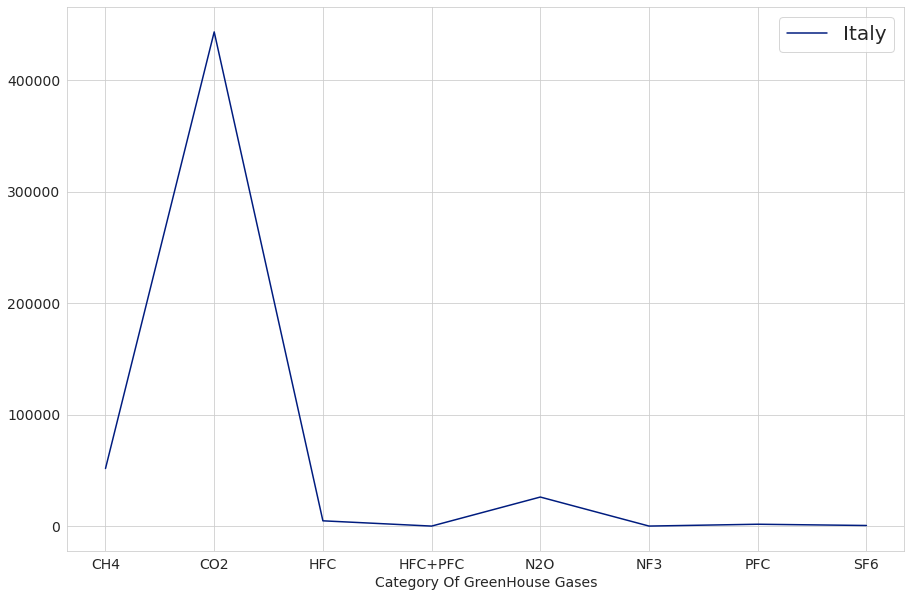

In [191]:
check_country('Italy')

In [192]:
tabulation_new('Canada')

country_or_area category         Canada    Percent
0                CH4      111286.003844  15.804233
1                CO2      541032.488116  76.834489
4                HFC      4540.818261    0.644862 
5                HFC+PFC  0.000000       0.000000 
6                N2O      41062.312816   5.831446 
7                NF3      0.223877       0.000032 
8                PFC      4425.149892    0.628436 
9                SF6      1806.167494    0.256502 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


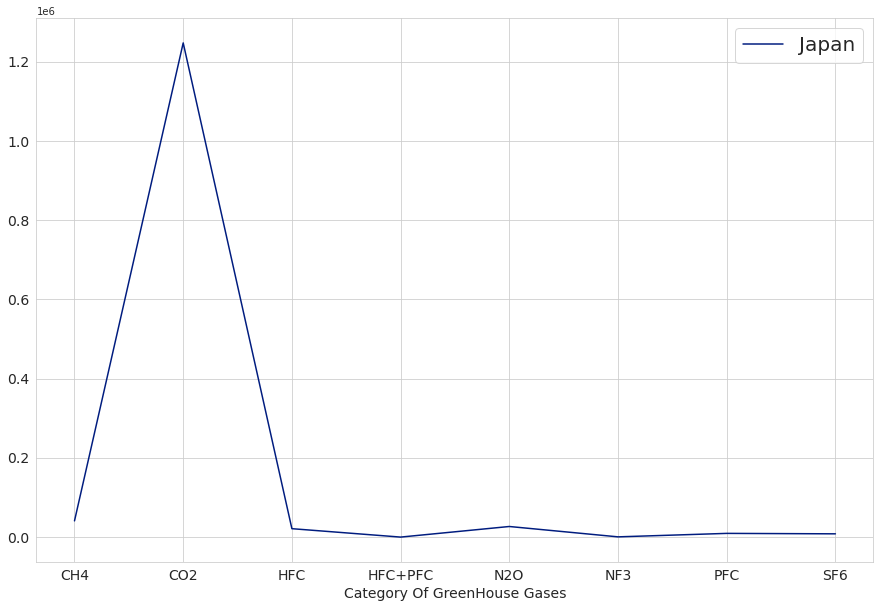

In [193]:
check_country('Japan')

In [194]:
tabulation_new('Japan')

country_or_area category         Japan    Percent
0                CH4      4.093217e+04  3.021048 
1                CO2      1.247796e+06  92.095087
4                HFC      2.122888e+04  1.566824 
5                HFC+PFC  0.000000e+00  0.000000 
6                N2O      2.674810e+04  1.974176 
7                NF3      5.933969e+02  0.043796 
8                PFC      9.360905e+03  0.690893 
9                SF6      8.240166e+03  0.608175 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


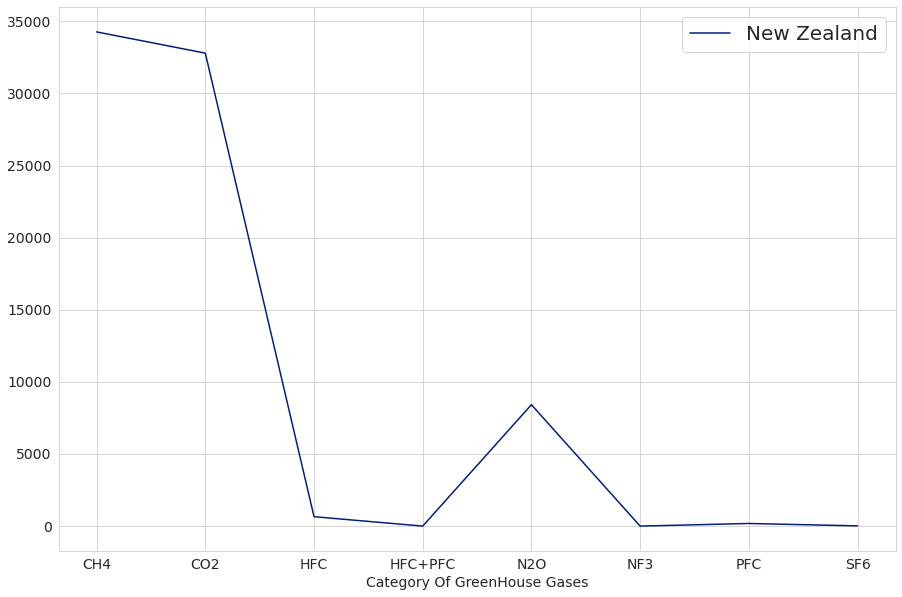

In [195]:
check_country('New Zealand')

In [196]:
tabulation_new('New Zealand')

country_or_area category   New Zealand    Percent
0                CH4      34264.844358  44.894920
1                CO2      32792.358569  42.965621
4                HFC      650.950206    0.852896 
5                HFC+PFC  0.000000      0.000000 
6                N2O      8417.690158   11.029133
7                NF3      0.000000      0.000000 
8                PFC      180.348406    0.236298 
9                SF6      16.127808     0.021131 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


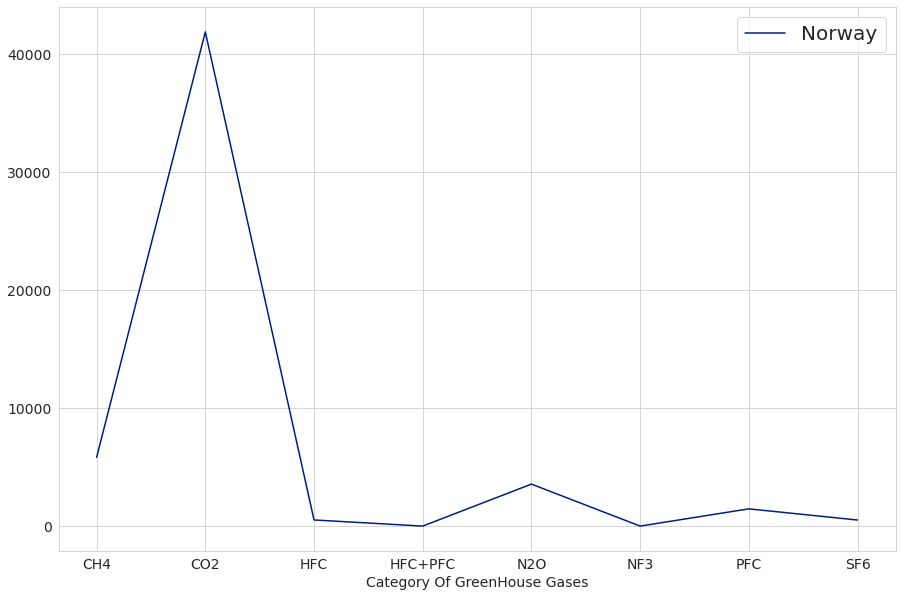

In [197]:
check_country('Norway')

In [198]:
tabulation_new('Norway')

country_or_area category        Norway    Percent
0                CH4      5832.382564   10.843910
1                CO2      41898.036209  77.899302
4                HFC      520.061296    0.966929 
5                HFC+PFC  0.000000      0.000000 
6                N2O      3558.868889   6.616859 
7                NF3      0.000000      0.000000 
8                PFC      1461.344564   2.717018 
9                SF6      514.173794    0.955982 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [199]:
clean_new_table.columns

Index(['category', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'],
      dtype='object', name='country_or_area')

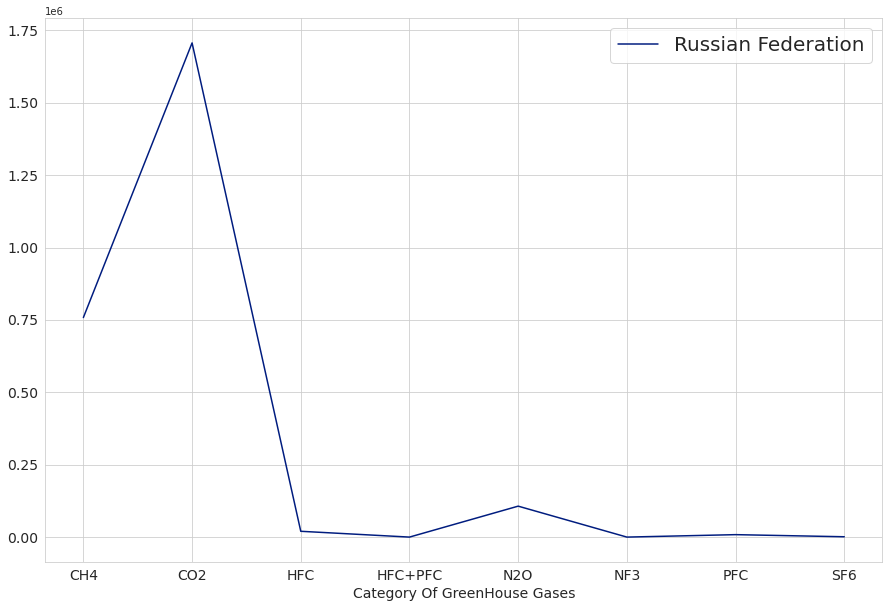

In [200]:
check_country('Russian Federation')

In [201]:
tabulation_new('Russian Federation')

country_or_area category  Russian Federation    Percent
0                CH4      7.581077e+05        29.145825
1                CO2      1.706497e+06        65.607123
4                HFC      2.003882e+04        0.770402 
5                HFC+PFC  0.000000e+00        0.000000 
6                N2O      1.068506e+05        4.107923 
7                NF3      0.000000e+00        0.000000 
8                PFC      8.439227e+03        0.324450 
9                SF6      1.151661e+03        0.044276 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Top 10 countries responsible for GHG Emission

In [202]:
clean_new_table

country_or_area category      Australia       Austria       Belarus  \
0                CH4      107408.280693  8388.952909   15363.879347   
1                CO2      354207.950976  68923.085063  63713.336337   
4                HFC      4172.371370    872.153435    0.000000       
5                HFC+PFC  0.000000       0.000000      0.000000       
6                N2O      18263.721882   3927.150101   12069.274585   
7                NF3      0.000000       16.349000     0.000000       
8                PFC      1584.516087    205.641011    0.000000       
9                SF6      195.890167     590.943637    0.840296       

country_or_area        Belgium      Bulgaria         Canada       Croatia  \
0                10140.316776   10304.083013  111286.003844  3097.073334    
1                119529.720455  52228.407683  541032.488116  20278.523229   
4                1559.245372    393.819621    4540.818261    349.242082     
5                0.000000       0.000000      0.000000       0.000000       
6                9000.888513    4541.818844   41062.312816   2308.944684    
7                1.155349       0.000000      0.223877       0.000000       
8                948.530047     0.044862      4425.149892    261.431137     
9                599.247393     8.404212      1806.167494    10.810032      

country_or_area       Cyprus  Czech Republic  ...  Russian Federation  \
0                859.548286   15899.102213    ...  7.581077e+05         
1                6918.024795  125260.360275   ...  1.706497e+06         
4                102.230279   1026.251719     ...  2.003882e+04         
5                0.000000     0.000000        ...  0.000000e+00         
6                361.794680   7582.267376     ...  1.068506e+05         
7                0.000000     2.657973        ...  0.000000e+00         
8                0.000000     14.075682       ...  8.439227e+03         
9                0.095125     98.555816       ...  1.151661e+03         

country_or_area      Slovakia      Slovenia          Spain        Sweden  \
0                5442.621806   2333.325221   34075.294404   6852.145103    
1                42893.407465  15809.140923  291919.787959  54467.916155   
4                249.369036    155.281250    10023.669142   585.297205     
5                0.000000      0.000000      0.000000       0.000000       
6                3175.345209   861.054349    16923.467556   5437.997001    
7                0.000000      0.000000      0.000000       0.000000       
8                74.200206     100.427114    526.086471     272.487574     
9                13.382749     14.854937     169.638333     100.003418     

country_or_area   Switzerland         Turkey        Ukraine  United Kingdom  \
0                5478.377293   46966.144885   118422.496008  102481.972482    
1                43869.359431  250573.712406  353910.065922  545820.676244    
4                768.731117    2048.359686    392.060973     15322.722910     
5                0.000000      0.000000       0.000000       0.000000         
6                2581.572186   18381.672103   32384.240979   30776.353357     
7                2.958892      0.000000       0.000000       0.670928         
8                50.494518     633.148723     129.615711     518.692865       
9                161.306274    652.022496     3.947136       1084.640532      

country_or_area  United States of America  
0                7.357808e+05              
1                5.664365e+06              
4                1.038582e+05              
5                4.826465e+03              
6                4.089620e+05              
7                3.461012e+02              
8                1.208270e+04              
9                1.791006e+04              

[8 rows x 44 columns]

In [203]:
new_table2 = pd.pivot_table(replaced_emission, values='value',index=['country_or_area'],columns=['category'])

In [204]:
new_table2 = new_table2.fillna(0)

In [205]:
sum_of_total_emission = new_table2.sum(axis=1)

In [206]:
new_table2['Total'] = sum_of_total_emission

In [207]:
sum_of_total_emission.sort_values(ascending=False)

country_or_area
United States of America    2.084439e+07
European Union              1.531488e+07
Russian Federation          7.803255e+06
Japan                       4.064699e+06
Germany                     3.123673e+06
Canada                      2.120569e+06
France                      1.620446e+06
Italy                       1.583353e+06
Ukraine                     1.515466e+06
Australia                   1.457498e+06
United Kingdom              1.392011e+06
Poland                      1.246978e+06
Turkey                      9.553040e+05
Spain                       7.072759e+05
Netherlands                 6.530495e+05
Romania                     4.689051e+05
Czech Republic              4.505194e+05
Belgium                     4.250862e+05
Greece                      3.576317e+05
Belarus                     2.734417e+05
Austria                     2.487676e+05
New Zealand                 2.288628e+05
Portugal                    2.243705e+05
Hungary                     2.206251e+05


**Heatmap**